## Transborder Freight Analysis Using CRISP-DM Framework


###  Importation of Packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

### Data Importation

In [3]:
# This is a function that allows to unzips and read the csv files
def process_data_from_directory(base_directory, output_file1, output_file2, output_file3):
    # Lists to store DataFrames for each prefix (dot1, dot2, dot3)
    dot1_data = []
    dot2_data = []
    dot3_data = []

    # Walk through the directory to find CSV files
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):  # Process only CSV files
                if 'ytd' in file.lower():  # Skip files containing 'ytd' in the filename
                    print(f"Skipping {file} as it contains 'ytd' in the filename.")
                    continue  # Skip this file

                file_path = os.path.join(root, file)
                try:
                    # Read CSV file into a DataFrame
                    df = pd.read_csv(file_path, low_memory=False)

                    # Categorize based on the prefix
                    if file.startswith('dot1'):
                        dot1_data.append(df)
                    elif file.startswith('dot2'):
                        dot2_data.append(df)
                    elif file.startswith('dot3'):
                        dot3_data.append(df)

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    # Step 3: Concatenate the DataFrames based on the prefix
    combined_dot1 = pd.concat(dot1_data, ignore_index=True) if dot1_data else None
    combined_dot2 = pd.concat(dot2_data, ignore_index=True) if dot2_data else None
    combined_dot3 = pd.concat(dot3_data, ignore_index=True) if dot3_data else None

    # Save the combined data to output files if any data exists
    if combined_dot1 is not None:
        combined_dot1.to_csv(output_file1, index=False)
        print(f"Combined dot1 data saved to {output_file1}")

    if combined_dot2 is not None:
        combined_dot2.to_csv(output_file2, index=False)
        print(f"Combined dot2 data saved to {output_file2}")

    if combined_dot3 is not None:
        combined_dot3.to_csv(output_file3, index=False)
        print(f"Combined dot3 data saved to {output_file3}")

    return combined_dot1, combined_dot2, combined_dot3

In [4]:
# Call the function to process files and save the combined data
base_directory = r"C:\Users\sammu\Downloads\Trans Data\data"  # Replace with your actual directory path
output_file1 = "combined_dot1.csv"
output_file2 = "combined_dot2.csv"
output_file3 = "combined_dot3.csv"

combined_dot1, combined_dot2, combined_dot3 = process_data_from_directory(
    base_directory, output_file1, output_file2, output_file3
)

# Display the first few rows of each combined dataset
if combined_dot1 is not None:
    print("Combined dot1 DataFrame:")
    print(combined_dot1.head())

if combined_dot2 is not None:
    print("Combined dot2 DataFrame:")
    print(combined_dot2.head())

if combined_dot3 is not None:
    print("Combined dot3 DataFrame:")
    print(combined_dot3.head())

Skipping dot1_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0420.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0820.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0220.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0120.csv as it contains 'ytd' in the filename.
Skipping dot1_ytd_0720.csv as it contains 'ytd' in the filename.
Skipping dot2_ytd_0720.csv as it contains 'ytd' in the filename.
Skipping dot3_ytd_0720.csv as it contains 'ytd' in the filename.
Error reading C:\Users\sa

### Expoloratory Data Analysis (EDA)

#### Data Cleaning and Validation

In [7]:
combined_dot1.head()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020

In [8]:
combined_dot1.tail()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY  VALUE  \
1649156        2       WY  4101         3      NaN      XC     1220   8869   
1649157        2       WY  4101         3      NaN      XN     1220  10853   
1649158        2       WY  4101         3      NaN      XO     1220  59348   
1649159        2       WY  4101         3      NaN      XQ     1220  12689   
1649160        2       WY  41XX         3      NaN     NaN     2010  11931   

         SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
1649156      63              290 NaN        0    9.0  2024  
1649157      29               72 NaN        0    9.0  2024  
1649158     307              858 NaN        0    9.0  2024  
1649159      53              382 NaN        0    9.0  2024  
1649160      38              136 NaN        0    9.0  2024

In [9]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649161 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1649161 non-null  int64  
 1   USASTATE         1649161 non-null  object 
 2   DEPE             1649161 non-null  object 
 3   DISAGMOT         1649161 non-null  int64  
 4   MEXSTATE         481275 non-null   object 
 5   CANPROV          1044410 non-null  object 
 6   COUNTRY          1649161 non-null  int64  
 7   VALUE            1649161 non-null  int64  
 8   SHIPWT           1649161 non-null  int64  
 9   FREIGHT_CHARGES  1649161 non-null  int64  
 10  DF               1029645 non-null  float64
 11  CONTCODE         1649161 non-null  object 
 12  MONTH            1528035 non-null  float64
 13  YEAR             1649161 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 176.1+ MB


In [10]:
combined_dot1.describe()

TRDTYPE      DISAGMOT       COUNTRY         VALUE        SHIPWT  \
count  1.649161e+06  1.649161e+06  1.649161e+06  1.649161e+06  1.649161e+06   
mean   1.375655e+00  4.839831e+00  1.509695e+03  5.731768e+06  2.334948e+06   
std    4.842918e-01  1.432696e+00  3.807045e+02  1.106477e+08  1.117767e+08   
min    1.000000e+00  1.000000e+00  1.220000e+03  0.000000e+00  0.000000e+00   
25%    1.000000e+00  5.000000e+00  1.220000e+03  2.006500e+04  0.000000e+00   
50%    1.000000e+00  5.000000e+00  1.220000e+03  1.058920e+05  3.000000e+00   
75%    2.000000e+00  5.000000e+00  2.010000e+03  7.001060e+05  9.801000e+03   
max    2.000000e+00  9.000000e+00  2.010000e+03  4.801019e+10  8.395042e+10   

       FREIGHT_CHARGES            DF         MONTH          YEAR  
count     1.649161e+06  1.029645e+06  1.528035e+06  1.649161e+06  
mean      7.521747e+04  1.329927e+00  6.038520e+00  2.021991e+03  
std       2.734839e+06  4.701867e-01  3.230619e+00  1.286290e+00  
min       0.000000e+00  1.000000e+00  1.000000e+00  2.020000e+03  
25%       0.000000e+00  1.000000e+00  3.000000e+00  2.021000e+03  
50%       3.950000e+02  1.000000e+00  6.000000e+00  2.022000e+03  
75%       3.953000e+03  2.000000e+00  9.000000e+00  2.023000e+03  
max       2.009334e+09  2.000000e+00  1.200000e+01  2.024000e+03

In [11]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1167886
CANPROV             604751
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  619516
CONTCODE                 0
MONTH               121126
YEAR                     0
dtype: int64

### Handling Missing Values 

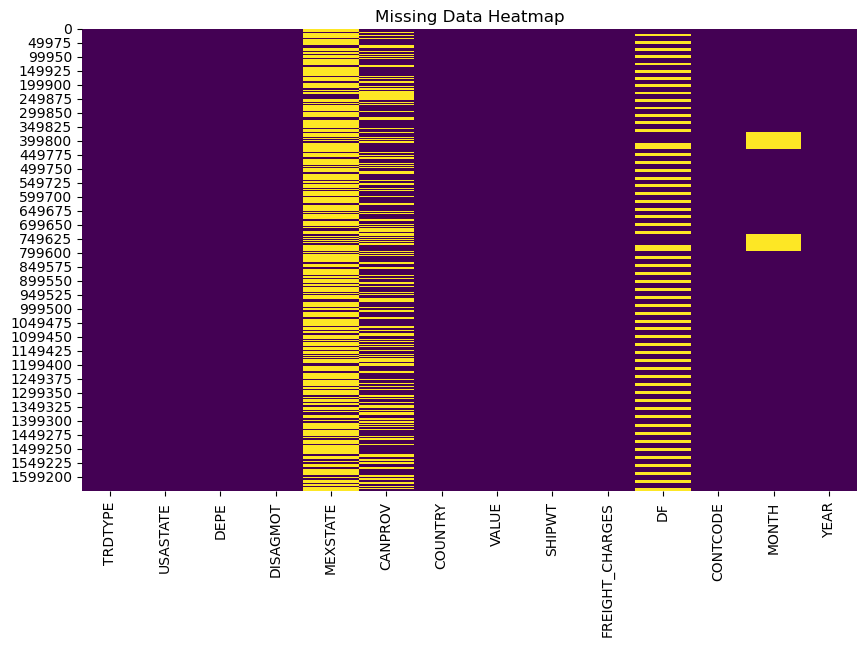

In [13]:
#Heatmap of missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [14]:
combined_dot1.shape

(1649161, 14)

In [15]:
#Checking for Number of Dulpicates 

combined_dot1.duplicated().sum()

27550

In [16]:
#Dropping Duplicates Values
combined_dot1 = combined_dot1.drop_duplicates()

In [17]:
combined_dot1.shape

(1621611, 14)

In [18]:
#percentage of missing values per 'MEXSTATE' column
combined_dot1['MEXSTATE'].isnull().sum()/len(combined_dot1)*100

70.81729218659716

In [19]:
#percentage of missing values per 'CANPROV' column
combined_dot1['CANPROV'].isnull().sum()/len(combined_dot1)*100

36.667980175270145

In [20]:
# Rows where both MEXSTATE and CANPROV are missing
both_missing = combined_dot1[pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])]

# Count the number of such rows
missing_count = both_missing.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
1035           1       CA  2304         5      NaN     NaN     2010  101722   
1252           1       CA  2506         5      NaN     NaN     2010   26649   
1298           1       CA  2507         5      NaN     NaN     2010    7000   
1344           1       CA  2604         5      NaN     NaN     2010   39312   
2592           1       FL  2304         5      NaN     NaN     2010  131553   
...          ...      ...   ...       ...      ...     ...      ...     ...   
1649097        2       WY  2507         5      NaN     NaN     2010   71848   
1649109        2       WY  30XX         5      NaN     NaN     2010    7004   
1649117        2       WY  3307         3      NaN     NaN     2010    2050   
1649129        2       WY  33XX         5      NaN     NaN     2010   23409   
1649160        2       WY  41XX         3      NaN     NaN     2010   11931   

 

In [21]:
# Define a function to alternate between filling MEXSTATE and CANPROV
def fill_missing_states(group):
    # Apply this only where both MEXSTATE and CANPROV are NaN
    mask = group['MEXSTATE'].isnull() & group['CANPROV'].isnull()

    # Alternate the filling based on COUNTRY and DEPE
    for idx in group[mask].index:
        country = group.loc[idx, 'COUNTRY']
        if country == 'Mexico':
            # Fill MEXSTATE for Mexico
            group.loc[idx, 'MEXSTATE'] = group['MEXSTATE'].mode()[0] if group['MEXSTATE'].notnull().any() else 'Unknown'  # Default or previous mode
        elif country == 'Canada':
            # Fill CANPROV for Canada
            group.loc[idx, 'CANPROV'] = group['CANPROV'].mode()[0] if group['CANPROV'].notnull().any() else 'Unknown'  # Default or previous mode
   
    return group

# Apply the function by grouping by COUNTRY and DEPE
combined_dot1 = combined_dot1.groupby(['COUNTRY', 'DEPE'], group_keys=False).apply(fill_missing_states)

# Check the results
combined_dot1.head()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020

In [22]:
#percentage of missing values per 'DF' column
combined_dot1['DF'].isnull().sum()/len(combined_dot1)*100

37.559624348872816

In [23]:
# this was done using the mode of 'DF' grouped by 'USASTATE'

# checking the missing values in the 'DF' column
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
combined_dot1['DF'] = combined_dot1.groupby(['USASTATE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))

# If you still have missing values, you can fallback to imputing the mode of the entire column:
#imputer = SimpleImputer(strategy='most_frequent')
#combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']])

print(combined_dot1.head())

# checking the missing values in the 'DF' column after handling missing values
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


Missing values: 609071
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020  
Missing values: 0


In [24]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1148381
CANPROV             594612
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH               121126
YEAR                     0
dtype: int64

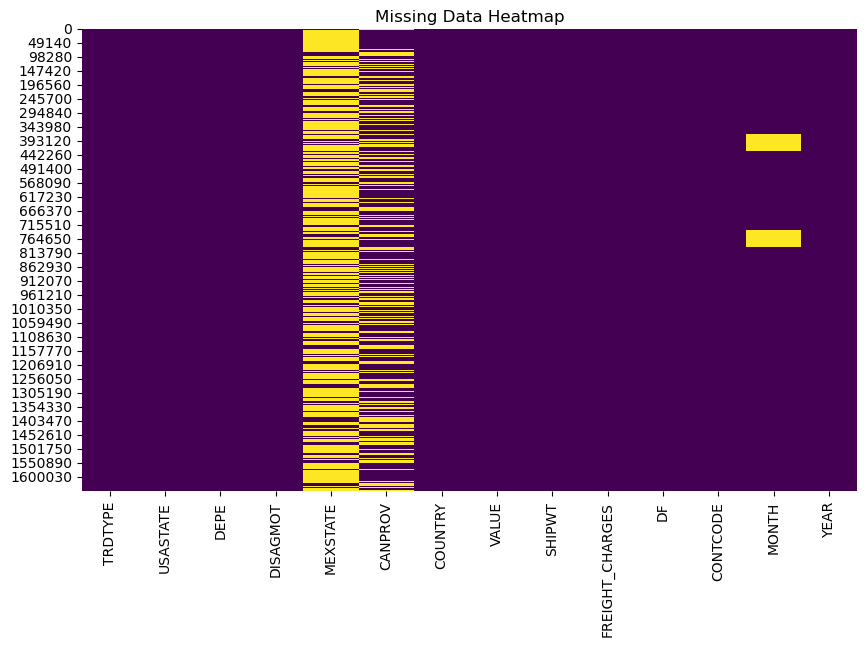

In [25]:
#Heatmap of missing data after handling missing values in 'DF'
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [26]:
#percentage of missing values per 'MONTH' column
combined_dot1['MONTH'].isnull().sum()/len(combined_dot1)*100

7.469485591797293

In [27]:
#dropping missing 
combined_dot1 = combined_dot1.dropna(subset=['MONTH'])

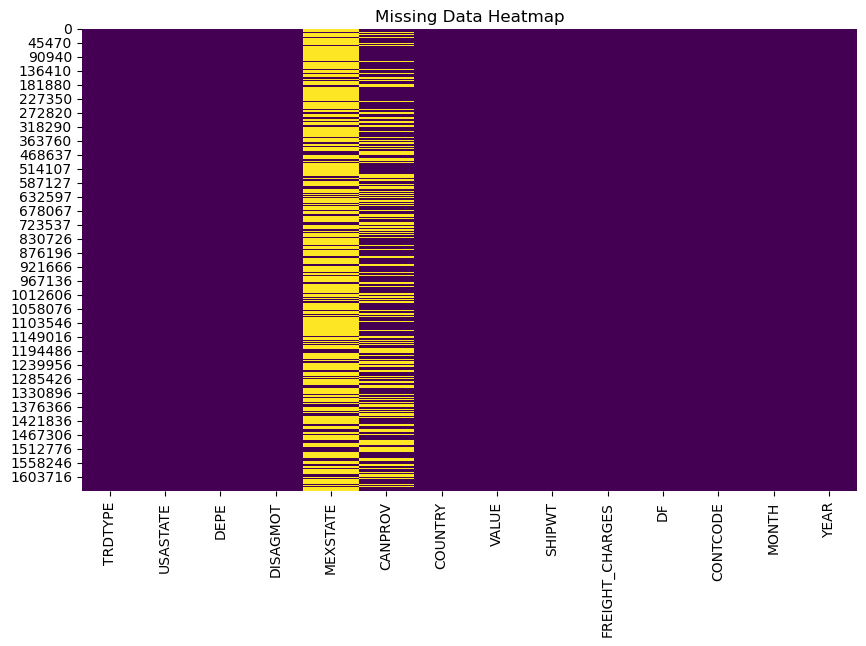

In [28]:
#Heatmap after handling missing values in month column

plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [29]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [30]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
1    935285
2    565200
Name: count, dtype: int64

In [31]:
combined_dot1.loc[:,'TRDTYPE'] = combined_dot1['TRDTYPE'].replace({1: "Export", 2: "Import"})

In [32]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    935285
Import    565200
Name: count, dtype: int64

In [33]:
combined_dot1['DEPE'].value_counts()

DEPE
2304    165205
3802     61961
20XX     61791
0901     53226
3401     51402
         ...  
3433         7
3881         4
0182         2
0152         2
3385         1
Name: count, Length: 246, dtype: int64

In [34]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
5    833631
3    293687
6    221302
8     94424
1     46135
7      6039
9      4373
4       894
Name: count, dtype: int64

In [35]:
combined_dot1.loc[:, 'DISAGMOT'] = combined_dot1['DISAGMOT'].replace({
    1: "Vessel",
    3: "Air",
    4: "Mail",
    5: "Truck",
    6: "Rail",
    7: "Pipeline",
    8: "Other",
    9: "Foreign Trade Zones"
})

In [36]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  833631
Air                    293687
Rail                   221302
Other                   94424
Vessel                  46135
Pipeline                 6039
Foreign Trade Zones      4373
Mail                      894
Name: count, dtype: int64

In [37]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    51000
MX    38557
NL    31359
CH    29003
DF    24838
JA    24405
BC    22568
SO    20256
TM    20216
CO    20006
QT    18177
OT    16827
GT    16174
SI    11069
SL    10674
PU     9207
AG     8700
DG     8676
CM     7253
VE     7066
HG     6930
MI     5529
MO     5356
TL     4258
ZA     3880
QR     3442
BS     3432
YU     2796
TB     2051
CL     1635
OA     1553
CS     1367
GR     1017
Name: count, dtype: int64

In [38]:
combined_dot1['CANPROV'].value_counts()

CANPROV
XO    255316
XQ    169771
XC    151019
XA    135632
XM     89455
XS     53196
XB     47868
XN     25180
XP     10845
XW      8095
XY       944
OT       273
XT       247
XV        55
Name: count, dtype: int64

In [39]:
combined_dot1.loc[:,'CANPROV'] = combined_dot1['CANPROV'].replace({
    'XA': "Alberta",
    'XC': "British Columbia",
    'XM': "Manitoba",
    'XB': "New Brunswick",
    'XW': "Newfoundland",
    'XT': "Northwest Territories",
    'XN': "Nova Scotia",
    'XO': "Ontario",
    'XP': "Prince Edward Island",
    'XQ': "Quebec",
    'XS': "Saskatchewan",
    'XV': "Nunavut",
    'XY': "Yukon Territory",
    'OT': "Province Unknown"
})

In [40]:
combined_dot1['CANPROV'].value_counts()

CANPROV
Ontario                  255316
Quebec                   169771
British Columbia         151019
Alberta                  135632
Manitoba                  89455
Saskatchewan              53196
New Brunswick             47868
Nova Scotia               25180
Prince Edward Island      10845
Newfoundland               8095
Yukon Territory             944
Province Unknown            273
Northwest Territories       247
Nunavut                      55
Name: count, dtype: int64

In [41]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
1220    947896
2010    552589
Name: count, dtype: int64

In [42]:
combined_dot1.loc[:, 'COUNTRY'] = combined_dot1['COUNTRY'].replace({1220: "Canada", 2010: "Mexico"})

In [43]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    947896
Mexico    552589
Name: count, dtype: int64

In [44]:
combined_dot1['VALUE'].value_counts()

VALUE
3000       909
5000       907
3365       752
10000      729
4000       689
          ... 
1043809      1
177120       1
431005       1
1023363      1
1430383      1
Name: count, Length: 708935, dtype: int64

In [45]:
combined_dot1['SHIPWT'].value_counts()

SHIPWT
0            733632
1              7918
2              5780
3              4277
5              4222
              ...  
227749899         1
169642            1
484440            1
38111             1
353732            1
Name: count, Length: 275083, dtype: int64

In [46]:
combined_dot1['FREIGHT_CHARGES'].value_counts()

FREIGHT_CHARGES
0          459354
200         14763
500         11179
100          9862
150          9578
            ...  
414735          1
2868182         1
239066          1
57223           1
108873          1
Name: count, Length: 137761, dtype: int64

In [47]:
combined_dot1['DF'].value_counts()

DF
1.0    1192769
2.0     307716
Name: count, dtype: int64

In [48]:
combined_dot1.loc[:, 'DF'] = combined_dot1['DF'].replace({1.0: "Domestic", 2.0: "Foreign"})

In [49]:
combined_dot1['DF'].value_counts()

DF
Domestic    1192769
Foreign      307716
Name: count, dtype: int64

In [50]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
0    820568
X    545368
1    134549
Name: count, dtype: int64

In [51]:
combined_dot1.loc[:, 'CONTCODE'] = combined_dot1['CONTCODE'].replace({'0': "Non-Containerized", 'X': "Containerized", '1': "Others"})

In [52]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    820568
Containerized        545368
Others               134549
Name: count, dtype: int64

In [53]:
combined_dot1['MONTH'].value_counts()

MONTH
3.0     142647
8.0     139989
6.0     139585
7.0     139071
9.0     139010
5.0     138785
4.0     137937
2.0     136713
1.0     134648
10.0     85210
11.0     84257
12.0     82633
Name: count, dtype: int64

In [54]:
combined_dot1.loc[:, 'MONTH'] = combined_dot1['MONTH'].replace({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
})


In [55]:
combined_dot1['MONTH'].value_counts()

MONTH
March        142647
August       139989
June         139585
July         139071
September    139010
May          138785
April        137937
February     136713
January      134648
October       85210
November      84257
December      82633
Name: count, dtype: int64

In [56]:
combined_dot1['YEAR'].value_counts()

YEAR
2023    341668
2022    338101
2021    327584
2024    261103
2020    232029
Name: count, dtype: int64

In [57]:
combined_dot1.loc[:, 'YEAR'] = combined_dot1['YEAR'].fillna(0).astype(int)

In [58]:
combined_dot1 = combined_dot1.dropna(subset=['YEAR'])
combined_dot1.loc[:, 'YEAR'] = combined_dot1['YEAR'].astype(int)

In [59]:
combined_dot1['YEAR'].value_counts()

YEAR
2023    341668
2022    338101
2021    327584
2024    261103
2020    232029
Name: count, dtype: int64

#### Changing Some Datatypes of some Columns

In [61]:
#CHANGING DATATYPES

combined_dot1 = combined_dot1.astype({ 'TRDTYPE':'str',
                                       'DISAGMOT':'str',
                                       'COUNTRY':'str',
                                       'DF':'str',
                                       'CONTCODE':'str',
                                       'MONTH':'str',
                                     })

In [62]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500485 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1500485 non-null  object
 1   USASTATE         1500485 non-null  object
 2   DEPE             1500485 non-null  object
 3   DISAGMOT         1500485 non-null  object
 4   MEXSTATE         439277 non-null   object
 5   CANPROV          947896 non-null   object
 6   COUNTRY          1500485 non-null  object
 7   VALUE            1500485 non-null  int64 
 8   SHIPWT           1500485 non-null  int64 
 9   FREIGHT_CHARGES  1500485 non-null  int64 
 10  DF               1500485 non-null  object
 11  CONTCODE         1500485 non-null  object
 12  MONTH            1500485 non-null  object
 13  YEAR             1500485 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 171.7+ MB


In [63]:
combined_dot1.shape

(1500485, 14)

In [64]:
combined_dot1.describe()

VALUE        SHIPWT  FREIGHT_CHARGES          YEAR
count  1.500485e+06  1.500485e+06     1.500485e+06  1.500485e+06
mean   4.294600e+06  1.748638e+06     5.613322e+04  2.022048e+03
std    4.678569e+07  4.774420e+07     1.180991e+06  1.326010e+00
min    0.000000e+00  0.000000e+00     0.000000e+00  2.020000e+03
25%    1.985000e+04  0.000000e+00     0.000000e+00  2.021000e+03
50%    1.033370e+05  3.000000e+00     3.820000e+02  2.022000e+03
75%    6.668740e+05  9.575000e+03     3.784000e+03  2.023000e+03
max    4.951806e+09  8.563936e+09     2.275531e+08  2.024000e+03

In [65]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

##### Missing Values in both 'MEXSTATE' and 'CANPROV'

In [67]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(combined_dot1)*100
missing_count_percentage 

8.089517722603025

In [68]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [69]:
#percentage of missing values per 'MONTH' column
combined_dot1['MONTH'].isnull().sum()/len(combined_dot1)*100

0.0

In [70]:
#dropping missing values in the month column as the two files that is; december 2021 and december 2022 folders contained excel sheets which had no months coplumn. that is; dot1_2021 and dot1_2022. these files are not categorized based on month
combined_dot1 = combined_dot1.dropna(subset=['MONTH'])

In [71]:
#percentage of missing values after handling missing values in month column -
# Rows where both MEXSTATE and CANPROV are missing
both_missing = combined_dot1[pd.isnull(combined_dot1['MEXSTATE']) & pd.isnull(combined_dot1['CANPROV'])]

# Count the number of such rows
missing_count = both_missing.shape[0]

# Display the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
        TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE CANPROV COUNTRY   VALUE  \
1035     Export       CA  2304    Truck      NaN     NaN  Mexico  101722   
1252     Export       CA  2506    Truck      NaN     NaN  Mexico   26649   
1298     Export       CA  2507    Truck      NaN     NaN  Mexico    7000   
1344     Export       CA  2604    Truck      NaN     NaN  Mexico   39312   
2592     Export       FL  2304    Truck      NaN     NaN  Mexico  131553   
...         ...      ...   ...      ...      ...     ...     ...     ...   
1649097  Import       WY  2507    Truck      NaN     NaN  Mexico   71848   
1649109  Import       WY  30XX    Truck      NaN     NaN  Mexico    7004   
1649117  Import       WY  3307      Air      NaN     NaN  Mexico    2050   
1649129  Import       WY  33XX    Truck      NaN     NaN  Mexico   23409   
1649160  Import       WY  41XX      Air      NaN     NaN  Mexico   11931   

         SHIPWT  FREIGHT_CHARGES     

In [72]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(combined_dot1)*100
missing_count_percentage 

7.5516916197096275

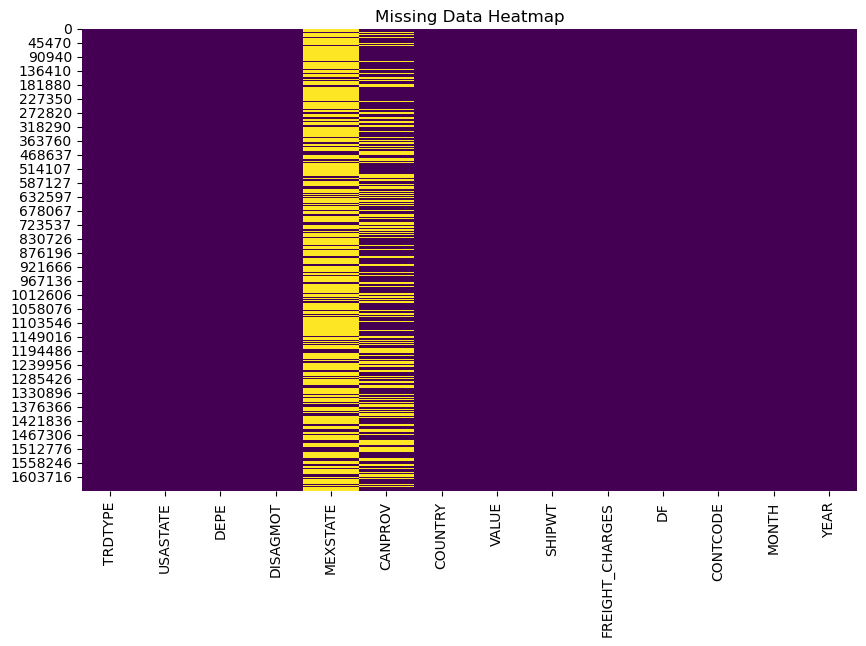

In [73]:
#Heatmap after handling missing values in month column
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

##### Missing Values in 'DF' 

In [75]:
#percentage of missing values per 'DF' column
combined_dot1['DF'].isnull().sum()/len(combined_dot1)*100

0.0

In [76]:
# Handling missing values in the 'DF' column
combined_dot1.groupby(['USASTATE'])['DF'].describe()

count unique       top   freq
USASTATE                               
AK         8800      2  Domestic   7894
AL        25763      2  Domestic  21590
AR        19589      2  Domestic  16823
AZ        35010      2  Domestic  25792
CA        72372      2  Domestic  53209
CO        27884      2  Domestic  22546
CT        26229      2  Domestic  20625
DC         3283      2  Domestic   2893
DE        13438      2  Domestic  10466
DU         8556      2  Domestic   7499
FL        47479      2  Domestic  37415
GA        44607      2  Domestic  34114
HI         4494      2  Domestic   3999
IA        26281      2  Domestic  22173
ID        18862      2  Domestic  16307
IL        57516      2  Domestic  43914
IN        38121      2  Domestic  29833
KS        26851      2  Domestic  22292
KY        29734      2  Domestic  23000
LA        24670      2  Domestic  20546
MA        35189      2  Domestic  27075
MD        23962      2  Domestic  18876
ME        19530      2  Domestic  17075
MI        43716      2  Domestic  35031
MN        37584      2  Domestic  30276
MO        31623      2  Domestic  25622
MS        22715      2  Domestic  17421
MT        14936      2  Domestic  13471
NC        39814      2  Domestic  30637
ND        16497      2  Domestic  14719
NE        20354      2  Domestic  17930
NH        18632      2  Domestic  14991
NJ        39024      2  Domestic  29066
NM        13890      2  Domestic  11628
NV        21712      2  Domestic  16345
NY        46734      2  Domestic  36794
OH        47041      2  Domestic  36580
OK        23328      2  Domestic  19463
OR        28023      2  Domestic  23127
PA        46571      2  Domestic  36717
RI        12727      2  Domestic   9660
SC        30595      2  Domestic  23939
SD        13969      2  Domestic  12230
TN        37235      2  Domestic  28806
TX        89213      2  Domestic  66650
UT        23813      2  Domestic  19351
VA        29302      2  Domestic  23550
VT        13650      2  Domestic  11511
WA        37392      2  Domestic  30494
WI        40794      2  Domestic  31903
WV        11816      2  Domestic  10351
WY         9565      2  Domestic   8550

In [77]:
# this was done using the mode of 'DF' grouped by 'USASTATE'
import pandas as pd
from sklearn.impute import SimpleImputer


# checking the missing values in the 'DF' column
missing_values = combined_dot1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
combined_dot1['DF'] = combined_dot1.groupby(['USASTATE','TRDTYPE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))

# If you still have missing values, you can fallback to imputing the mode of the entire column:
#imputer = SimpleImputer(strategy='most_frequent')
#combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']])

print(combined_dot1.head())

Missing values: 0
  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


In [78]:
combined_dot1.tail()

TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE           CANPROV COUNTRY  \
1649156  Import       WY  4101      Air      NaN  British Columbia  Canada   
1649157  Import       WY  4101      Air      NaN       Nova Scotia  Canada   
1649158  Import       WY  4101      Air      NaN           Ontario  Canada   
1649159  Import       WY  4101      Air      NaN            Quebec  Canada   
1649160  Import       WY  41XX      Air      NaN               NaN  Mexico   

         VALUE  SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  \
1649156   8869      63              290  Domestic  Non-Containerized   
1649157  10853      29               72  Domestic  Non-Containerized   
1649158  59348     307              858  Domestic  Non-Containerized   
1649159  12689      53              382  Domestic  Non-Containerized   
1649160  11931      38              136  Domestic  Non-Containerized   

             MONTH  YEAR  
1649156  September  2024  
1649157  September  2024  
1649158  September  2024  
1649159  September  2024  
1649160  September  2024

In [79]:
combined_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

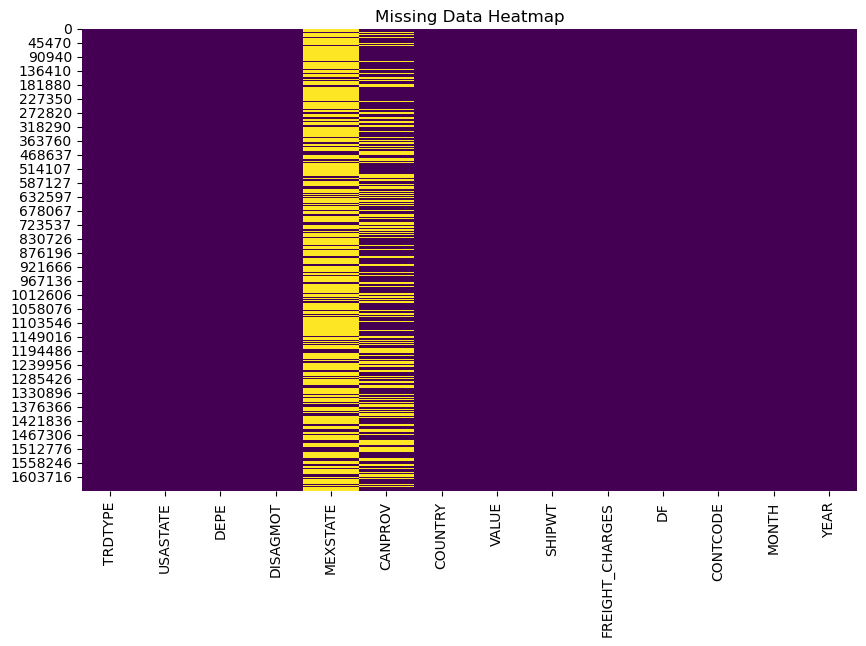

In [80]:
#Heatmap after handling missing values in month column
plt.figure(figsize=(10, 6))
sns.heatmap(combined_dot1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [81]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    935285
Import    565200
Name: count, dtype: int64

In [82]:
# Renaming values in theb 'TRDTYPE' column
combined_dot1["TRDTYPE"] = combined_dot1["TRDTYPE"].replace({1: 'Export',
    2: 'Import'})

In [83]:
combined_dot1['TRDTYPE'].value_counts()

TRDTYPE
Export    935285
Import    565200
Name: count, dtype: int64

In [84]:
combined_dot1['USASTATE'].value_counts()

USASTATE
TX    89213
CA    72372
IL    57516
FL    47479
OH    47041
NY    46734
PA    46571
GA    44607
MI    43716
WI    40794
NC    39814
NJ    39024
IN    38121
MN    37584
WA    37392
TN    37235
MA    35189
AZ    35010
MO    31623
SC    30595
KY    29734
VA    29302
OR    28023
CO    27884
KS    26851
IA    26281
CT    26229
AL    25763
LA    24670
MD    23962
UT    23813
OK    23328
MS    22715
NV    21712
NE    20354
AR    19589
ME    19530
ID    18862
NH    18632
ND    16497
MT    14936
SD    13969
NM    13890
VT    13650
DE    13438
RI    12727
WV    11816
WY     9565
AK     8800
DU     8556
HI     4494
DC     3283
Name: count, dtype: int64

In [85]:
combined_dot1['DEPE'].value_counts()

DEPE
2304    165205
3802     61961
20XX     61791
0901     53226
3401     51402
         ...  
3433         7
3881         4
0182         2
0152         2
3385         1
Name: count, Length: 246, dtype: int64

In [86]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  833631
Air                    293687
Rail                   221302
Other                   94424
Vessel                  46135
Pipeline                 6039
Foreign Trade Zones      4373
Mail                      894
Name: count, dtype: int64

In [87]:
# renaming values in the 'DISAGMOT' column #FTZ = Foreign Trade Zones
combined_dot1["DISAGMOT"] = combined_dot1["DISAGMOT"].replace({1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
    })

In [88]:
combined_dot1['DISAGMOT'].value_counts()

DISAGMOT
Truck                  833631
Air                    293687
Rail                   221302
Other                   94424
Vessel                  46135
Pipeline                 6039
Foreign Trade Zones      4373
Mail                      894
Name: count, dtype: int64

In [89]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    51000
MX    38557
NL    31359
CH    29003
DF    24838
JA    24405
BC    22568
SO    20256
TM    20216
CO    20006
QT    18177
OT    16827
GT    16174
SI    11069
SL    10674
PU     9207
AG     8700
DG     8676
CM     7253
VE     7066
HG     6930
MI     5529
MO     5356
TL     4258
ZA     3880
QR     3442
BS     3432
YU     2796
TB     2051
CL     1635
OA     1553
CS     1367
GR     1017
Name: count, dtype: int64

In [90]:
combined_dot1['CANPROV'].value_counts()

CANPROV
Ontario                  255316
Quebec                   169771
British Columbia         151019
Alberta                  135632
Manitoba                  89455
Saskatchewan              53196
New Brunswick             47868
Nova Scotia               25180
Prince Edward Island      10845
Newfoundland               8095
Yukon Territory             944
Province Unknown            273
Northwest Territories       247
Nunavut                      55
Name: count, dtype: int64

In [91]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    947896
Mexico    552589
Name: count, dtype: int64

In [92]:
# Renaming values in the 'COUNTRY' column
combined_dot1["COUNTRY"] = combined_dot1["COUNTRY"].replace({1220: 'Canada',
    2010: 'Mexico'})

In [93]:
combined_dot1['COUNTRY'].value_counts()

COUNTRY
Canada    947896
Mexico    552589
Name: count, dtype: int64

In [94]:
combined_dot1['VALUE'].count()

1500485

In [95]:
combined_dot1['SHIPWT'].count()

1500485

In [96]:
combined_dot1['FREIGHT_CHARGES'].count()

1500485

In [97]:
combined_dot1['DF'].value_counts()

DF
Domestic    1192769
Foreign      307716
Name: count, dtype: int64

In [98]:
# Renaming values in the 'DF' column
combined_dot1["DF"] = combined_dot1["DF"].replace({1.0: 'Domestic',
    2.0: 'Foreign'})

In [99]:
combined_dot1['DF'].value_counts()

DF
Domestic    1192769
Foreign      307716
Name: count, dtype: int64

In [100]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    820568
Containerized        545368
Others               134549
Name: count, dtype: int64

In [101]:
# Renaming values in the 'CONTCODE' column
combined_dot1["CONTCODE"] = combined_dot1["CONTCODE"].replace({'X': 'Containerized',
    '0':'Non_Containerized', '1':'Others'})

In [102]:
combined_dot1['CONTCODE'].value_counts()

CONTCODE
Non-Containerized    820568
Containerized        545368
Others               134549
Name: count, dtype: int64

#### Missing Values in 'MONTH'

###### The Values in the month column were dropped as two as the two files that is: December 2021 and December 2022 folders contained excel sheets which had no months column. that is: dot1_2021 and dot1_2022. these files are not catergorized based on month 

In [105]:
combined_dot1['MONTH'].value_counts()

MONTH
March        142647
August       139989
June         139585
July         139071
September    139010
May          138785
April        137937
February     136713
January      134648
October       85210
November      84257
December      82633
Name: count, dtype: int64

In [106]:
combined_dot1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500485 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1500485 non-null  object
 1   USASTATE         1500485 non-null  object
 2   DEPE             1500485 non-null  object
 3   DISAGMOT         1500485 non-null  object
 4   MEXSTATE         439277 non-null   object
 5   CANPROV          947896 non-null   object
 6   COUNTRY          1500485 non-null  object
 7   VALUE            1500485 non-null  int64 
 8   SHIPWT           1500485 non-null  int64 
 9   FREIGHT_CHARGES  1500485 non-null  int64 
 10  DF               1500485 non-null  object
 11  CONTCODE         1500485 non-null  object
 12  MONTH            1500485 non-null  object
 13  YEAR             1500485 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 171.7+ MB


#### Data Cleaning and Validation

In [108]:
combined_dot1.isna().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [109]:
combined_dot1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May', 'September', 'December', 'November', 'October'],
      dtype=object)

In [110]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic'], dtype=object)

In [111]:
combined_dot1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May', 'September', 'December', 'November', 'October'],
      dtype=object)

In [112]:
#describing the categorical variables
combined_dot1.describe(include='object')

TRDTYPE USASTATE     DEPE DISAGMOT MEXSTATE  CANPROV  COUNTRY  \
count   1500485  1500485  1500485  1500485   439277   947896  1500485   
unique        2       52      246        8       33       14        2   
top      Export       TX     2304    Truck       XX  Ontario   Canada   
freq     935285    89213   165205   833631    51000   255316   947896   

              DF           CONTCODE    MONTH  
count    1500485            1500485  1500485  
unique         2                  3       12  
top     Domestic  Non-Containerized    March  
freq     1192769             820568   142647

In [113]:
combined_dot1['MEXSTATE'].unique()

array([nan, 'XX', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'OT', 'QT',
       'SL', 'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI',
       'MO', 'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR',
       'GR'], dtype=object)

In [114]:
combined_dot1['MEXSTATE'].value_counts()

MEXSTATE
XX    51000
MX    38557
NL    31359
CH    29003
DF    24838
JA    24405
BC    22568
SO    20256
TM    20216
CO    20006
QT    18177
OT    16827
GT    16174
SI    11069
SL    10674
PU     9207
AG     8700
DG     8676
CM     7253
VE     7066
HG     6930
MI     5529
MO     5356
TL     4258
ZA     3880
QR     3442
BS     3432
YU     2796
TB     2051
CL     1635
OA     1553
CS     1367
GR     1017
Name: count, dtype: int64

In [115]:
#describing the categorical variables
combined_dot1.describe()

VALUE        SHIPWT  FREIGHT_CHARGES          YEAR
count  1.500485e+06  1.500485e+06     1.500485e+06  1.500485e+06
mean   4.294600e+06  1.748638e+06     5.613322e+04  2.022048e+03
std    4.678569e+07  4.774420e+07     1.180991e+06  1.326010e+00
min    0.000000e+00  0.000000e+00     0.000000e+00  2.020000e+03
25%    1.985000e+04  0.000000e+00     0.000000e+00  2.021000e+03
50%    1.033370e+05  3.000000e+00     3.820000e+02  2.022000e+03
75%    6.668740e+05  9.575000e+03     3.784000e+03  2.023000e+03
max    4.951806e+09  8.563936e+09     2.275531e+08  2.024000e+03

In [116]:
combined_dot1['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [117]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic'], dtype=object)

In [118]:
(combined_dot1['DF'] == 'nan').sum()/len(combined_dot1)*100

0.0

In [119]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Fill missing values in 'DF' column based on the mode within each 'COUNTRY' group
def impute_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0]) if not mode_val.empty else series

combined_dot1['DF'] = combined_dot1.groupby('COUNTRY')['DF'].transform(impute_mode)

# If there are still missing values, impute with the most frequent value in the entire column
imputer = SimpleImputer(strategy='most_frequent')
combined_dot1['DF'] = imputer.fit_transform(combined_dot1[['DF']]).ravel()  # ✅ Fixed

print(combined_dot1.head())


  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


In [120]:
# Group by 'COUNTRY' and fill missing values in 'DF' with the mode of each group
combined_dot1['DF'] = combined_dot1.groupby('COUNTRY')['DF'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# Check the result
print(combined_dot1.head())

  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export       AK  0115    Truck      NaN  New Brunswick  Canada     4660   
1  Export       AK  0901    Truck      NaN        Ontario  Canada    14360   
2  Export       AK  20XX   Vessel       XX            NaN  Mexico  4293733   
3  Export       AK  20XX      Air      NaN        Alberta  Canada    28283   
4  Export       AK  20XX      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES        DF           CONTCODE  MONTH  YEAR  
0         0               67   Foreign      Containerized  April  2020  
1         0              282  Domestic      Containerized  April  2020  
2  24971000                0  Domestic  Non-Containerized  April  2020  
3       443              563  Domestic      Containerized  April  2020  
4        69              538   Foreign      Containerized  April  2020  


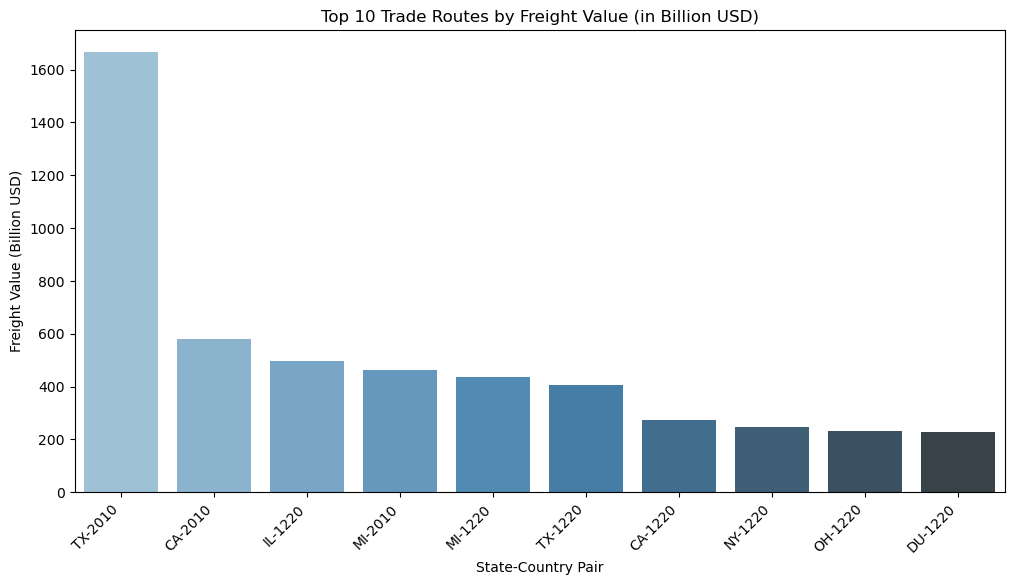

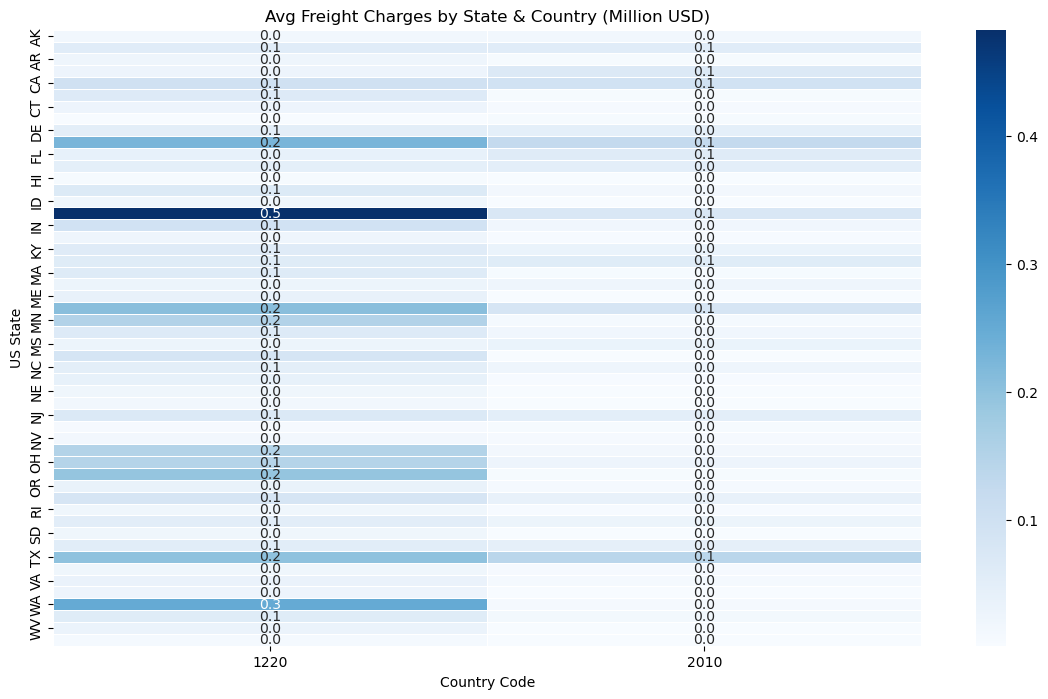


🔍 Key Trade Route Insights:
- Most active state: TX
- Top trade partner: 2010
- Highest value route: TX-2010 ($1665.6B)
- Avg shipment weight: 2.3M tons
- States with >50% efficiency: 0


In [532]:
# Trade Route Analysis (State-Country Instead of Ports)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("combined_dot1.csv")

# Clean data (remove rows with missing country/state)
clean_df = df.dropna(subset=['COUNTRY', 'USASTATE'])

# 1. Top State-Country Trade Pairs
state_trade = clean_df.groupby(['COUNTRY', 'USASTATE']).agg({
    'VALUE': 'sum',
    'SHIPWT': 'mean',
    'FREIGHT_CHARGES': 'sum'
}).sort_values('VALUE', ascending=False).head(10)

# Round & format large numbers for readability
state_trade['VALUE'] = state_trade['VALUE'] / 1e9  # Convert to billion
state_trade['FREIGHT_CHARGES'] = state_trade['FREIGHT_CHARGES'] / 1e6  # Convert to million
state_trade = state_trade.round(2)  # Round to 2 decimal places

# 2. Visualization: Top Trade Routes
plt.figure(figsize=(12, 6))
sns.barplot(
    x=state_trade.index.map(lambda x: f"{x[1]}-{x[0]}"),  # State-Country
    y='VALUE', 
    data=state_trade.reset_index(),
    palette='Blues_d'
)
plt.title('Top 10 Trade Routes by Freight Value (in Billion USD)')
plt.xlabel('State-Country Pair')
plt.ylabel('Freight Value (Billion USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Heatmap of Shipment Weight vs Charges (by State-Country)
pivot_table = clean_df.pivot_table(
    index='USASTATE',
    columns='COUNTRY',
    values=['SHIPWT', 'FREIGHT_CHARGES'],
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table['FREIGHT_CHARGES'] / 1e6,  # Convert to million
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linewidths=.5
)
plt.title('Avg Freight Charges by State & Country (Million USD)')
plt.xlabel('Country Code')
plt.ylabel('US State')
plt.show()

# 4. Table of Key Findings (printed output)
def format_number(num):
    """Format large numbers with B (billion), M (million), K (thousand)."""
    if num >= 1e9:
        return f"{num / 1e9:.1f}B"
    elif num >= 1e6:
        return f"{num / 1e6:.1f}M"
    elif num >= 1e3:
        return f"{num / 1e3:.1f}K"
    return f"{num:.1f}"

most_active_state = state_trade.index[0][1]
top_trade_partner = state_trade.index[0][0]
highest_value_route = f"{most_active_state}-{top_trade_partner}"
highest_value = format_number(state_trade['VALUE'].iloc[0] * 1e9)  # Convert back for printing

print("\n🔍 Key Trade Route Insights:")
print(f"- Most active state: {most_active_state}")
print(f"- Top trade partner: {top_trade_partner}")
print(f"- Highest value route: {highest_value_route} (${highest_value})")
print(f"- Avg shipment weight: {format_number(clean_df['SHIPWT'].mean())} tons")
print(f"- States with >50% efficiency: {len(state_trade[state_trade['FREIGHT_CHARGES'] / state_trade['VALUE'] < 0.5])}")


In [121]:
combined_dot1['DF'].unique()

array(['Foreign', 'Domestic'], dtype=object)

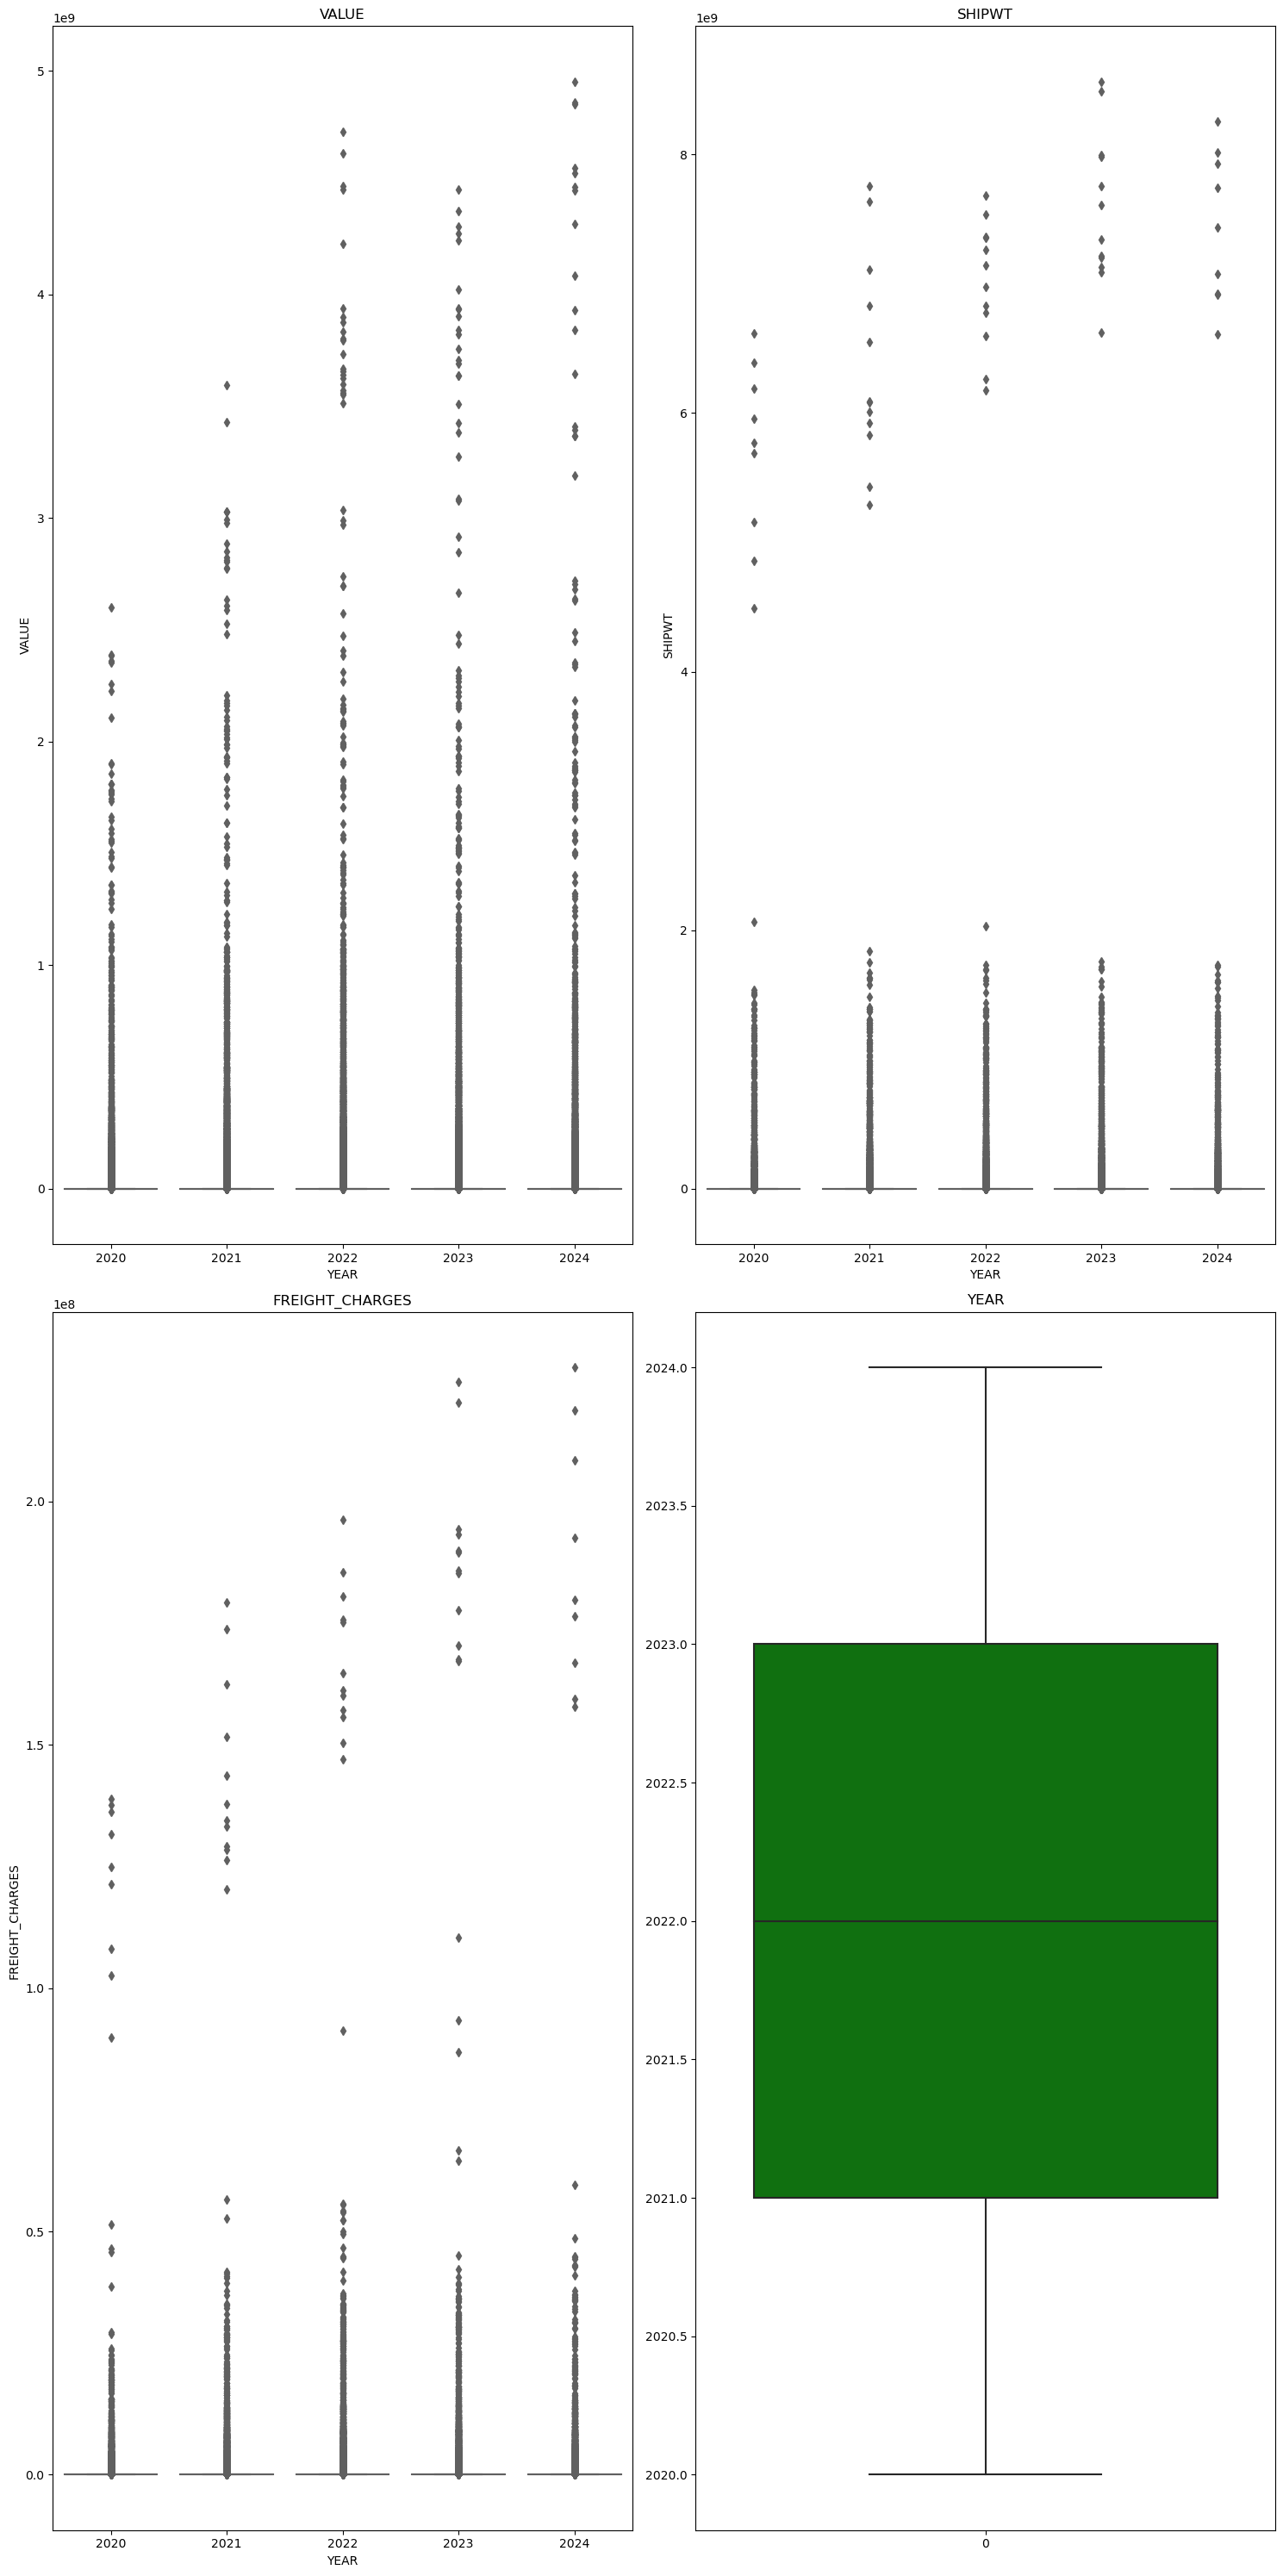

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data by years 2020 to 2024
years = [2020, 2021, 2022, 2023, 2024]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.title('Outliers in Numerical Data by Year')

# Plot VALUE by year
sns.boxplot(x='YEAR', y='VALUE', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('VALUE')

# Plot SHIPWT by year
sns.boxplot(x='YEAR', y='SHIPWT', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('SHIPWT')

# Plot FREIGHT_CHARGES by year
sns.boxplot(x='YEAR', y='FREIGHT_CHARGES', data=combined_dot1[combined_dot1['YEAR'].isin(years)], palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('FREIGHT_CHARGES')

sns.boxplot(combined_dot1['YEAR'],color='green',ax=axes[1,1])
axes[1,1].set_title('YEAR')


# Improve layout
plt.tight_layout()
plt.show()

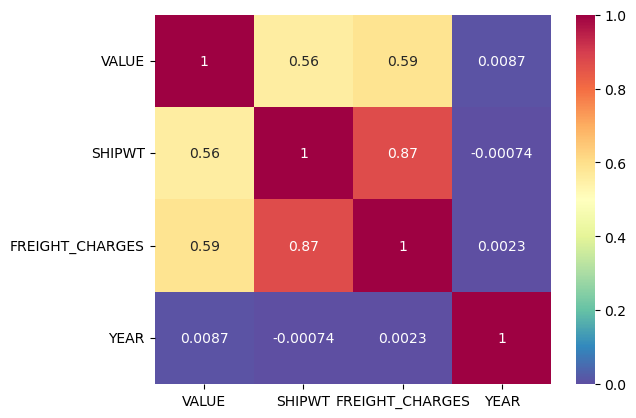

In [123]:
# Create correlation matrix
correlation = combined_dot1.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Spectral_r');

#### Univariate Analysis

###### Numerical

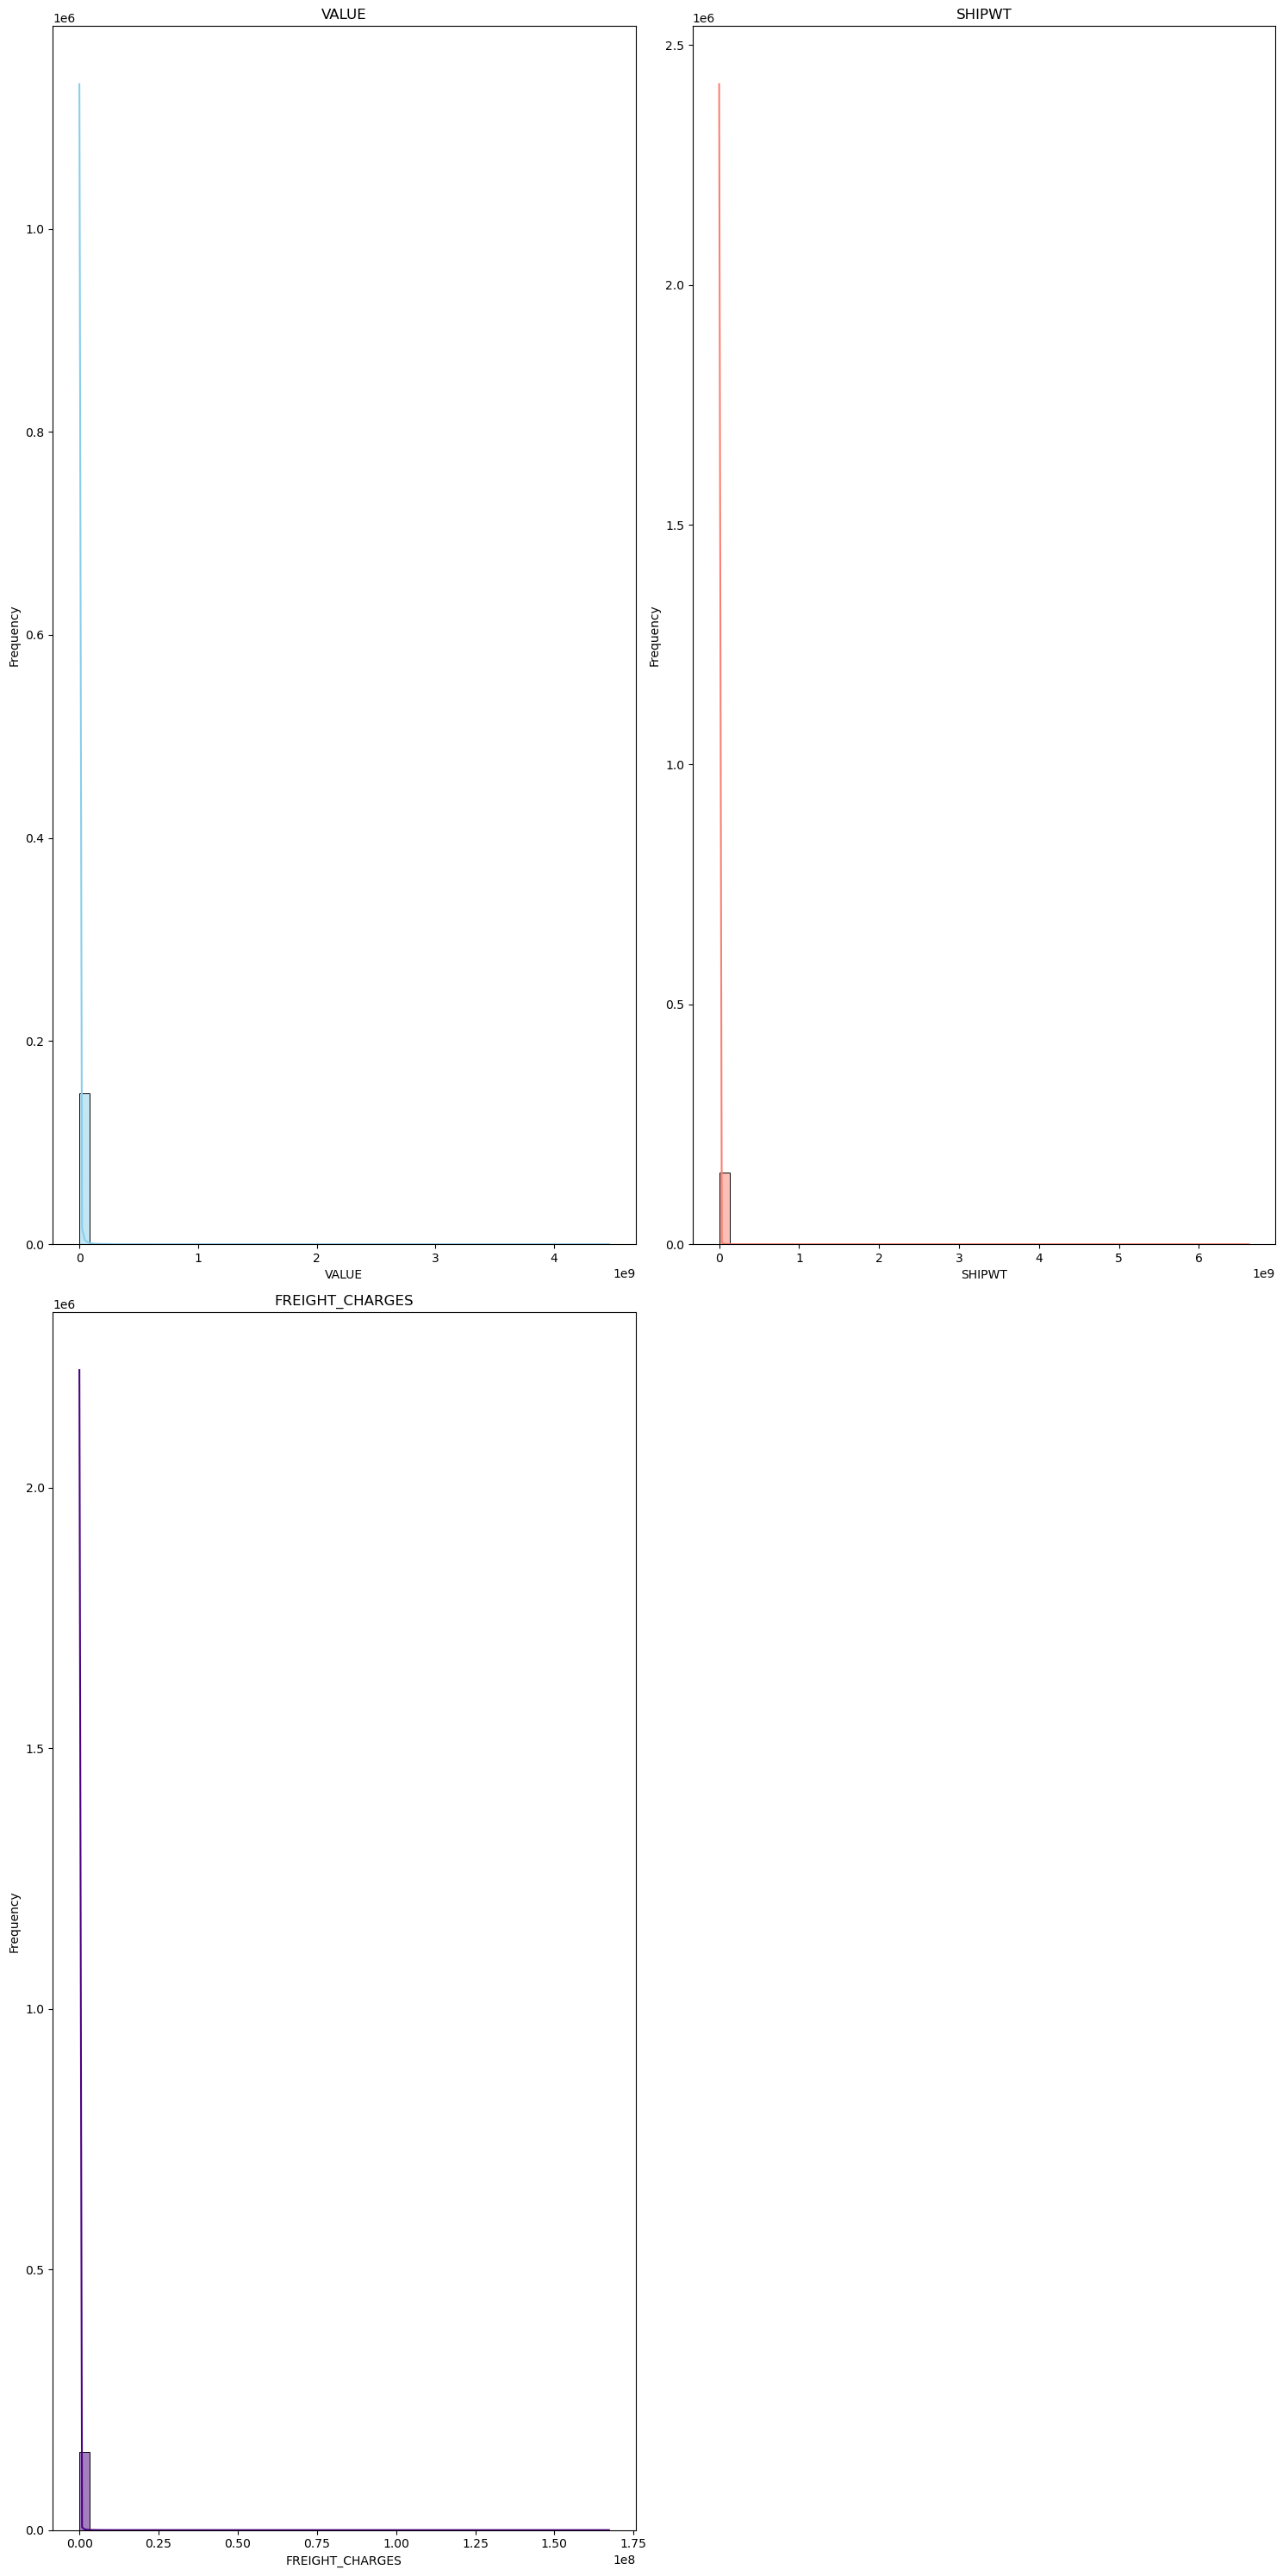

In [126]:
import numpy as np

# Downsample the dataset to a smaller size (e.g., 10% of the original data)
sampled_data = combined_dot1.sample(frac=0.1, random_state=42)  # 10% sample

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))

# Plot 'VALUE' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='VALUE', kde=True, color='skyblue', ax=axes[0, 0], bins=50)
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xlabel('VALUE')
axes[0, 0].set_ylabel('Frequency')

# Plot 'SHIPWT' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='SHIPWT', kde=True, color='salmon', ax=axes[0, 1], bins=50)
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xlabel('SHIPWT')
axes[0, 1].set_ylabel('Frequency')

# Plot 'FREIGHT_CHARGES' as a histogram for the sampled dataset
sns.histplot(data=sampled_data, x='FREIGHT_CHARGES', kde=True, color='indigo', ax=axes[1, 0], bins=50)
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xlabel('FREIGHT_CHARGES')
axes[1, 0].set_ylabel('Frequency')

axes[1,1].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


###### Categorical

In [369]:
print("Columns in combined_dot1:", combined_dot1.columns)

Columns in combined_dot1: Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV',
       'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE',
       'MONTH', 'YEAR'],
      dtype='object')


In [371]:
print(combined_dot1['TRDTYPE'].isnull().sum())  # Count missing values

0


In [373]:
print(combined_dot1['TRDTYPE'].dtype)

int64


In [375]:
combined_dot1['TRDTYPE'] = combined_dot1['TRDTYPE'].astype(str)

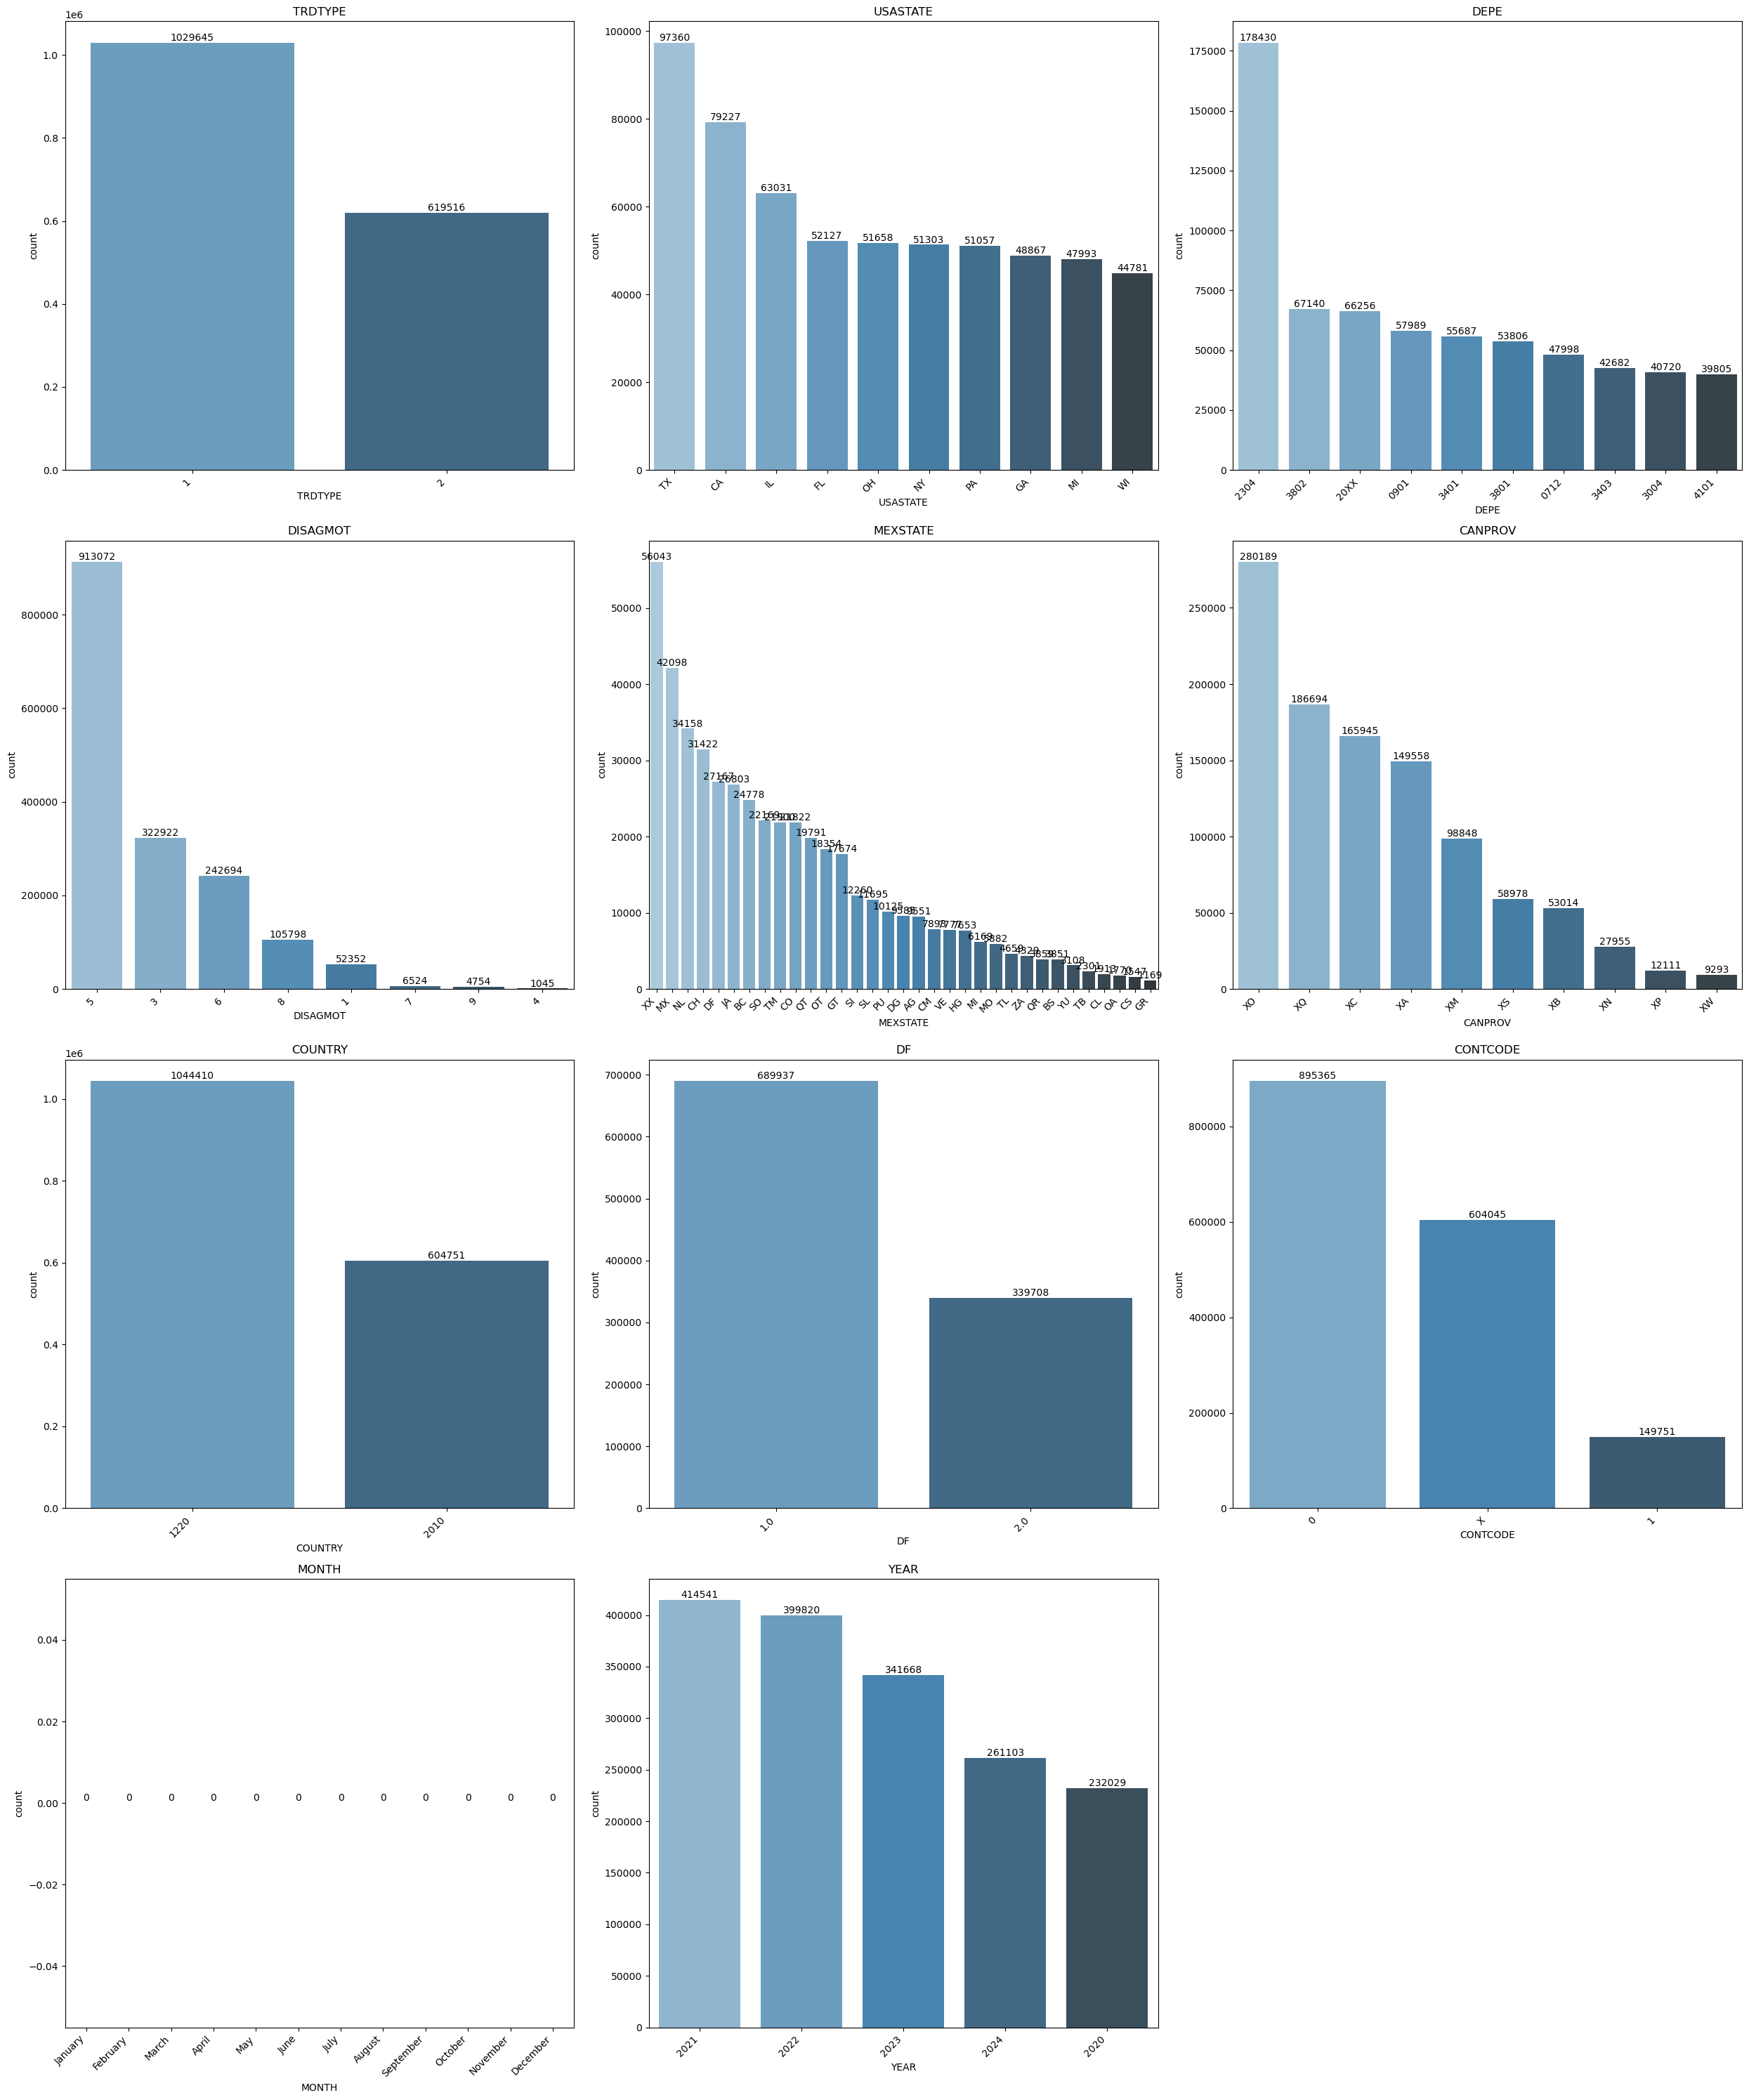

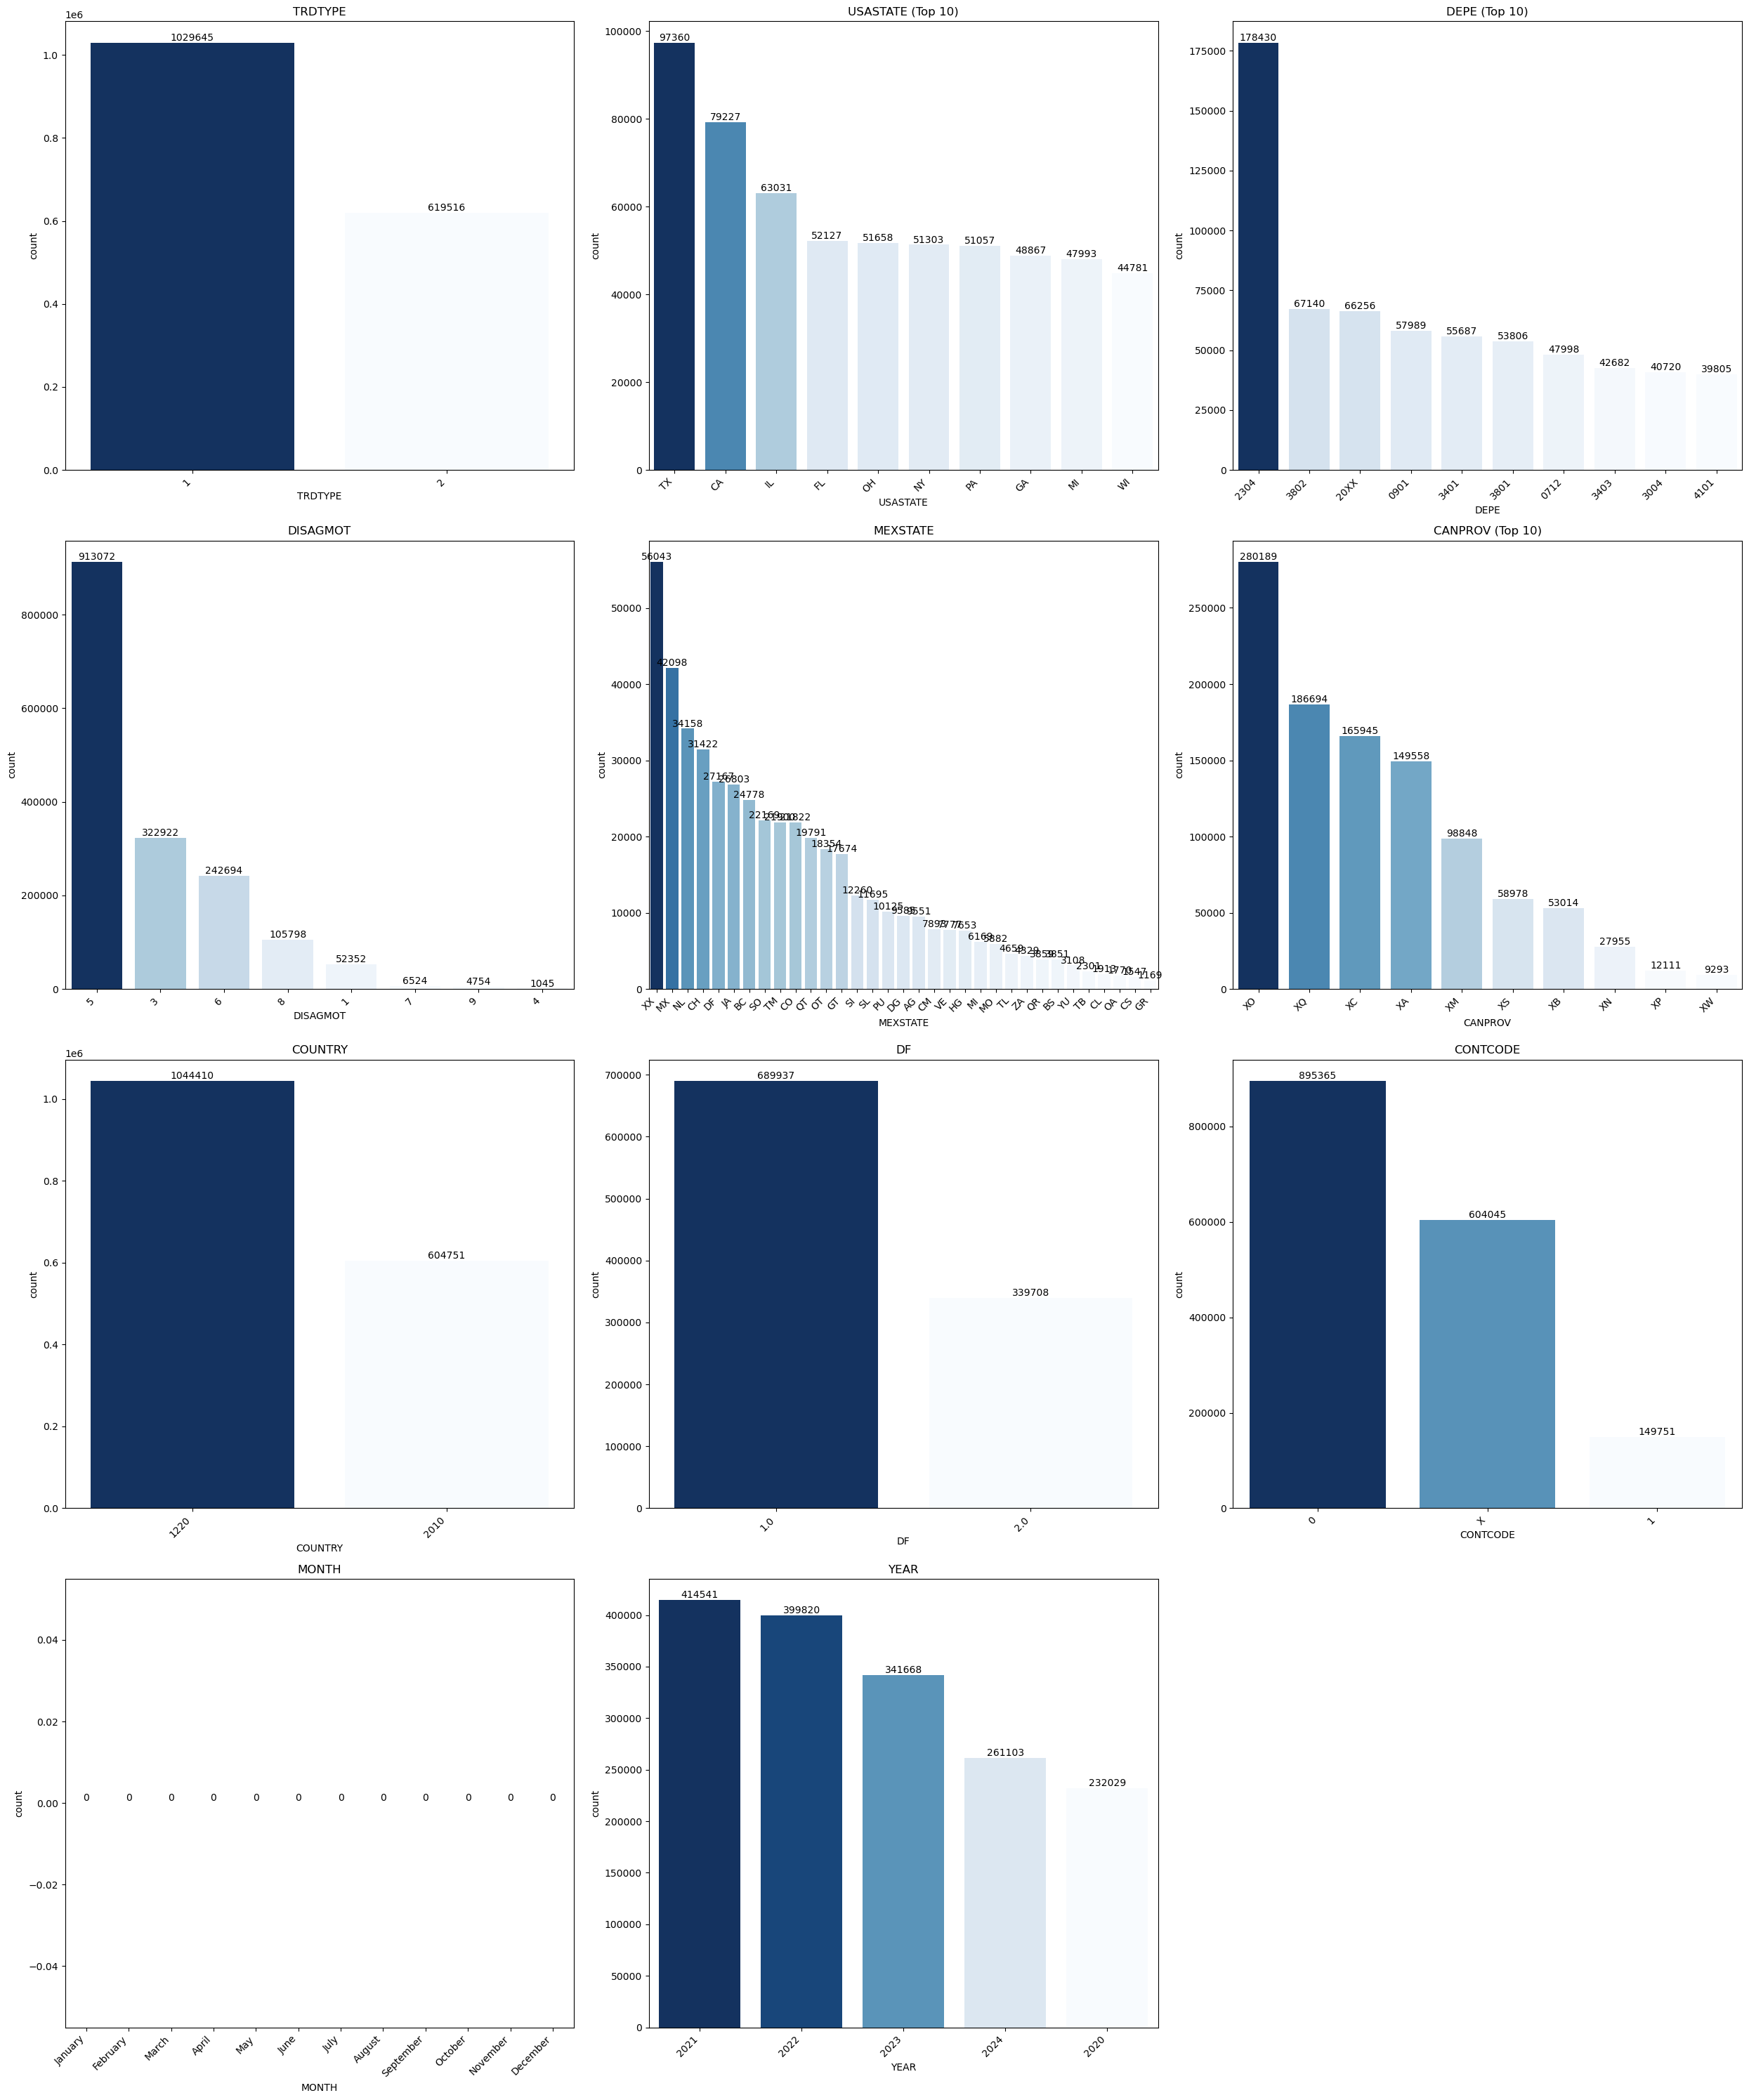

In [379]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))

# Define a function to add count labels to the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Function to create a gradient color palette
def get_gradient_palette(n_colors):
    return sns.color_palette("Blues_d", n_colors=n_colors)

# Plot 'TRDTYPE'
order_trdtype = combined_dot1['TRDTYPE'].value_counts().index
sns.countplot(x="TRDTYPE", data=combined_dot1, palette=get_gradient_palette(len(order_trdtype)), ax=axes[0, 0], order=order_trdtype)
axes[0, 0].set_title('TRDTYPE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 0])

# Plot 'USASTATE' (Top 10)
top_usa_states = combined_dot1['USASTATE'].value_counts().nlargest(10).index
sns.countplot(x="USASTATE", data=combined_dot1, palette=get_gradient_palette(len(top_usa_states)), ax=axes[0, 1], order=top_usa_states)
axes[0, 1].set_title('USASTATE')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 1])

# Plot 'DEPE' (Top 10)
top_depe = combined_dot1['DEPE'].value_counts().nlargest(10).index
sns.countplot(x="DEPE", data=combined_dot1, palette=get_gradient_palette(len(top_depe)), ax=axes[0, 2], order=top_depe)
axes[0, 2].set_title('DEPE')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[0, 2])

# Plot 'DISAGMOT'
order_disagmot = combined_dot1['DISAGMOT'].value_counts().index
sns.countplot(x="DISAGMOT", data=combined_dot1, palette=get_gradient_palette(len(order_disagmot)), ax=axes[1, 0], order=order_disagmot)
axes[1, 0].set_title('DISAGMOT')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 0])

# Plot 'MEXSTATE'
order_mexstate = combined_dot1['MEXSTATE'].value_counts().index
sns.countplot(x="MEXSTATE", data=combined_dot1, palette=get_gradient_palette(len(order_mexstate)), ax=axes[1, 1], order=order_mexstate)
axes[1, 1].set_title('MEXSTATE')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 1])

# Plot 'CANPROV' (Top 10)
top_canprov = combined_dot1['CANPROV'].value_counts().nlargest(10).index
sns.countplot(x="CANPROV", data=combined_dot1, palette=get_gradient_palette(len(top_canprov)), ax=axes[1, 2], order=top_canprov)
axes[1, 2].set_title('CANPROV')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[1, 2])

# Plot 'COUNTRY'
order_country = combined_dot1['COUNTRY'].value_counts().index
sns.countplot(x="COUNTRY", data=combined_dot1, palette=get_gradient_palette(len(order_country)), ax=axes[2, 0], order=order_country)
axes[2, 0].set_title("COUNTRY")
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 0])

# Plot 'DF'
order_df = combined_dot1['DF'].value_counts().index
sns.countplot(x="DF", data=combined_dot1, palette=get_gradient_palette(len(order_df)), ax=axes[2, 1], order=order_df)
axes[2, 1].set_title("DF")
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 1])

# Plot 'CONTCODE'
order_contcode = combined_dot1['CONTCODE'].value_counts().index
sns.countplot(x="CONTCODE", data=combined_dot1, palette=get_gradient_palette(len(order_contcode)), ax=axes[2, 2], order=order_contcode)
axes[2, 2].set_title("CONTCODE")
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[2, 2])

# Plot 'MONTH'
order_month = combined_dot1['MONTH'].value_counts().index
sns.countplot(x="MONTH", data=combined_dot1, palette=get_gradient_palette(len(order_month)), ax=axes[3, 0], order=order_month)
axes[3, 0].set_title("MONTH")
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 0])

# Plot 'YEAR'
order_year = combined_dot1['YEAR'].value_counts().index
sns.countplot(x="YEAR", data=combined_dot1, palette=get_gradient_palette(len(order_year)), ax=axes[3, 1], order=order_year)
axes[3, 1].set_title("YEAR")
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45, ha='right')
add_count_labels(axes[3, 1])

# Turn off unnecessary axes
axes[3, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))

# Function to add count labels on bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Function to plot with a gradient color effect
def plot_with_gradient(ax, column, title, data, top_n=None):
    # Get order of categories
    order = data[column].value_counts().index if top_n is None else data[column].value_counts().nlargest(top_n).index
    
    # Get counts of categories
    counts = data[column].value_counts().reindex(order)

    # Normalize color intensity based on counts
    norm = plt.Normalize(counts.min(), counts.max())
    colors = sns.color_palette("Blues", as_cmap=True)(norm(counts.values))  # Fix applied

    # Create count plot (sns.countplot instead of sns.barplot)
    sns.countplot(x=column, data=data, palette=colors, ax=ax, order=order)  # Fix applied
    
    # Formatting
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    add_count_labels(ax)


# Plotting each category with gradient coloring
plot_with_gradient(axes[0, 0], "TRDTYPE", "TRDTYPE", combined_dot1)
plot_with_gradient(axes[0, 1], "USASTATE", "USASTATE (Top 10)", combined_dot1, top_n=10)
plot_with_gradient(axes[0, 2], "DEPE", "DEPE (Top 10)", combined_dot1, top_n=10)
plot_with_gradient(axes[1, 0], "DISAGMOT", "DISAGMOT", combined_dot1)
plot_with_gradient(axes[1, 1], "MEXSTATE", "MEXSTATE", combined_dot1)
plot_with_gradient(axes[1, 2], "CANPROV", "CANPROV (Top 10)", combined_dot1, top_n=10)
plot_with_gradient(axes[2, 0], "COUNTRY", "COUNTRY", combined_dot1)
plot_with_gradient(axes[2, 1], "DF", "DF", combined_dot1)
plot_with_gradient(axes[2, 2], "CONTCODE", "CONTCODE", combined_dot1)
plot_with_gradient(axes[3, 0], "MONTH", "MONTH", combined_dot1)
plot_with_gradient(axes[3, 1], "YEAR", "YEAR", combined_dot1)

# Turn off the last empty axis
axes[3, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Bivariate Analysis


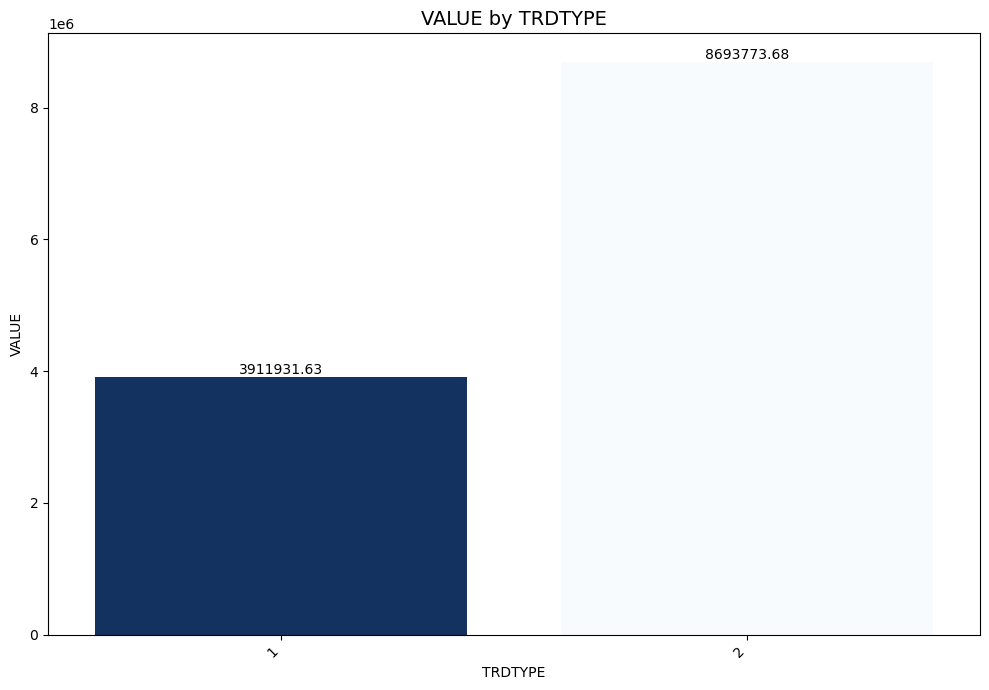

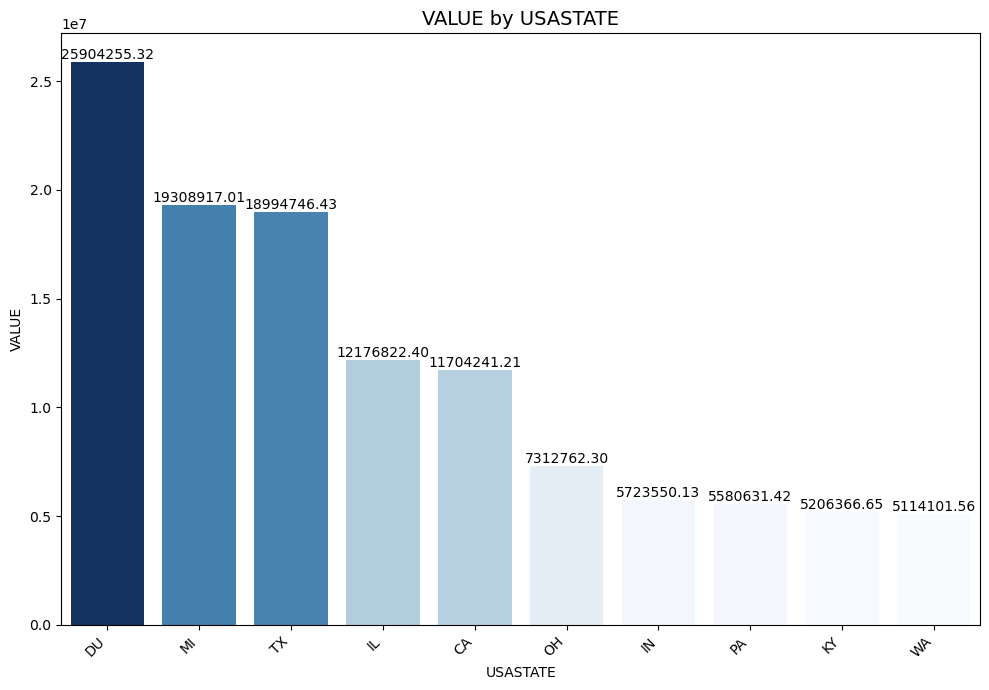

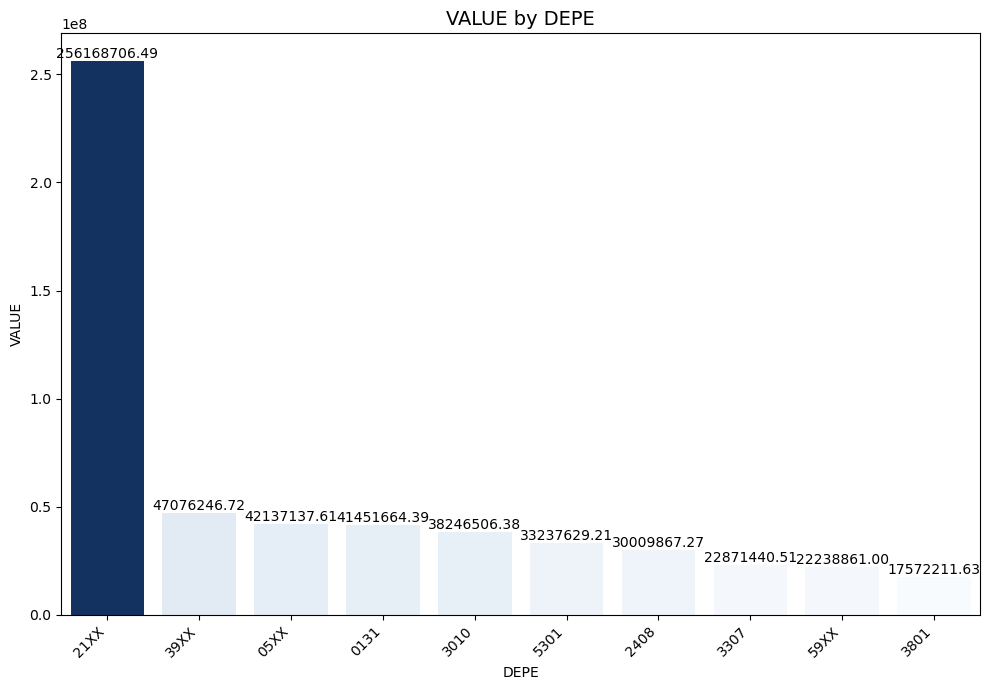

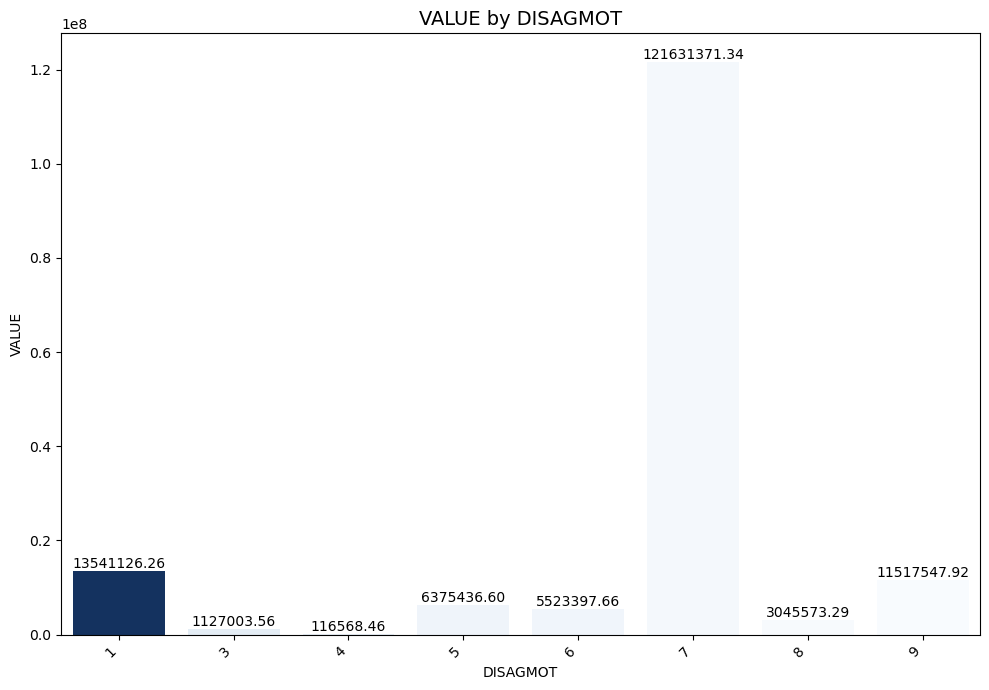

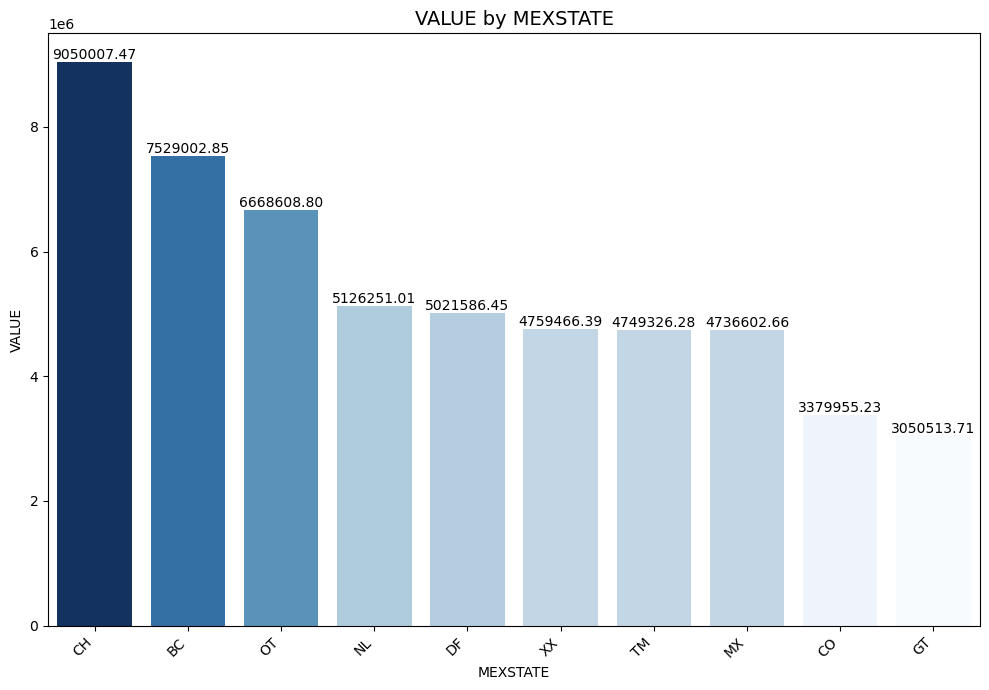

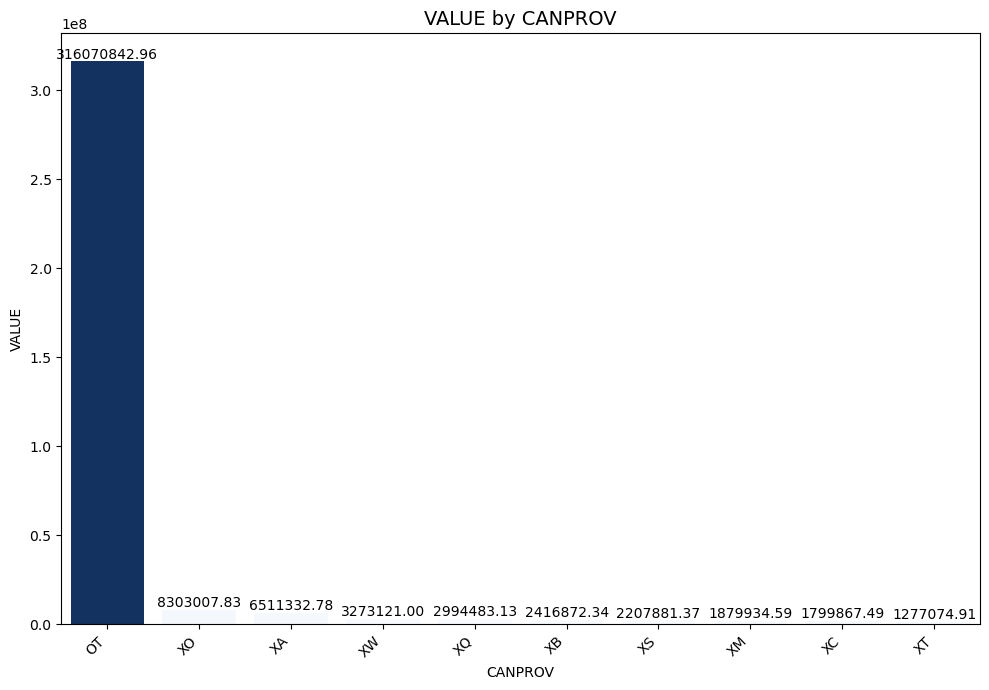

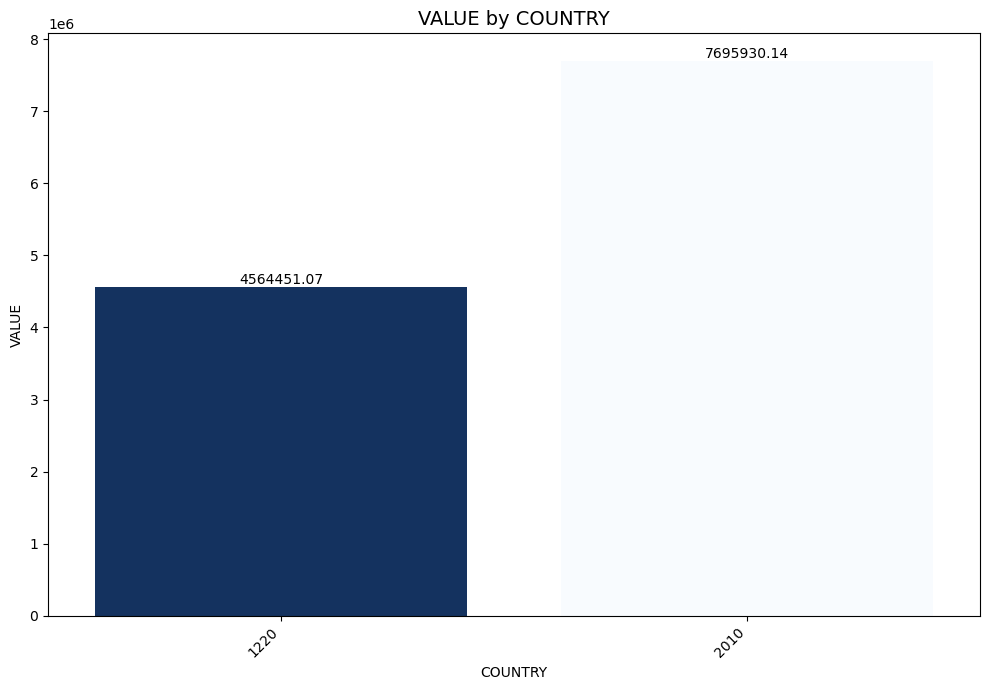

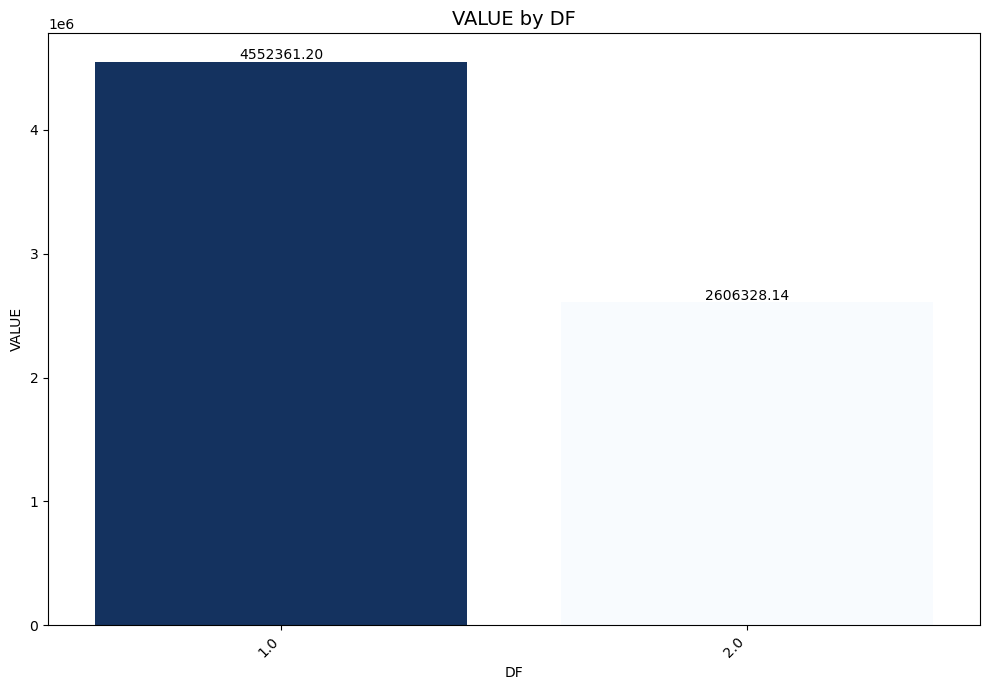

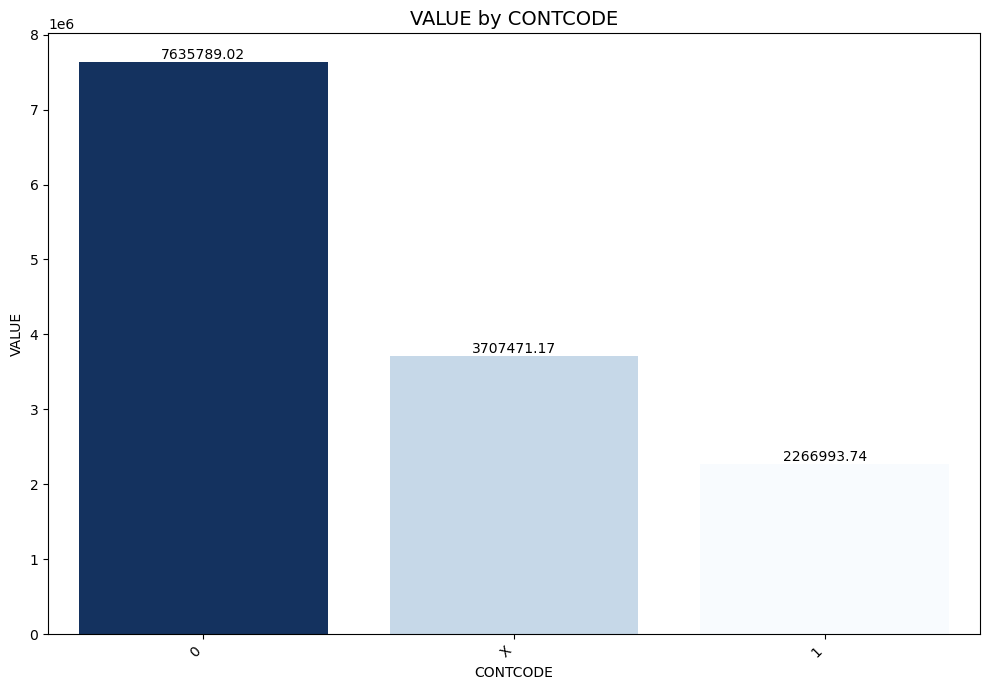

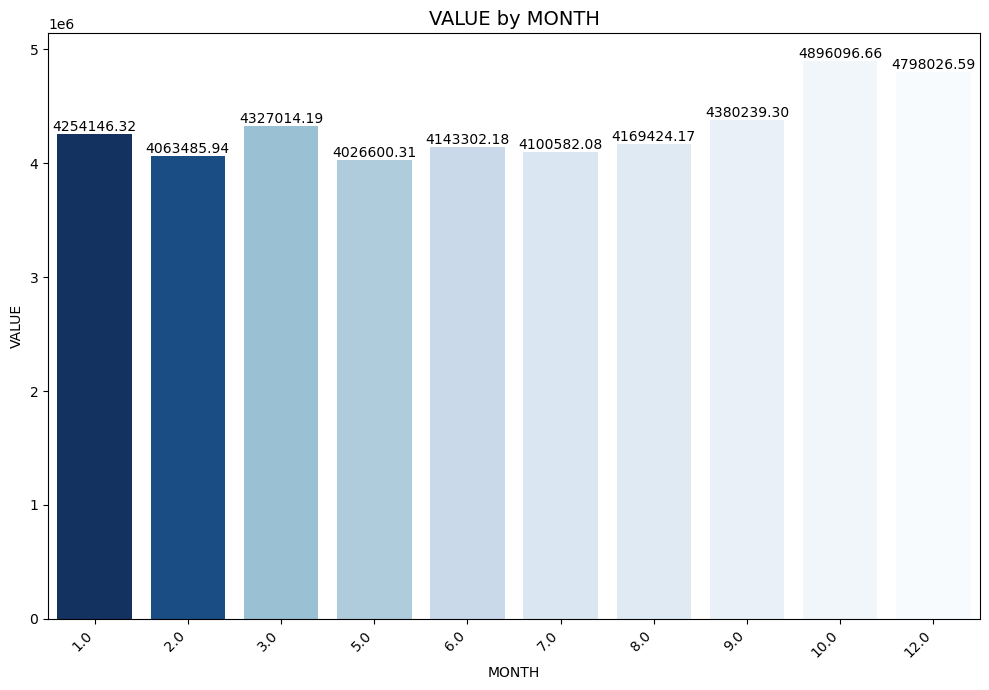

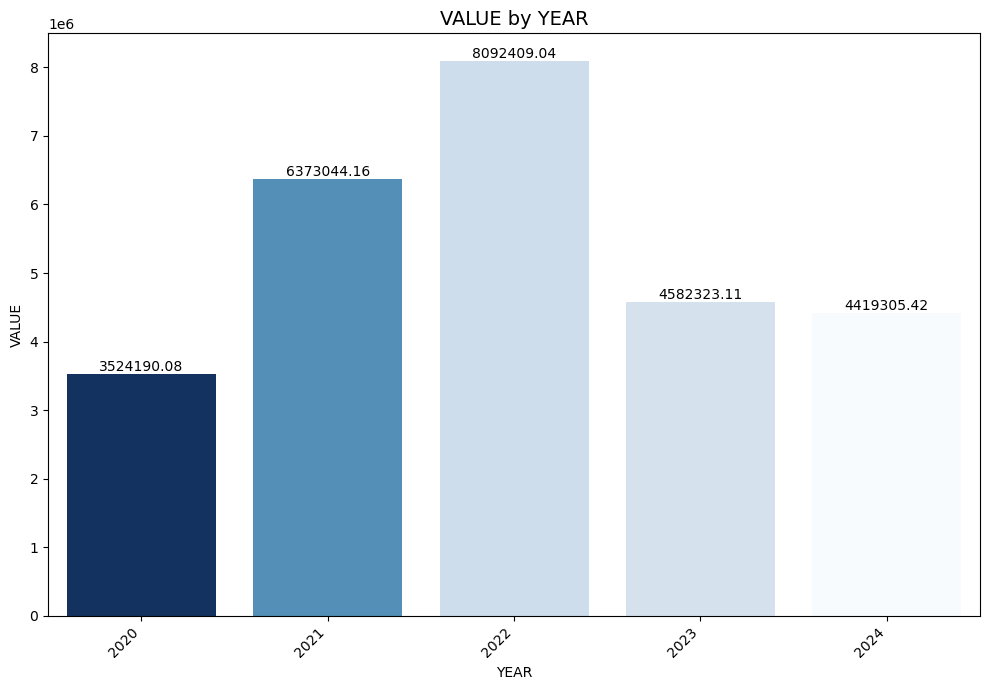

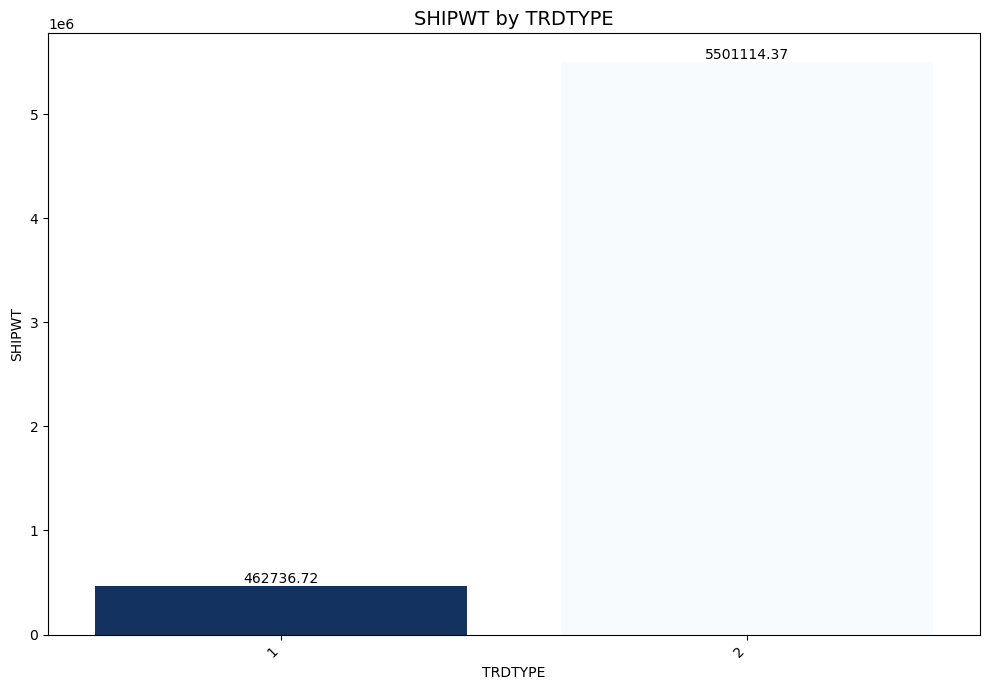

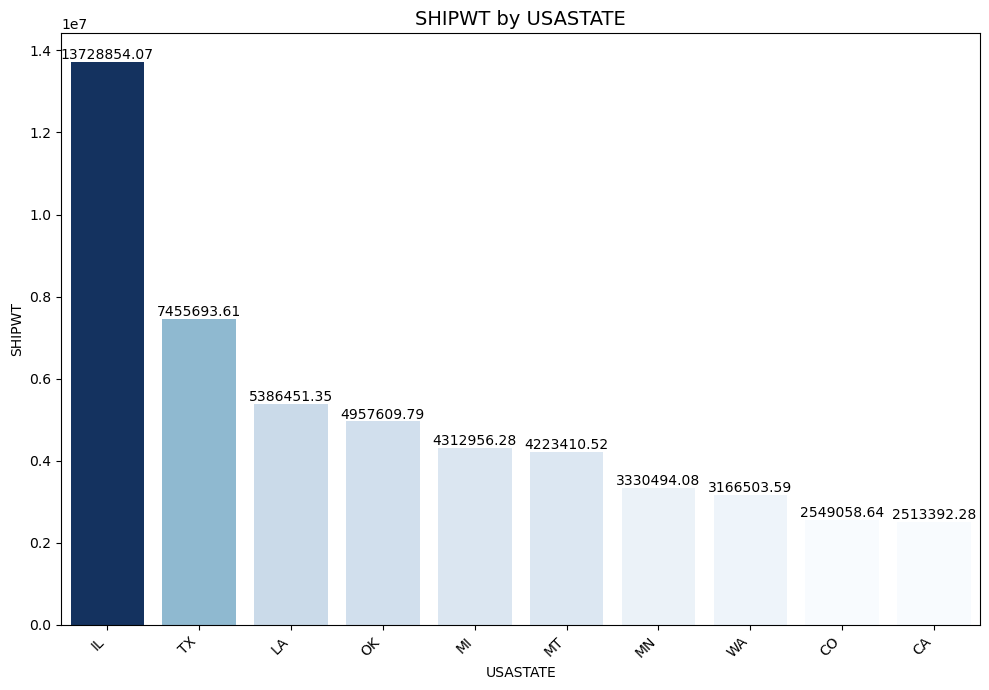

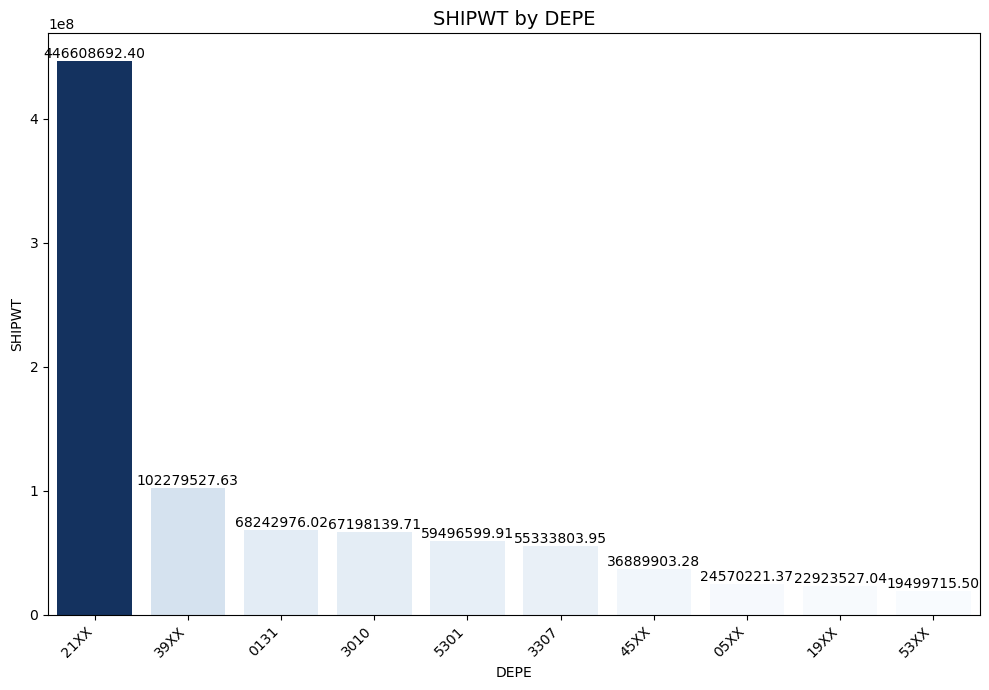

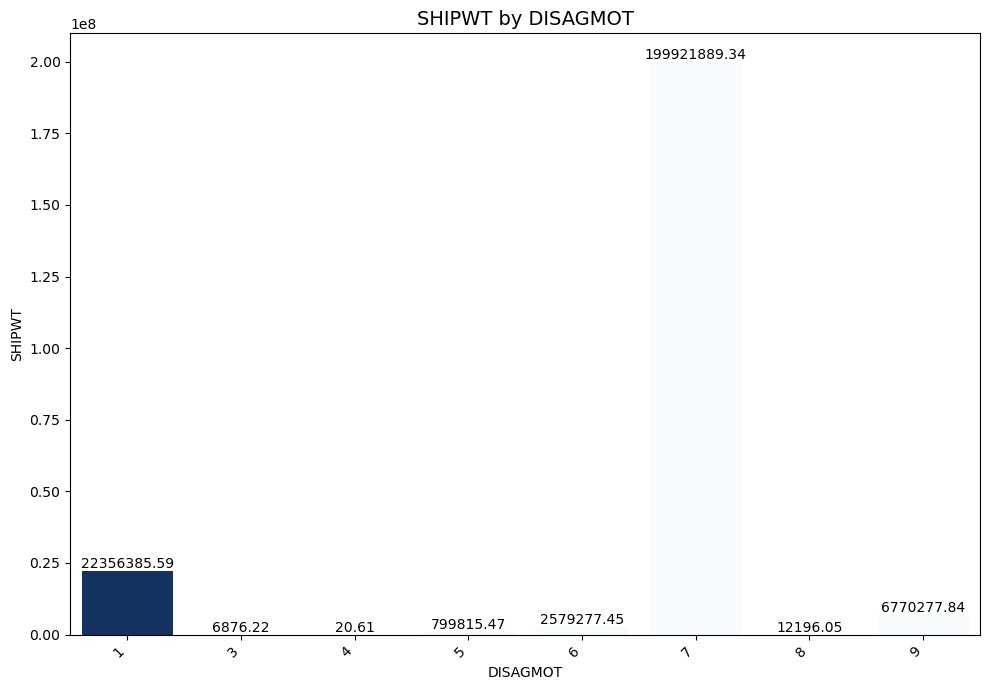

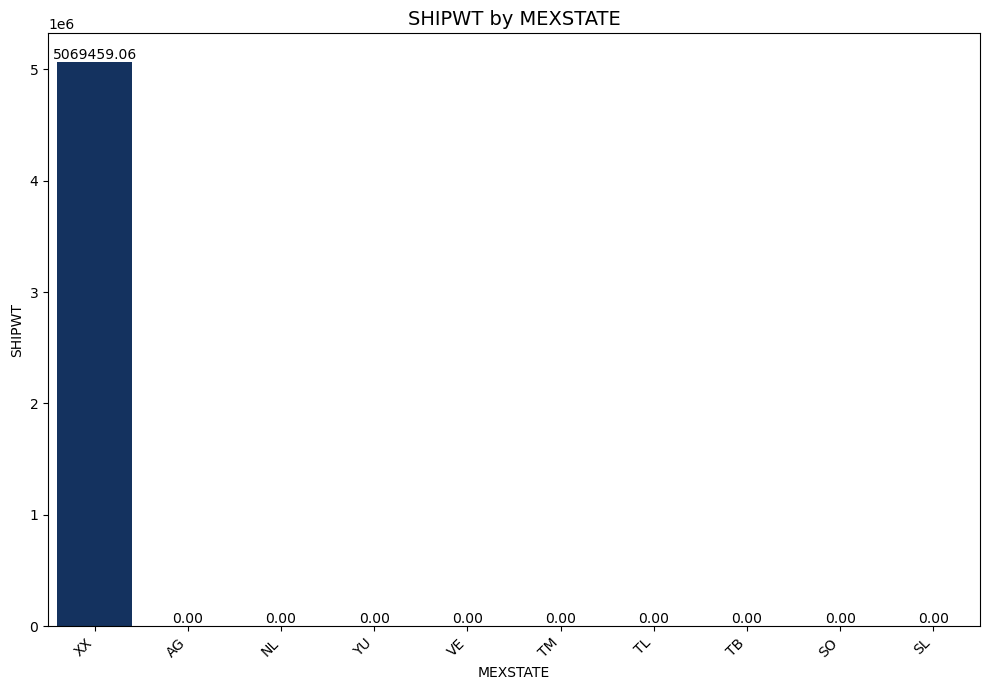

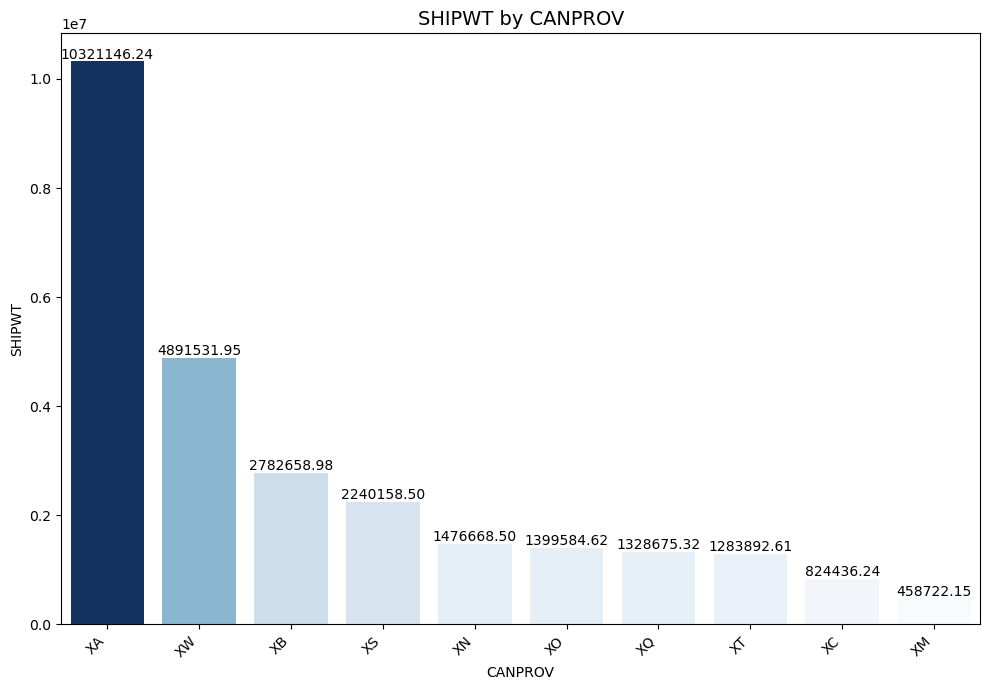

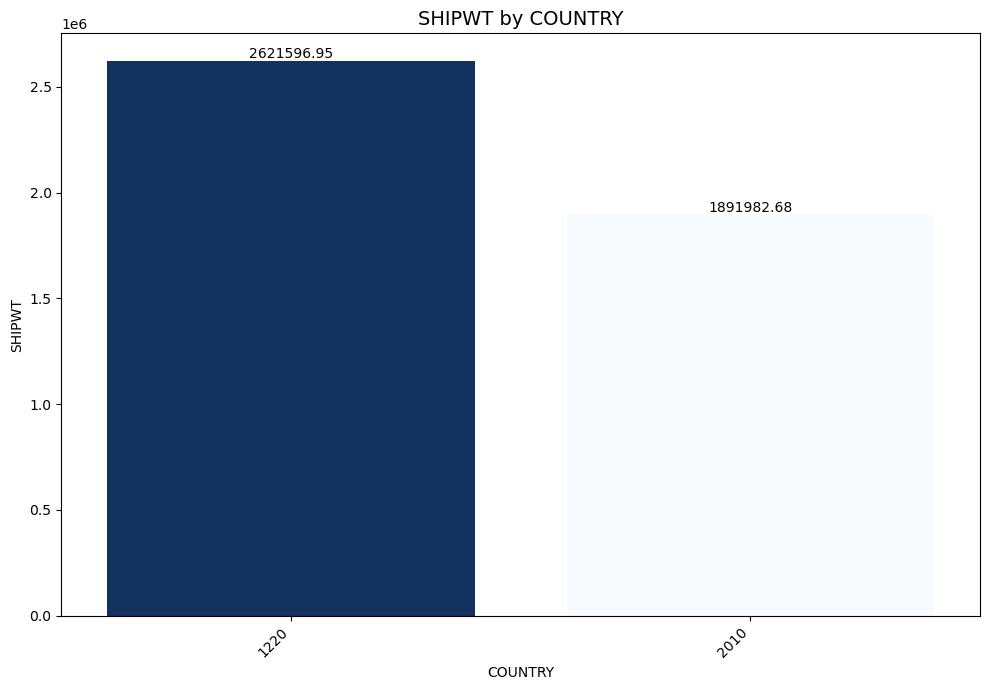

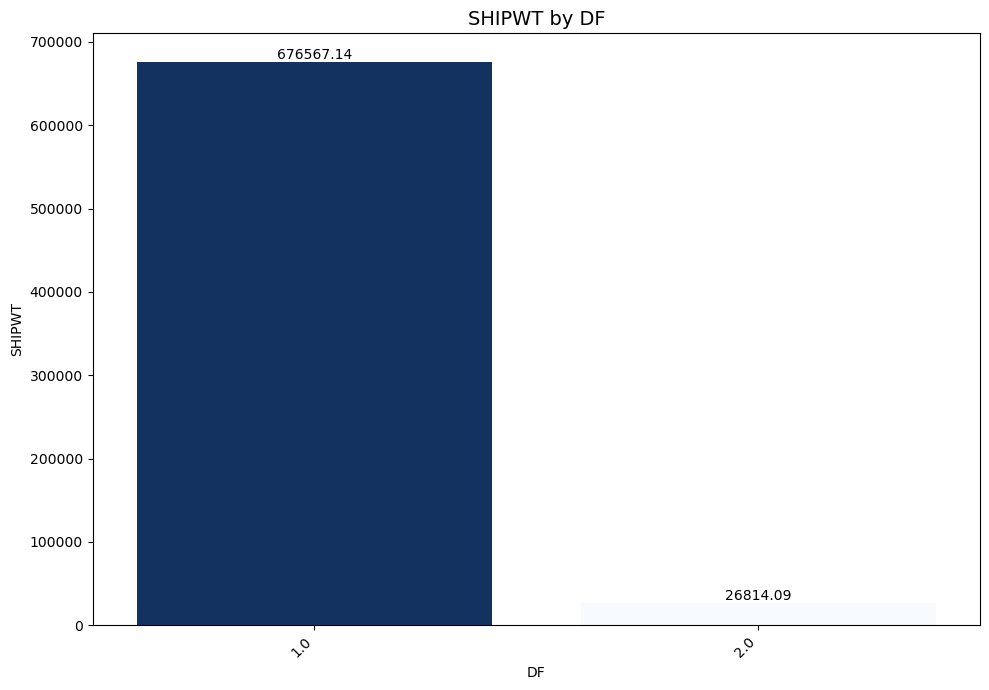

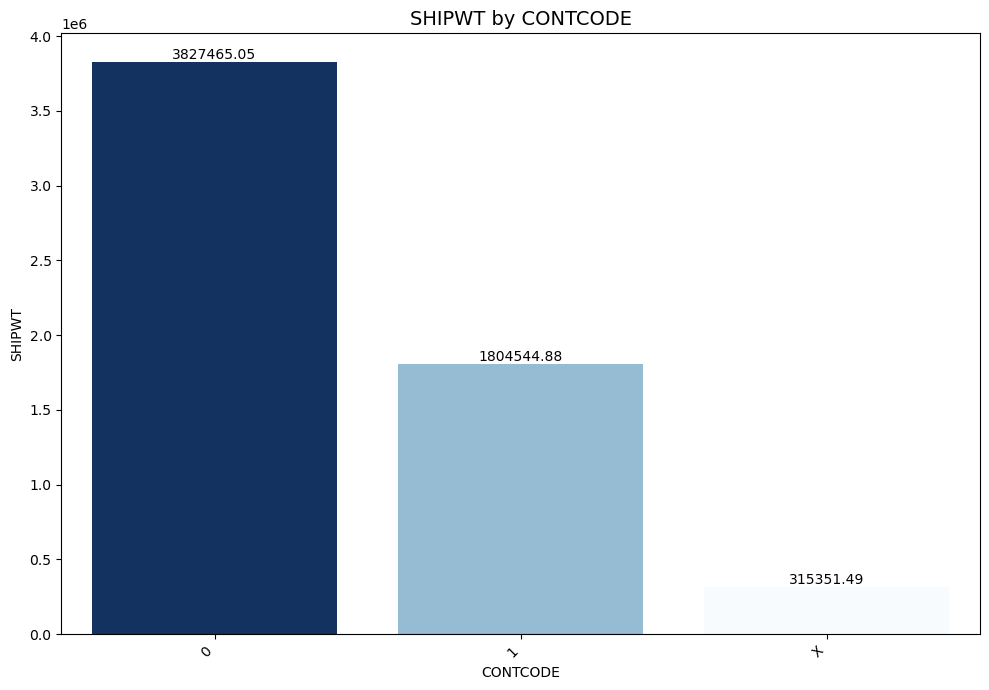

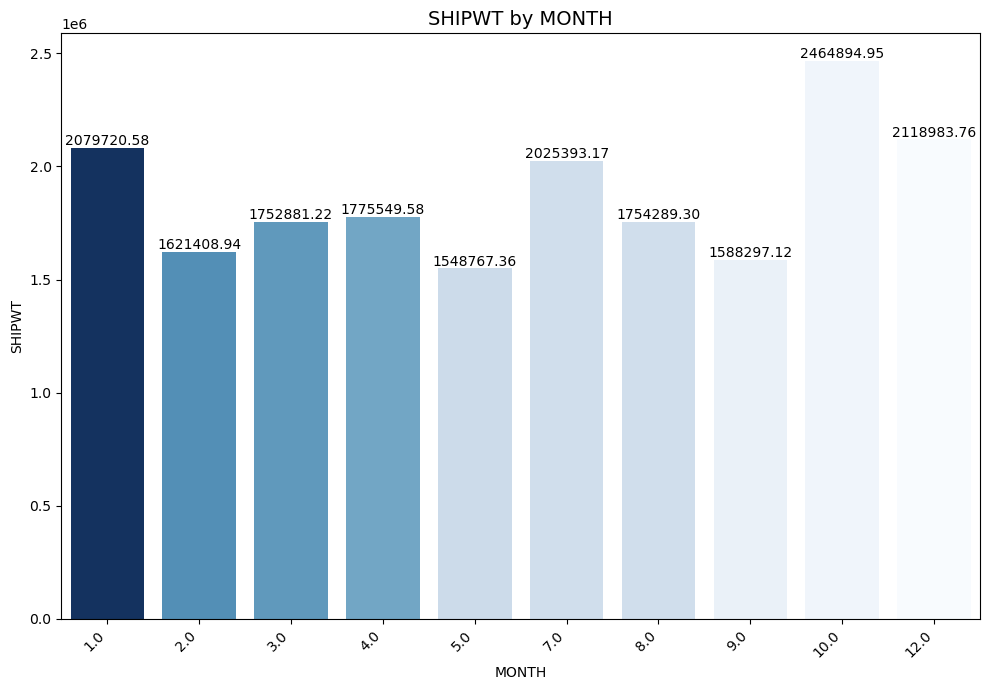

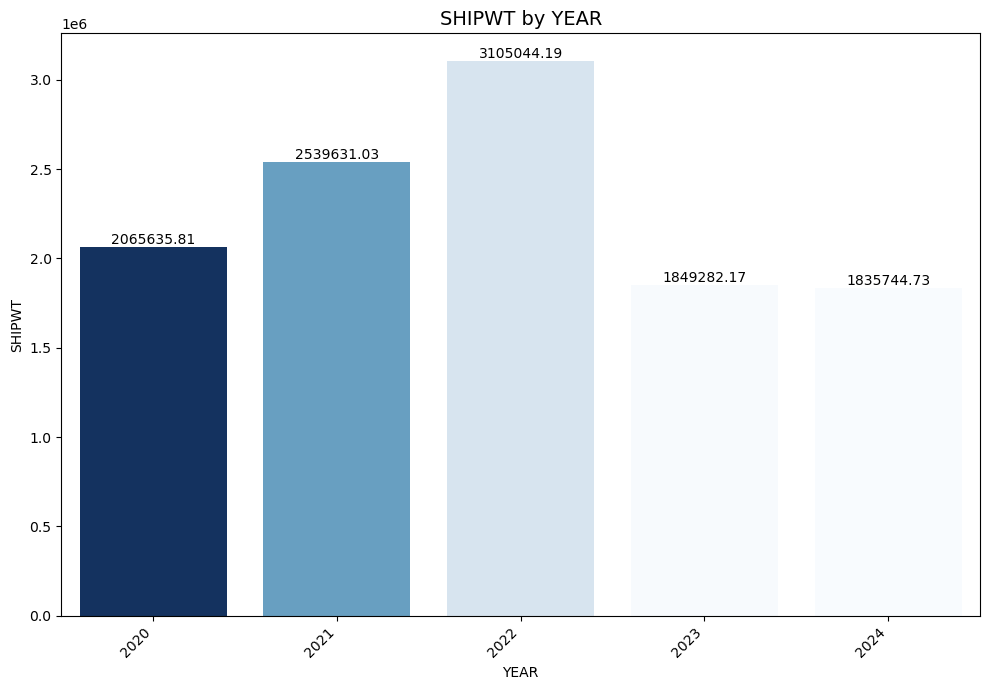

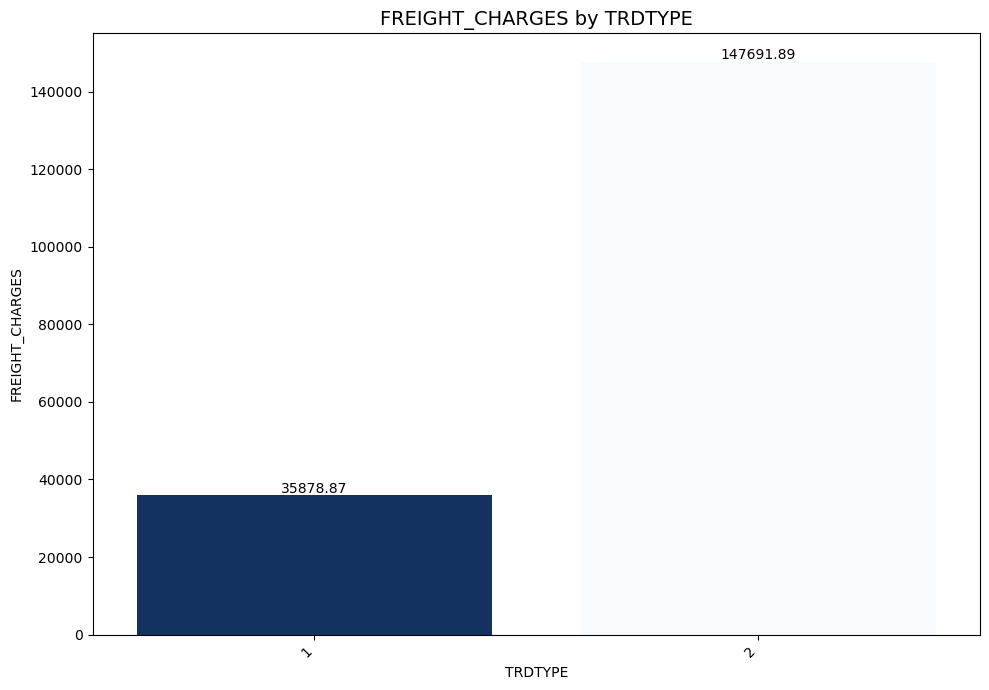

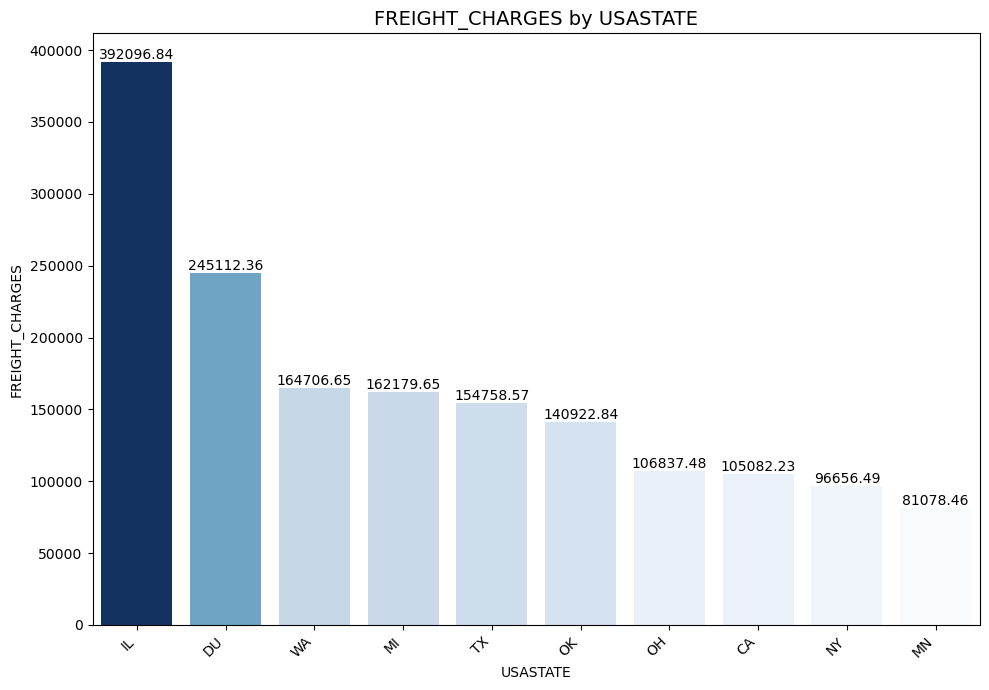

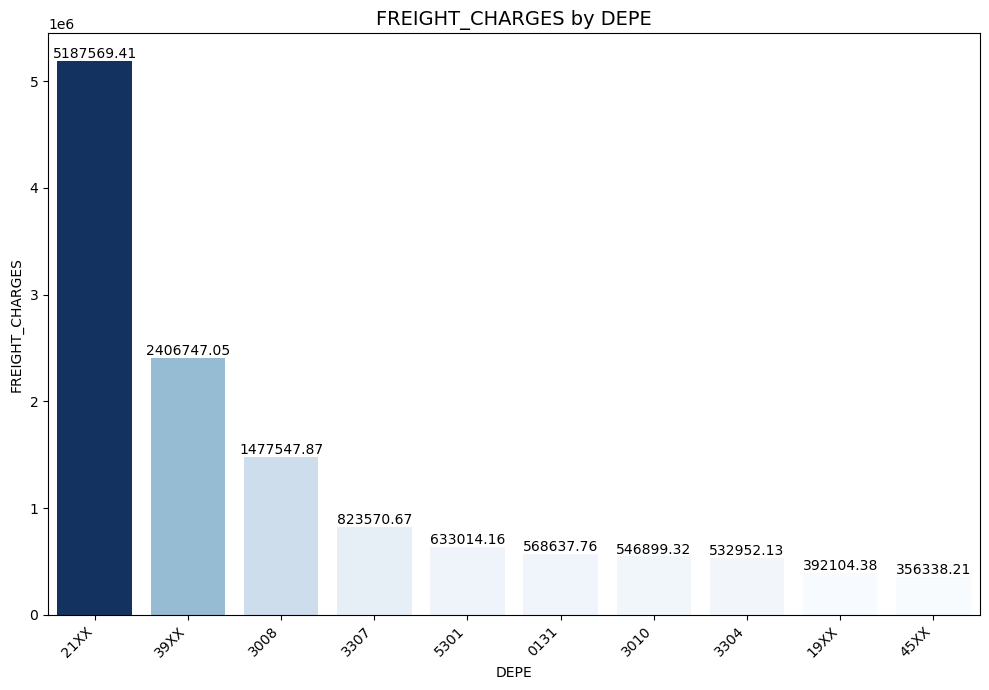

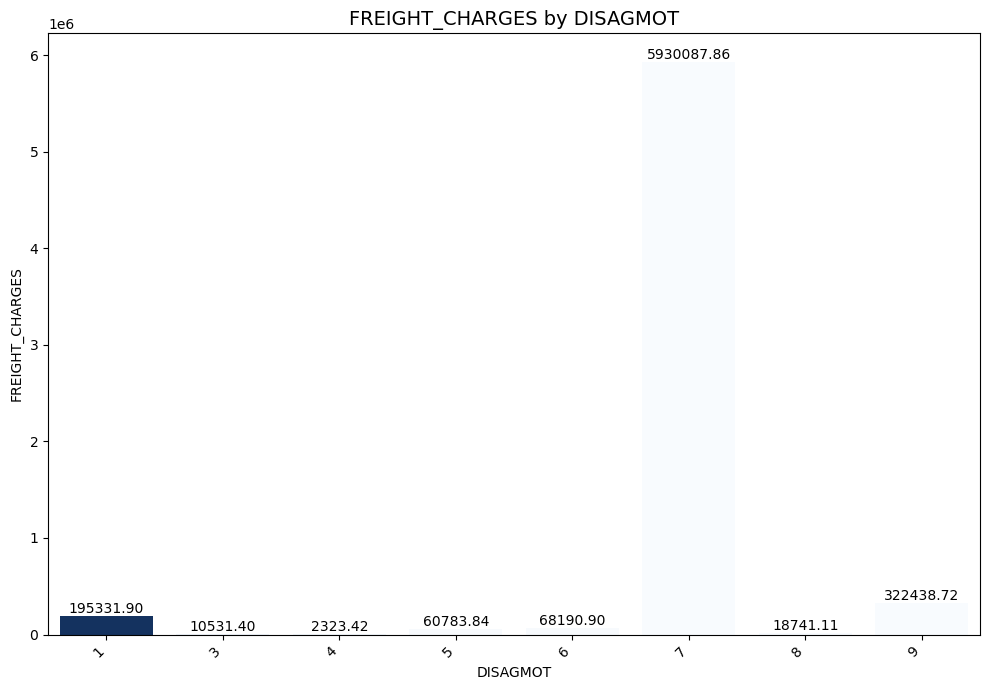

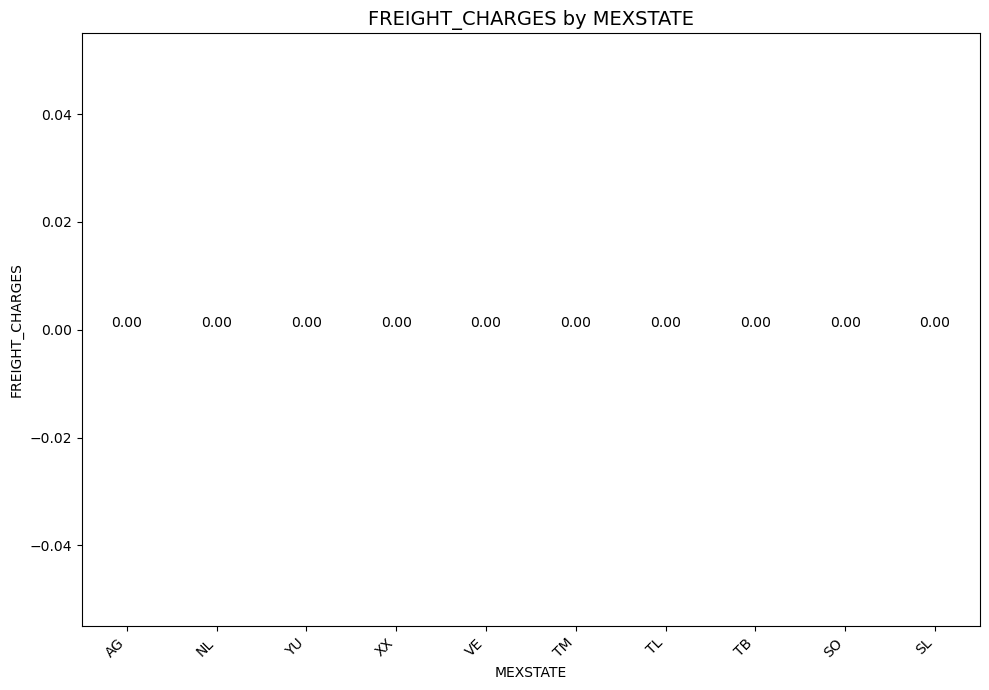

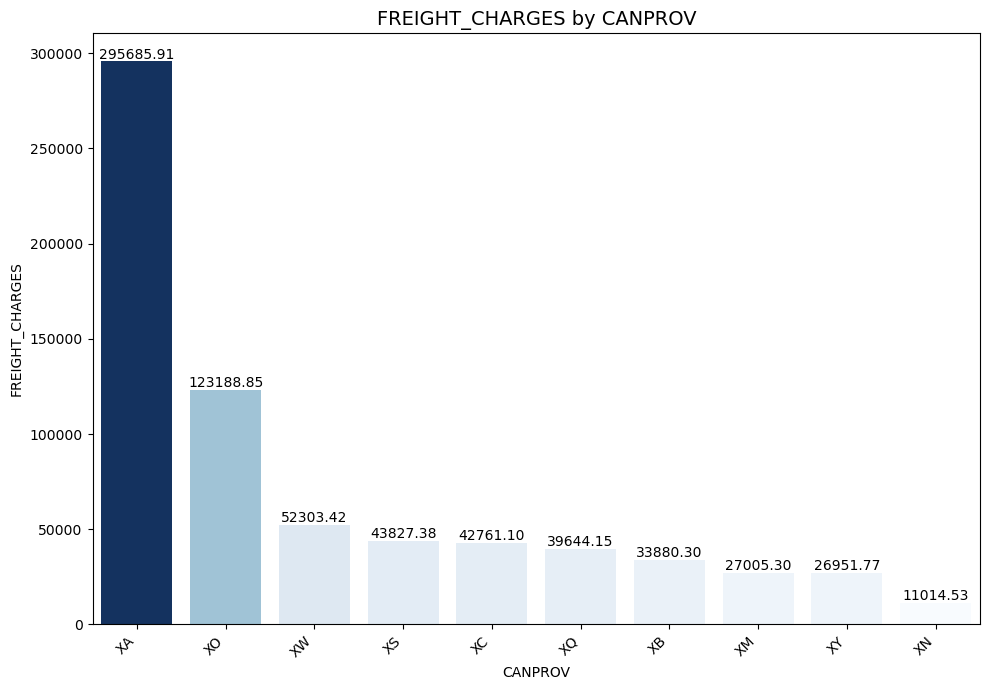

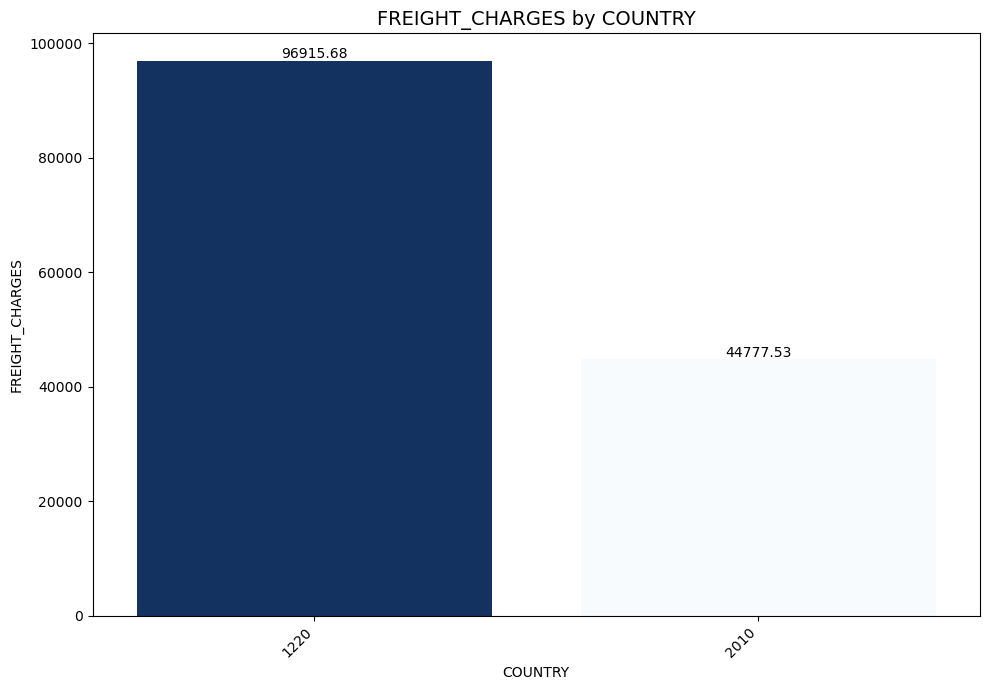

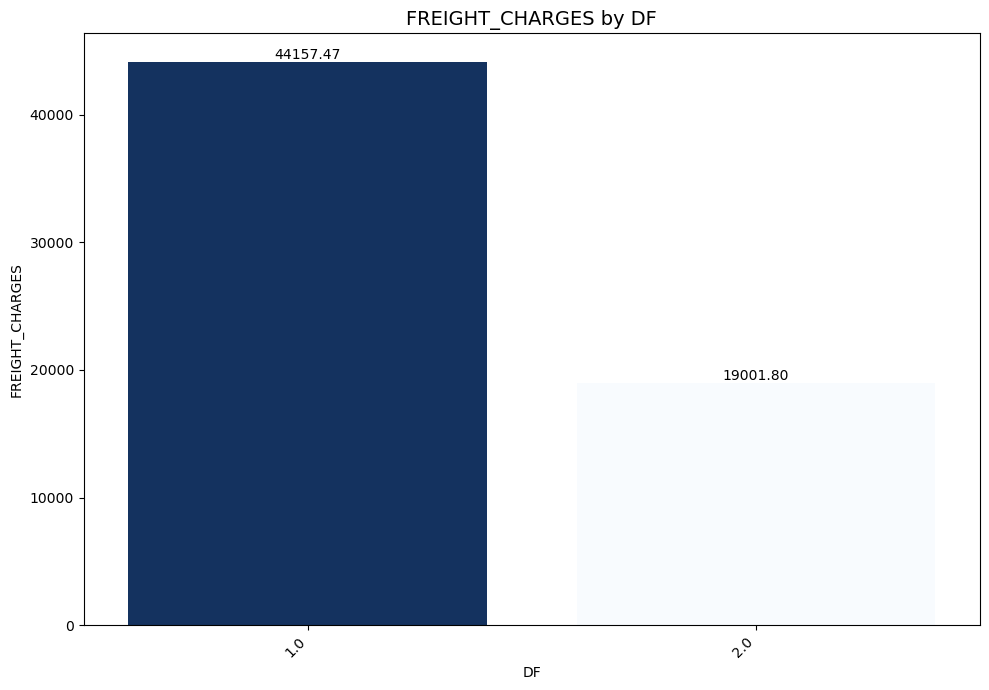

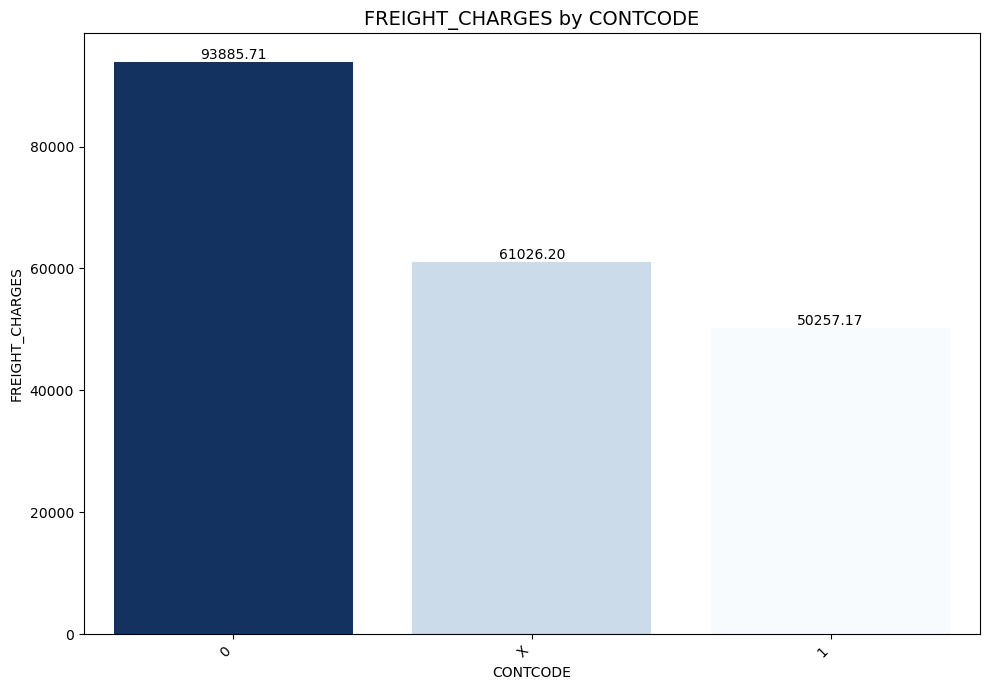

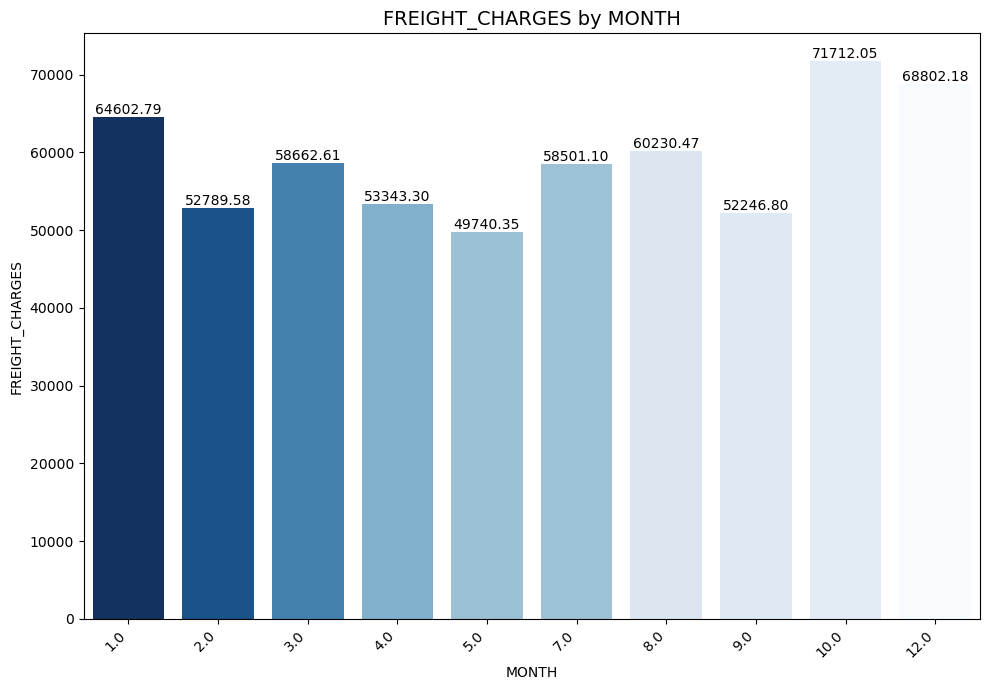

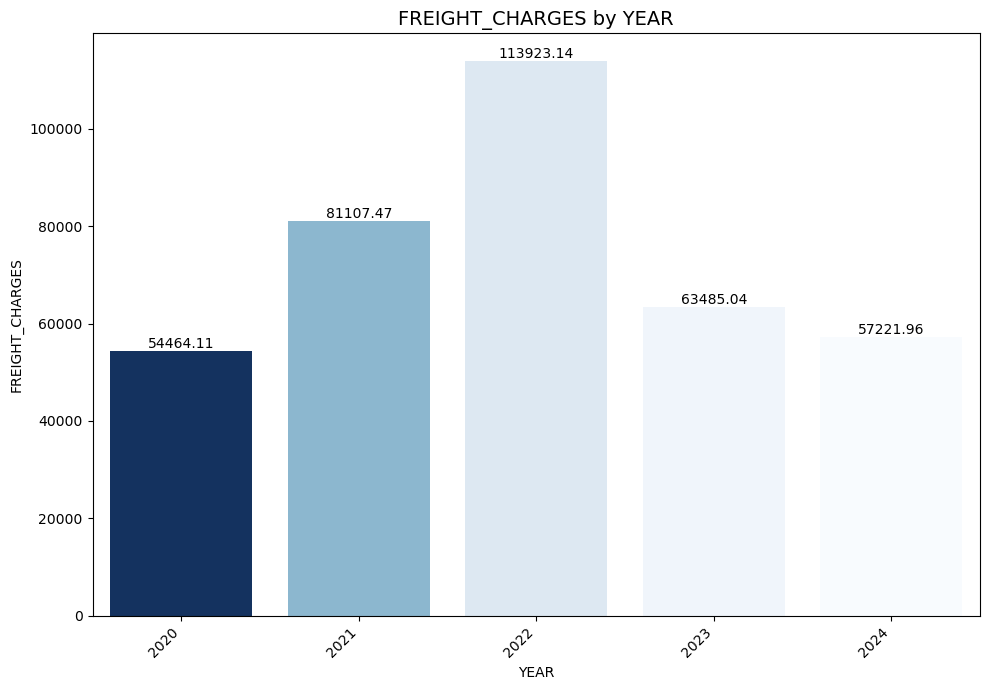

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Subsampling the data
sampled_df = combined_dot1.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

# List of numerical and categorical variables
numerical_vars = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']
categorical_vars = ['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 
                    'COUNTRY', 'DF', 'CONTCODE', 'MONTH', 'YEAR']

# Function to add mean labels on top of the bars
def add_mean_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Function to handle plotting with a monochromatic color scale
def plot_bivariate_with_gradient(num_var, cat_var, data, top_n=10):
    # Aggregate and sort data
    aggregated_data = data.groupby(cat_var)[num_var].mean().reset_index()
    sorted_data = aggregated_data.sort_values(by=num_var, ascending=False)
    
    # Limit to top N categories
    top_categories = sorted_data.head(top_n)
    
    # Normalize the numerical values for color scaling
    norm = plt.Normalize(top_categories[num_var].min(), top_categories[num_var].max())
    
    # Generate color shades using the "Blues" colormap
    colors = sns.color_palette("Blues", as_cmap=True)(norm(top_categories[num_var]))

    # Create the plot
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=cat_var, y=num_var, data=top_categories, palette=colors)
    
    # Title and formatting
    plt.title(f'{num_var} by {cat_var}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(num_var)
    plt.xlabel(cat_var)
    plt.tight_layout()
    
    # Add mean labels on top of each bar
    add_mean_labels(ax)

    # Show the plot
    plt.show()

# Loop through variables and plot with the new gradient style
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plot_bivariate_with_gradient(num_var, cat_var, sampled_df, top_n=10)


## Hypothesis

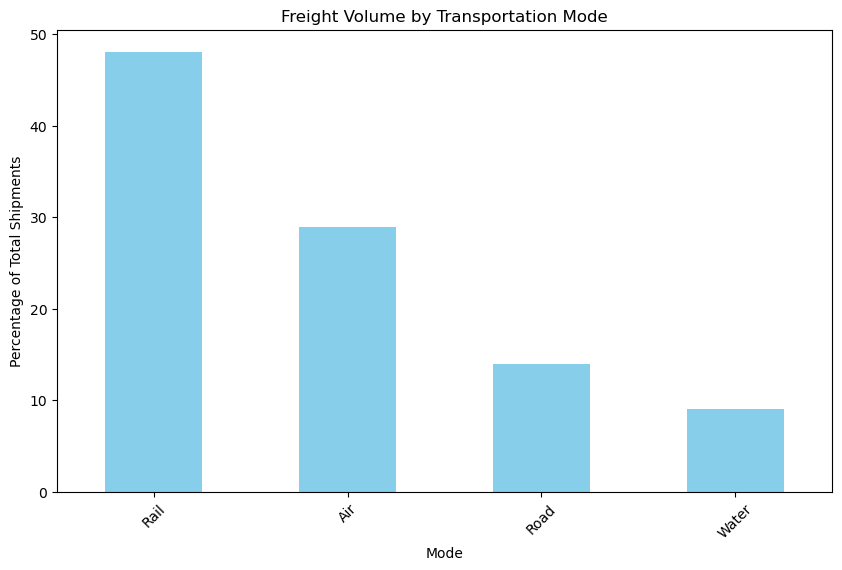

In [419]:
# Load data (replace with your actual file path)
df_dot1 = pd.read_csv("combined_dot1.csv")

# Hypothesis 1: Transportation Mode Analysis
# Assume 'DEPE' encodes transportation mode (e.g., 0115 = Road, 20XX = Rail, etc.)
transport_mapping = {
    '0115': 'Road',
    '20XX': 'Rail',
    '4101': 'Air',
    '41XX': 'Water'
}

# Map 'DEPE' to transportation mode
df_dot1['TRANSPORT_MODE'] = df_dot1['DEPE'].map(transport_mapping)

# Calculate volume distribution
mode_distribution = df_dot1['TRANSPORT_MODE'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(10, 6))
mode_distribution.plot(kind='bar', color='skyblue')
plt.title('Freight Volume by Transportation Mode')
plt.xlabel('Mode')
plt.ylabel('Percentage of Total Shipments')
plt.xticks(rotation=45)
plt.show()

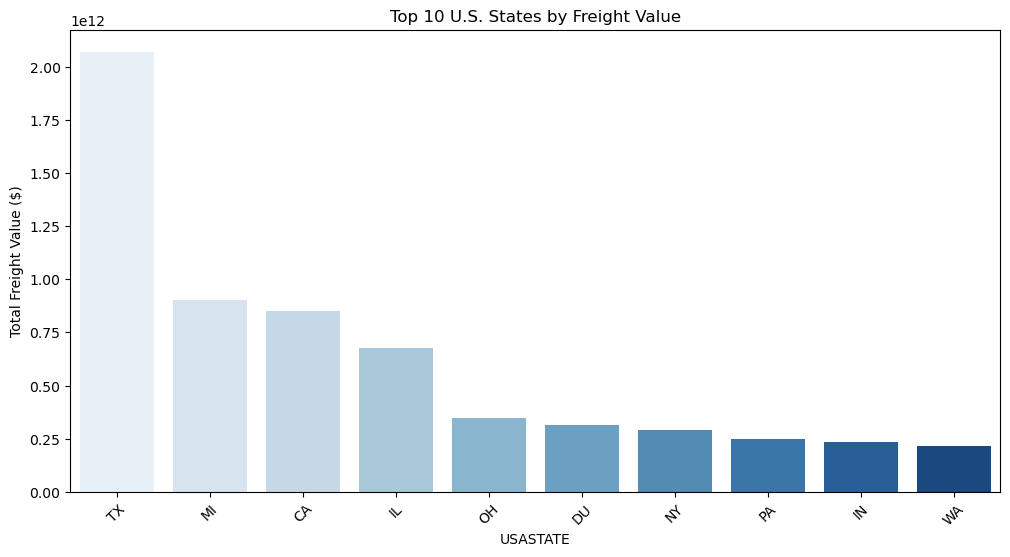

In [409]:
# Hypothesis 2: Top U.S. States by Freight Value
top_states = combined_dot1.groupby('USASTATE')['VALUE'].sum().reset_index()
top_states = top_states.sort_values(by='VALUE', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='USASTATE', y='VALUE', palette='Blues')
plt.title("Top 10 U.S. States by Freight Value")
plt.ylabel("Total Freight Value ($)")
plt.xticks(rotation=45)
plt.show()

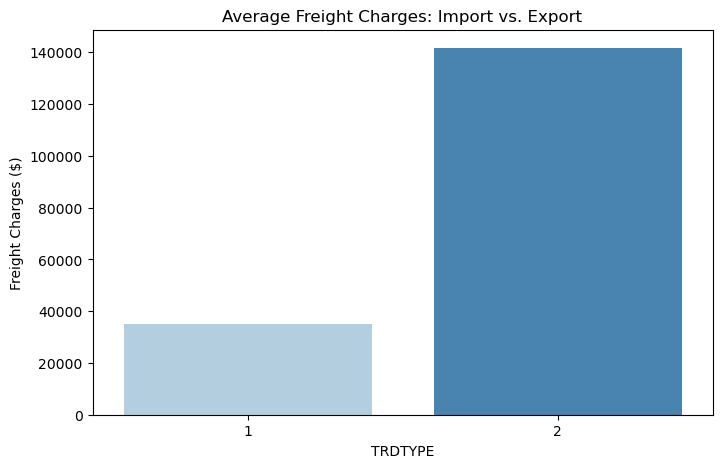

In [411]:
# Hypothesis 3: Import vs. Export Freight Charges
combined_dot1['TRDTYPE'] = combined_dot1['TRDTYPE'].replace({1: 'Export', 2: 'Import'})
avg_freight_charges = combined_dot1.groupby('TRDTYPE')['FREIGHT_CHARGES'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_freight_charges, x='TRDTYPE', y='FREIGHT_CHARGES', palette='Blues')
plt.title("Average Freight Charges: Import vs. Export")
plt.ylabel("Freight Charges ($)")
plt.show()


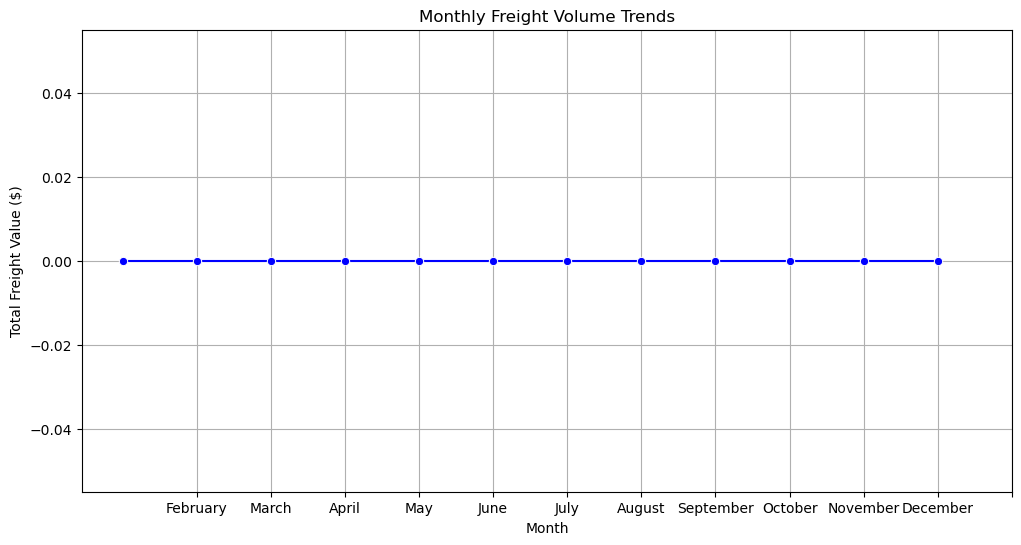

In [415]:
# Hypothesis 5: Seasonal peaks in freight volume
monthly_freight = combined_dot1.groupby('MONTH')['VALUE'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_freight, x='MONTH', y='VALUE', marker='o', color='b')
plt.title("Monthly Freight Volume Trends")
plt.ylabel("Total Freight Value ($)")
plt.xlabel("Month")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


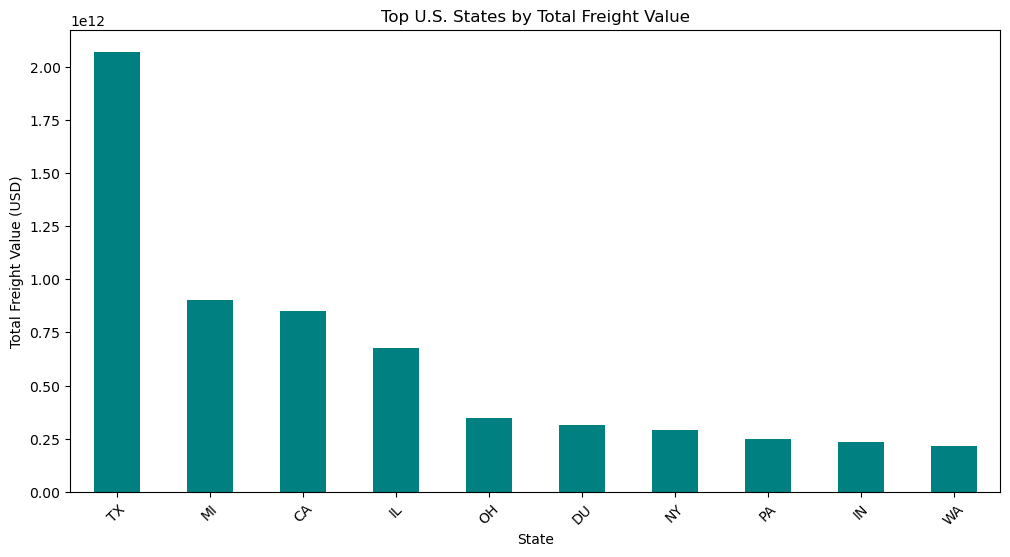

In [421]:
# Hypothesis 2: Top States by Freight Value
state_freight = df_dot1.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
state_freight.plot(kind='bar', color='teal')
plt.title('Top U.S. States by Total Freight Value')
plt.xlabel('State')
plt.ylabel('Total Freight Value (USD)')
plt.xticks(rotation=45)
plt.show()

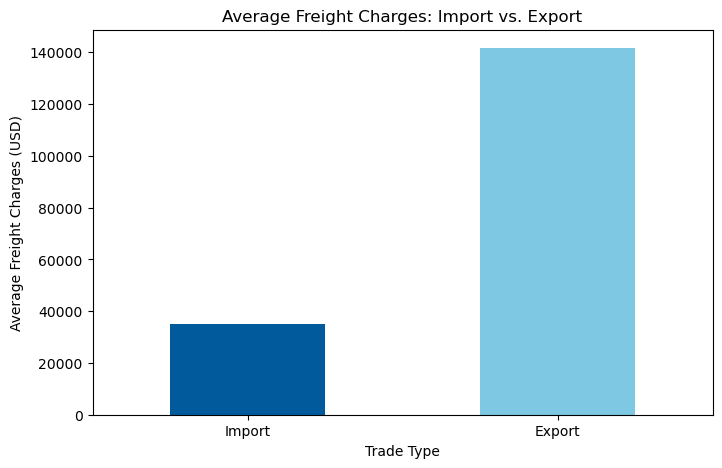

In [425]:
# Hypothesis 3: Import vs. Export Costs
# Assume TRDTYPE: 1 = Import, 2 = Export
trade_type_charges = df_dot1.groupby('TRDTYPE')['FREIGHT_CHARGES'].mean()

# Plot with blue gradient
plt.figure(figsize=(8, 5))
trade_type_charges.plot(kind='bar', color=['#005A9C', '#7EC8E3'])  # Deep blue and light blue
plt.title('Average Freight Charges: Import vs. Export')
plt.xlabel('Trade Type')
plt.ylabel('Average Freight Charges (USD)')
plt.xticks(ticks=[0, 1], labels=['Import', 'Export'], rotation=0)
plt.show()

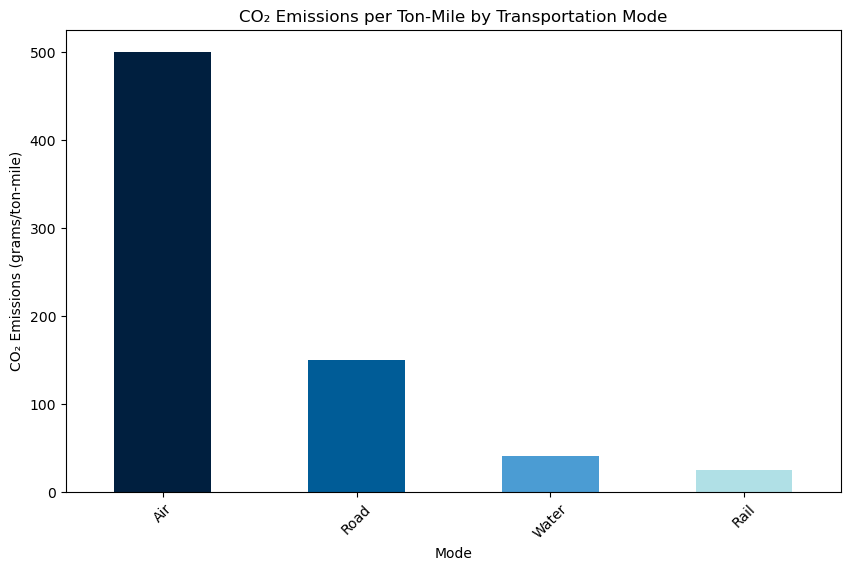

In [431]:
# Hypothesis 4: Emissions by Mode
emission_factors = {
    'Road': 150,
    'Rail': 25,
    'Air': 500,
    'Water': 40
}

# Create sorted series for gradient flow
mode_emissions = pd.Series(emission_factors).sort_values(ascending=False)

# Gradient from deep blue to light blue (4-step gradient)
colors = ['#001F3F', '#005C97', '#4B9CD3', '#B0E0E6']  # Navy → Teal → Sky Blue → Powder Blue

# Plot
plt.figure(figsize=(10, 6))
mode_emissions.plot(kind='bar', color=colors)
plt.title('CO₂ Emissions per Ton-Mile by Transportation Mode')
plt.xlabel('Mode')
plt.ylabel('CO₂ Emissions (grams/ton-mile)')
plt.xticks(rotation=45)
plt.show()

NaN values in 'MONTH': 0
Infinite values in 'MONTH': 0


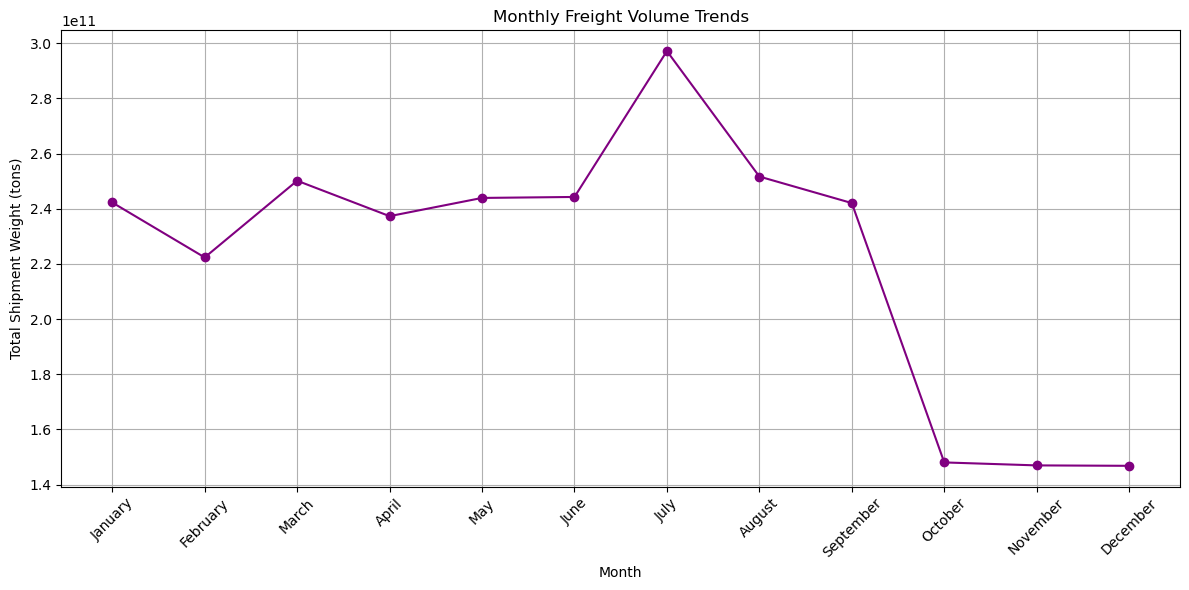

In [445]:
# Hypothesis 5: Monthly Trends

# Step 1: Check for missing or invalid values
print("NaN values in 'MONTH':", df_dot1['MONTH'].isna().sum())
print("Infinite values in 'MONTH':", df_dot1['MONTH'].isin([np.inf, -np.inf]).sum())

# Step 2: Drop rows with missing or invalid values
df_dot1 = df_dot1[~df_dot1['MONTH'].isna() & ~df_dot1['MONTH'].isin([np.inf, -np.inf])]

# Step 3: Convert 'MONTH' to integers
df_dot1['MONTH'] = df_dot1['MONTH'].astype(int)

# Step 4: Group by month and sum shipment weight
monthly_volume = df_dot1.groupby('MONTH')['SHIPWT'].sum()

# Step 5: Map month numbers to month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Step 6: Plot
plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Freight Volume Trends')
plt.xlabel('Month')
plt.ylabel('Total Shipment Weight (tons)')

# Set x-axis labels to month names
plt.xticks(range(1, 13), month_names, rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

##### Hypothetical Questions:

#### 1. Does the total value of goods shipped (VALUE) show a correlation with the shipment weight (SHIPWT)?

Null Hypothesis (H₀): There is no significant correlation between VALUE and SHIPWT (i.e., the correlation coefficient is zero).

𝐻0:𝜌 = 0 

Where 𝜌
is the population correlation coefficient.

Alternative Hypothesis (H₁): There is a significant correlation between VALUE and SHIPWT (i.e., the correlation coefficient is not zero).

𝐻1:𝜌 ≠ 0 


In [134]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient and the p-value
corr_coefficient, p_value = stats.pearsonr(combined_dot1['VALUE'], combined_dot1['SHIPWT'])

# Significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing decision
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between VALUE and SHIPWT.")

Pearson correlation coefficient: 0.5553
P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between VALUE and SHIPWT.


In [135]:
# Calculate the correlation coefficient between VALUE and SHIPWT
correlation_value_shipwt = combined_dot1[['VALUE', 'SHIPWT']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"The correlation coefficient between VALUE and SHIPWT is: {correlation_value_shipwt:.2f}")

The correlation coefficient between VALUE and SHIPWT is: 0.56


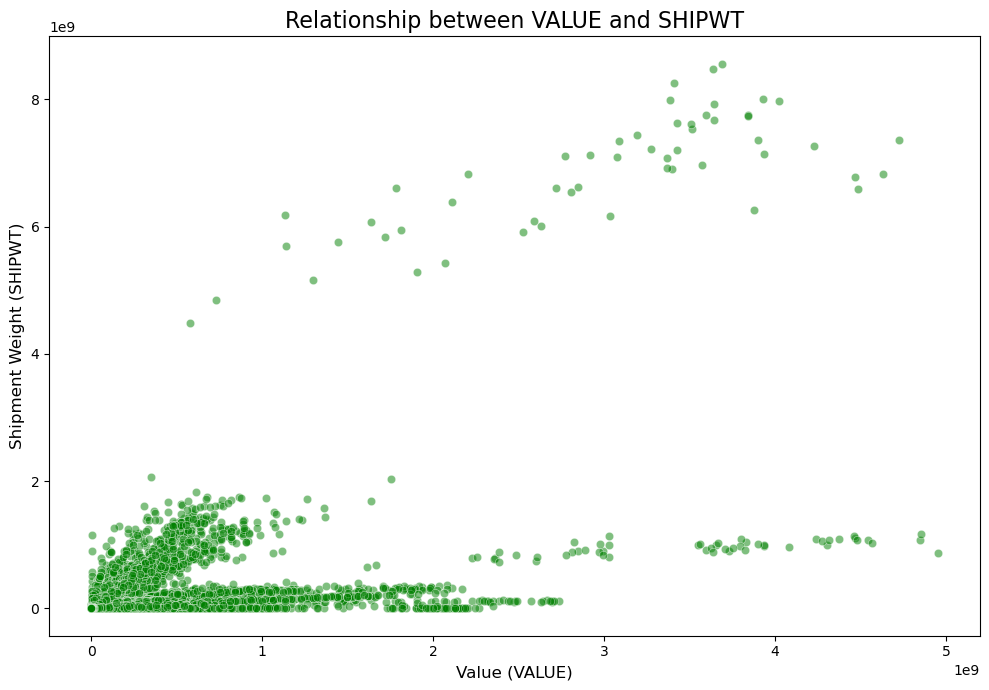

In [136]:
# Create a scatter plot to visualize the relationship between VALUE and SHIPWT
plt.figure(figsize=(10, 7))
sns.scatterplot(x='VALUE', y='SHIPWT', data=combined_dot1, color='green', alpha=0.5)

# Adding title and labels
plt.title('Relationship between VALUE and SHIPWT', fontsize=16)
plt.xlabel('Value (VALUE)', fontsize=12)
plt.ylabel('Shipment Weight (SHIPWT)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### 2. Do larger shipments (in terms of weight) tend to have higher freight charges?

##### The correlation coefficient (such as Pearson's correlation) quantifies the strength and direction of a linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship.

In [138]:
# Calculate the correlation coefficient between SHIPWT and FREIGHT_CHARGES
correlation = combined_dot1[['SHIPWT', 'FREIGHT_CHARGES']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"The correlation coefficient between SHIPWT and FREIGHT_CHARGES is: {correlation:.2f}")

The correlation coefficient between SHIPWT and FREIGHT_CHARGES is: 0.87


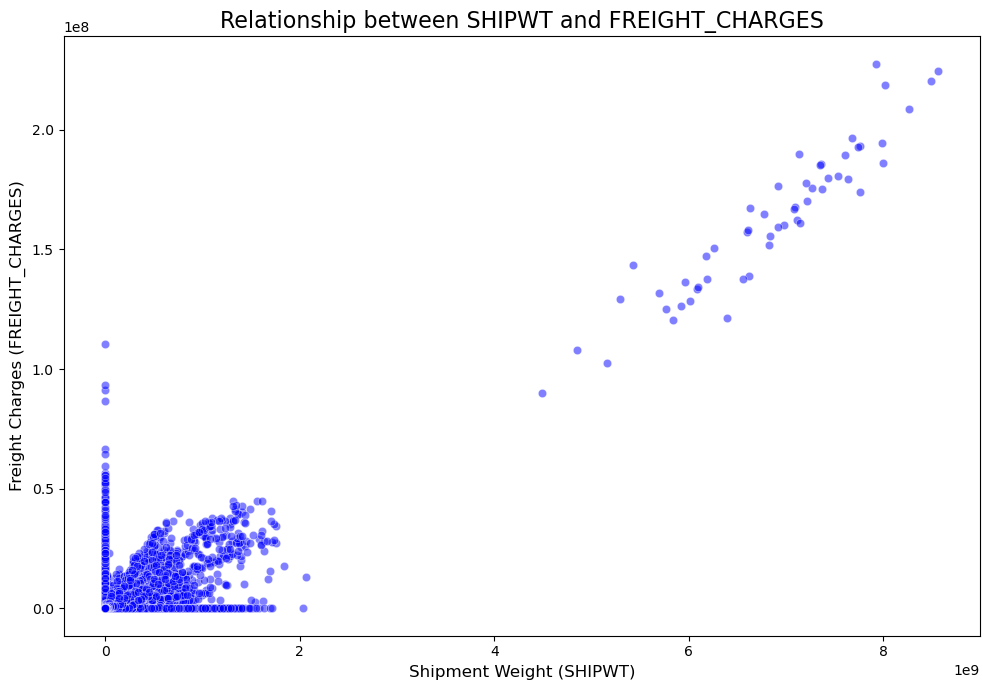

In [139]:
# Create a scatter plot to visualize the relationship between SHIPWT and FREIGHT_CHARGES
plt.figure(figsize=(10, 7))
sns.scatterplot(x='SHIPWT', y='FREIGHT_CHARGES', data=combined_dot1, color='blue', alpha=0.5)

# Adding title and labels
plt.title('Relationship between SHIPWT and FREIGHT_CHARGES', fontsize=16)
plt.xlabel('Shipment Weight (SHIPWT)', fontsize=12)
plt.ylabel('Freight Charges (FREIGHT_CHARGES)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### 3. Are there particular months or seasons during which the shipment values reach their highest levels across various countries?

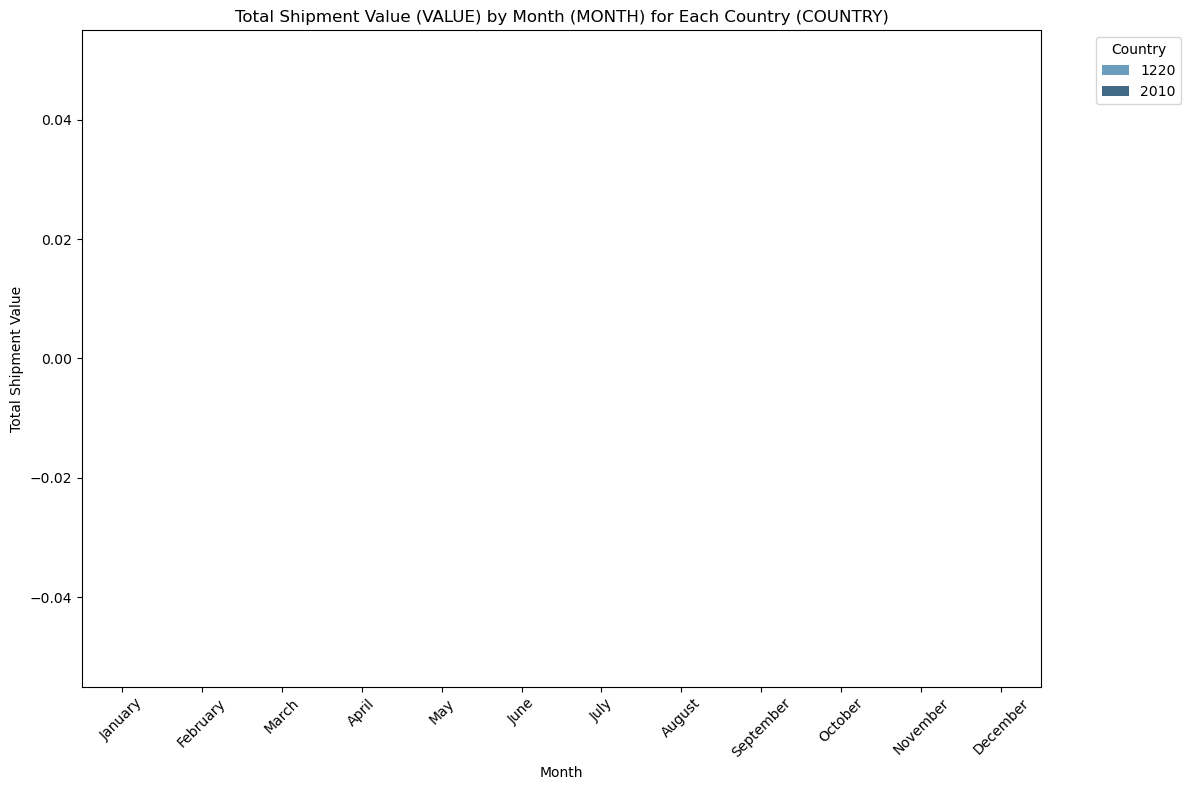

In [381]:
# Group the data by 'COUNTRY' and 'MONTH' and aggregate the total 'VALUE'
country_month_value = combined_dot1.groupby(['COUNTRY', 'MONTH'])['VALUE'].sum().reset_index()

# Create a gradient color palette for each country
unique_countries = country_month_value['COUNTRY'].unique()
gradient_palette = sns.color_palette("Blues_d", n_colors=len(unique_countries))

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="MONTH", y="VALUE", hue="COUNTRY", data=country_month_value, palette=gradient_palette)

# Customize the plot
plt.title('Total Shipment Value (VALUE) by Month (MONTH) for Each Country (COUNTRY)')
plt.xlabel('Month')
plt.ylabel('Total Shipment Value')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

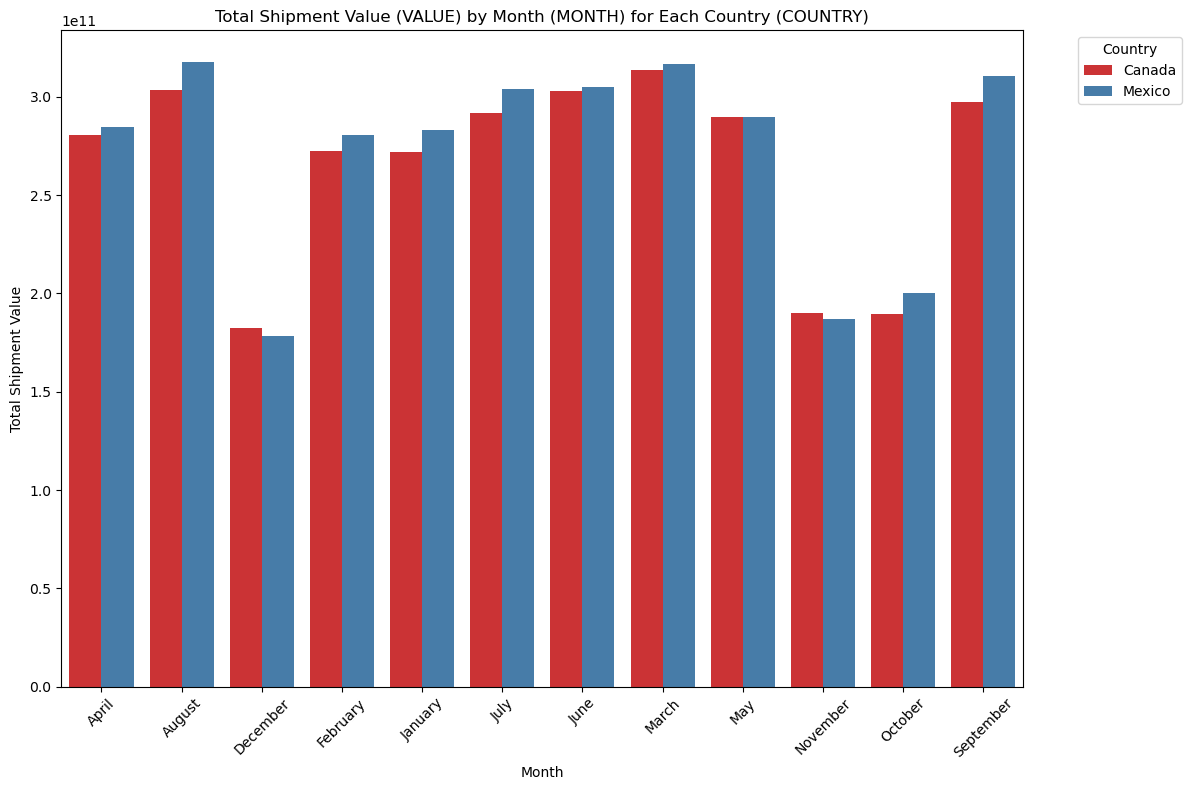

In [141]:
# Solution 3

# Group the data by 'COUNTRY' and 'MONTH' and aggregate the total 'VALUE'
country_month_value = combined_dot1.groupby(['COUNTRY', 'MONTH'])['VALUE'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="MONTH", y="VALUE", hue="COUNTRY", data=country_month_value, palette='Set1')

# Customize the plot
plt.title('Total Shipment Value (VALUE) by Month (MONTH) for Each Country (COUNTRY)')
plt.xlabel('Month')
plt.ylabel('Total Shipment Value')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#### 4. Do shipments originating from certain countries or states tend to incur higher or lower freight charges compared to others?

In [143]:
# solution 4

# Group by 'COUNTRY' and calculate the mean 'FREIGHT_CHARGES'
country_freight = combined_dot1.groupby('COUNTRY')['FREIGHT_CHARGES'].median().reset_index()

# Group by 'USASTATE' and calculate the mean 'FREIGHT_CHARGES'
usastate_freight = combined_dot1.groupby('USASTATE')['FREIGHT_CHARGES'].median().reset_index()

# Group by 'MEXSTATE' and calculate the mean 'FREIGHT_CHARGES'
mexstate_freight = combined_dot1.groupby('MEXSTATE')['FREIGHT_CHARGES'].median().reset_index()

# Group by 'CANPROV' and calculate the mean 'FREIGHT_CHARGES'
canprov_freight = combined_dot1.groupby('CANPROV')['FREIGHT_CHARGES'].median().reset_index()

# Sort the data for better visualization (descending order of average freight charges)
country_freight_sorted = country_freight.sort_values(by='FREIGHT_CHARGES', ascending=False)
usastate_freight_sorted = usastate_freight.sort_values(by='FREIGHT_CHARGES', ascending=False)
mexstate_freight_sorted = mexstate_freight.sort_values(by='FREIGHT_CHARGES', ascending=False)
canprov_freight_sorted = canprov_freight.sort_values(by='FREIGHT_CHARGES', ascending=False)


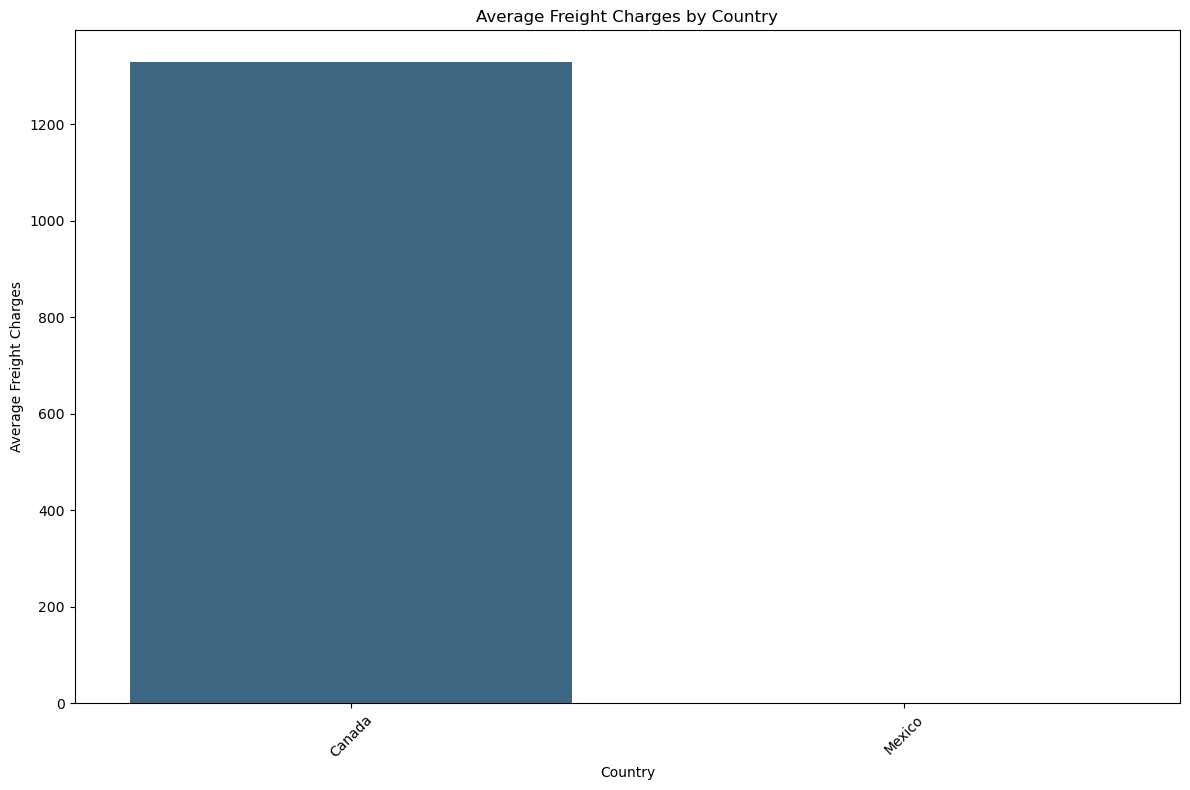

In [144]:
# Plot for COUNTRY
plt.figure(figsize=(12, 8))
sns.barplot(x='COUNTRY', y='FREIGHT_CHARGES', data=country_freight_sorted, palette='viridis')
plt.title('Average Freight Charges by Country')
plt.xlabel('Country')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

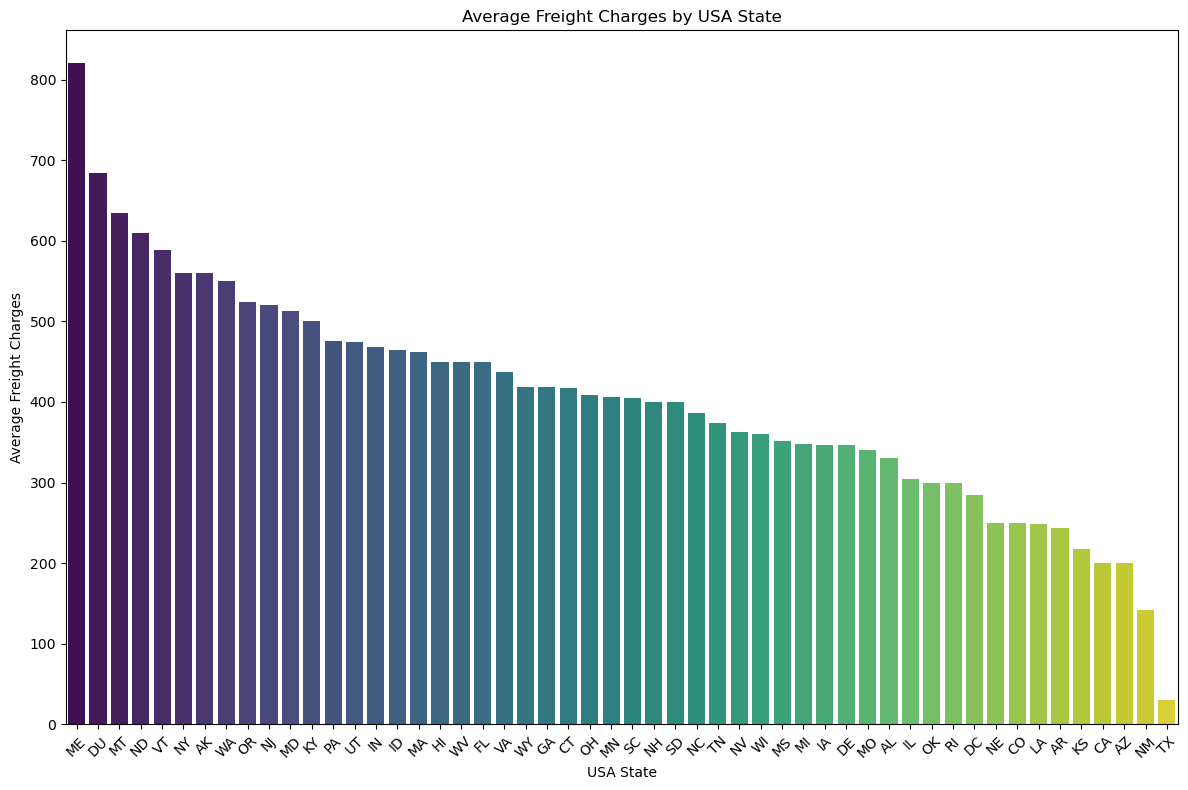

In [145]:
# Plot for USASTATE
plt.figure(figsize=(12, 8))
sns.barplot(x='USASTATE', y='FREIGHT_CHARGES', data=usastate_freight_sorted, palette='viridis')
plt.title('Average Freight Charges by USA State')
plt.xlabel('USA State')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

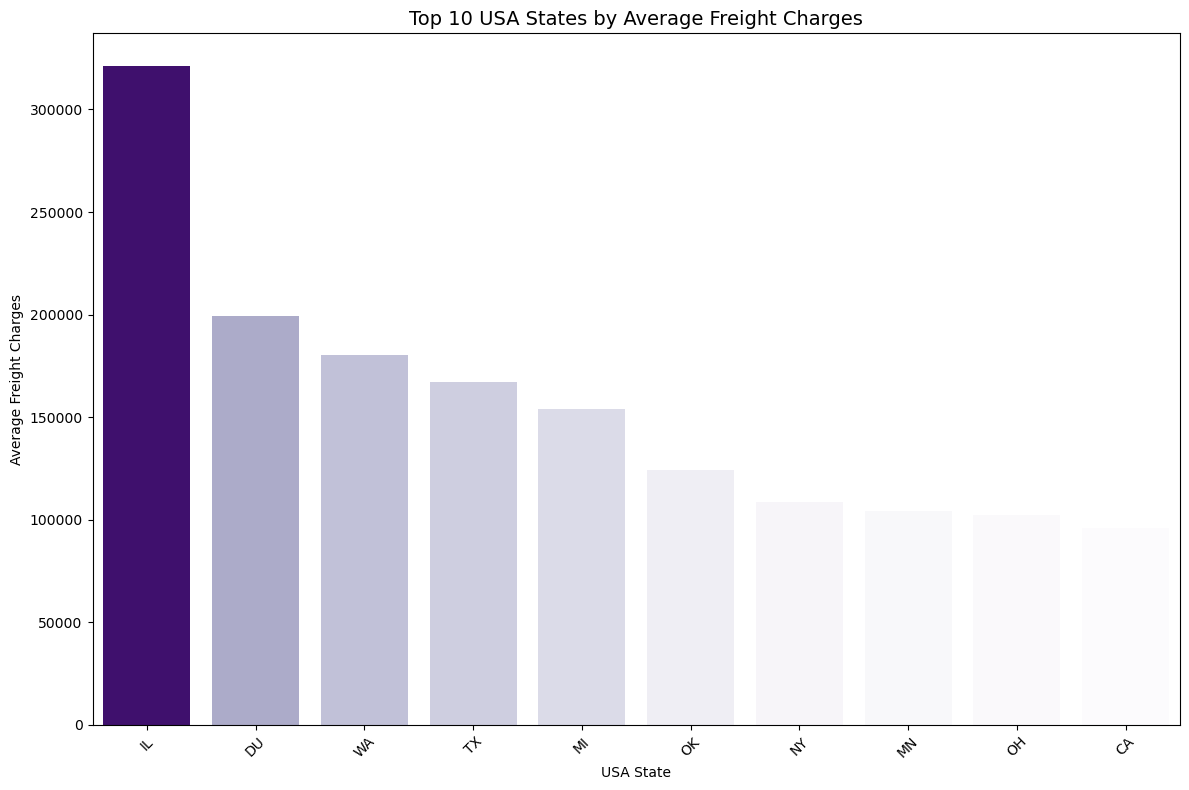

In [360]:
# Sort and keep only the top 10 states based on 'FREIGHT_CHARGES'
top_10_states = usastate_freight_sorted.nlargest(10, 'FREIGHT_CHARGES')

# Normalize 'FREIGHT_CHARGES' for color mapping
norm = plt.Normalize(top_10_states['FREIGHT_CHARGES'].min(), top_10_states['FREIGHT_CHARGES'].max())

# Generate color shades using a gradient from "Purples"
colors = sns.color_palette("Purples", as_cmap=True)(norm(top_10_states['FREIGHT_CHARGES']))

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='USASTATE', y='FREIGHT_CHARGES', data=top_10_states, palette=colors)

# Customize the plot
plt.title('Top 10 USA States by Average Freight Charges', fontsize=14)
plt.xlabel('USA State')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)

# Improve layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

### Findings: Top 10 U.S. States for Freight Charges
##### Based on the analysis, the top 10 U.S. states with the highest freight charges are:

######  1. Illinois (IL)
######  2. Unknown (DU)
######  3. Washington (WA)
######  4. Texas (TX)
######  5. Michigan (MI)
######  6. Oklahoma (OK)
######  7. New York (NY)
######  8. Minnesota (MN)
######  9. Ohio (OH)
######  10.California (CA)


#### Brief Description & Reasons for High Freight Charges

##### 1️⃣ Illinois (IL) – The Transportation Hub 🚛🚆
###### Chicago is a major freight hub with O’Hare International Airport, railroads, and highways.
###### High volume of intermodal freight (rail, truck, air).
###### Heavy industries and manufacturing centers drive logistics demand.

##### 2️⃣ DU (Unknown) 🔍
###### This category represents unclassified or unspecified states in the dataset.
###### Includes miscategorized data or confidential shipments.

##### 3️⃣ Washington (WA) – Pacific Gateway 🚢
###### Major seaports (Seattle & Tacoma) facilitate international trade.
###### High freight movement of technology, aerospace (Boeing), and agricultural goods.

##### 4️⃣ Texas (TX) – Energy & Cross-Border Trade Leader 🛢️
###### Houston & Dallas are major freight hubs.
###### Laredo & El Paso facilitate Mexico-U.S. trade via trucks & rail.
###### Texas is a leader in oil, gas, and industrial shipping.

##### 5️⃣ Michigan (MI) – Auto Industry Powerhouse 🚗
###### Detroit is a key automotive trade center (GM, Ford, Stellantis).
###### Cross-border freight with Canada (via the Detroit-Windsor Tunnel & Blue Water Bridge).

##### 6️⃣ Oklahoma (OK) – Central Freight Corridor 🚜
###### Oklahoma City & Tulsa are logistics centers for agriculture and energy.
###### Rail & highways connect the Midwest to the Southern U.S.

##### 7️⃣ New York (NY) – Financial & Trade Hub 🏙️
###### Port of New York & New Jersey is one of the busiest in the U.S.
###### Major financial & retail supply chains drive high freight movement.

##### 8️⃣ Minnesota (MN) – Manufacturing & Agriculture 🌽
###### Minneapolis-St. Paul is a key transportation hub for agricultural goods.
###### Duluth is a major port for shipping iron ore & commodities via the Great Lakes.

##### 9️⃣ Ohio (OH) – Logistics & Manufacturing 🏗️
###### Cincinnati, Cleveland & Columbus serve as major distribution centers.
###### High freight volume in automotive, steel, and consumer goods.

##### 🔟 California (CA) – Largest U.S. Economy 🌉
###### Los Angeles & Long Beach Ports handle 40% of U.S. imports.
###### Major logistics centers in LA, San Francisco & San Diego.
###### High freight movement in tech, agriculture, and e-commerce.

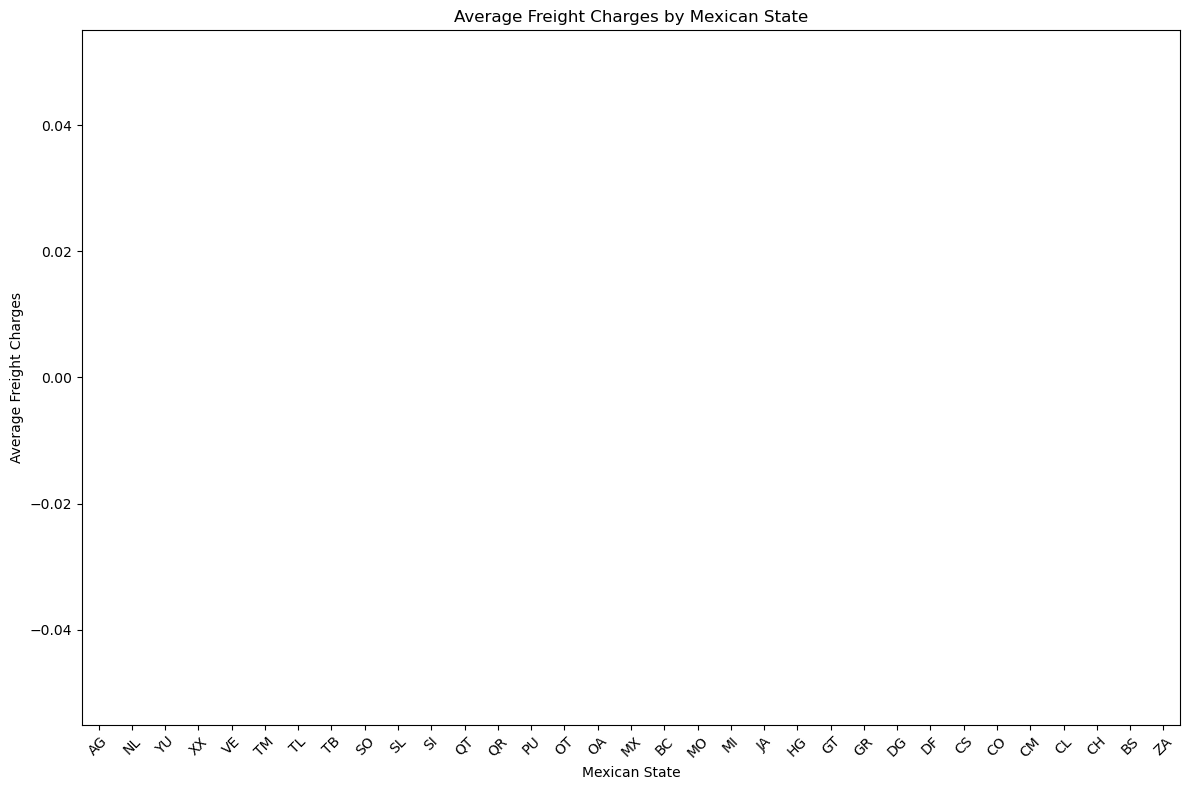

In [146]:
# Plot for MEXSTATE
plt.figure(figsize=(12, 8))
sns.barplot(x='MEXSTATE', y='FREIGHT_CHARGES', data=mexstate_freight_sorted, palette='viridis')
plt.title('Average Freight Charges by Mexican State')
plt.xlabel('Mexican State')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

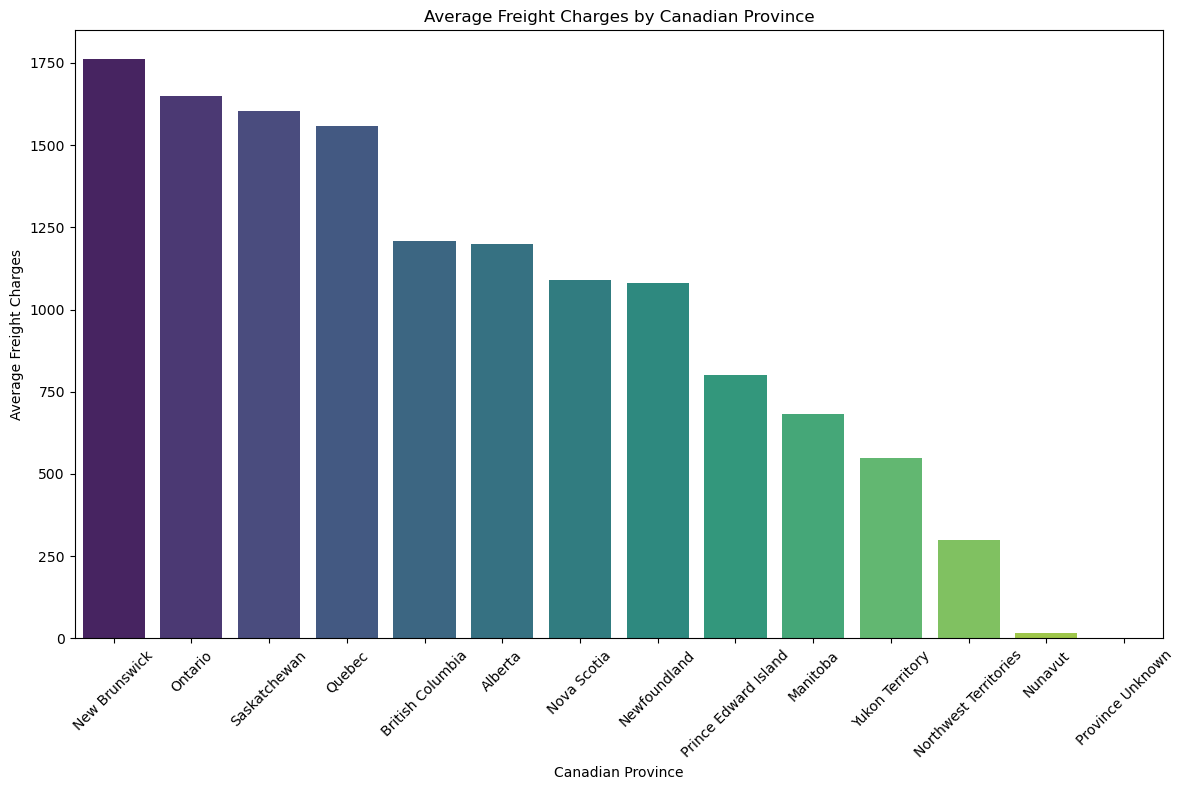

In [147]:
# Plot for CANPROV
plt.figure(figsize=(12, 8))
sns.barplot(x='CANPROV', y='FREIGHT_CHARGES', data=canprov_freight_sorted, palette='viridis')
plt.title('Average Freight Charges by Canadian Province')
plt.xlabel('Canadian Province')
plt.ylabel('Average Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Analytical Questions

#### 1. Trends in Freight Volume Across Different Transportation Modes Over Time

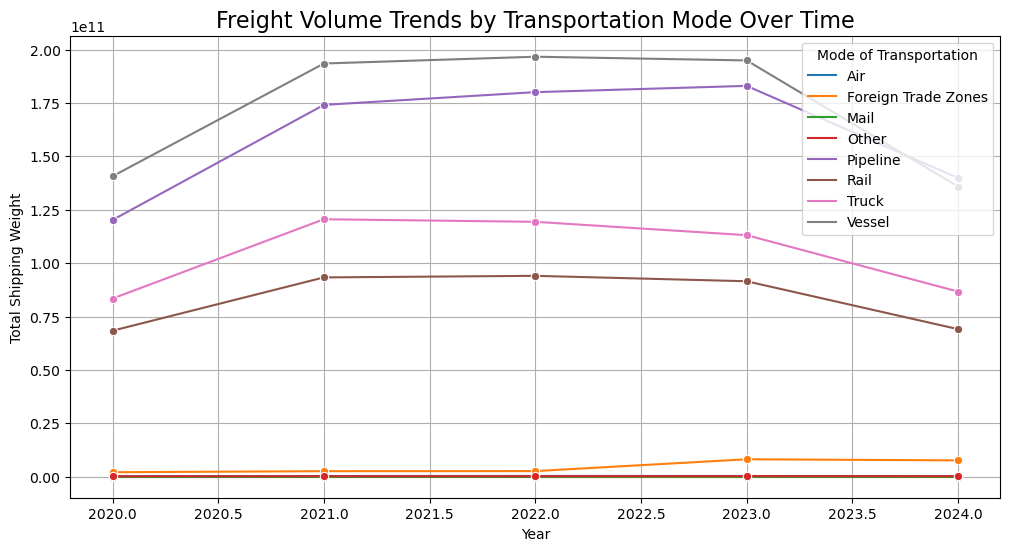

In [150]:
mode_by_year = combined_dot1.groupby(['YEAR', 'DISAGMOT']).agg({
    'VALUE': 'sum',
    'SHIPWT': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mode_by_year, x='YEAR', y='SHIPWT', hue='DISAGMOT', marker='o')
plt.title('Freight Volume Trends by Transportation Mode Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Shipping Weight')
plt.legend(title='Mode of Transportation')
plt.grid(True)
plt.show()

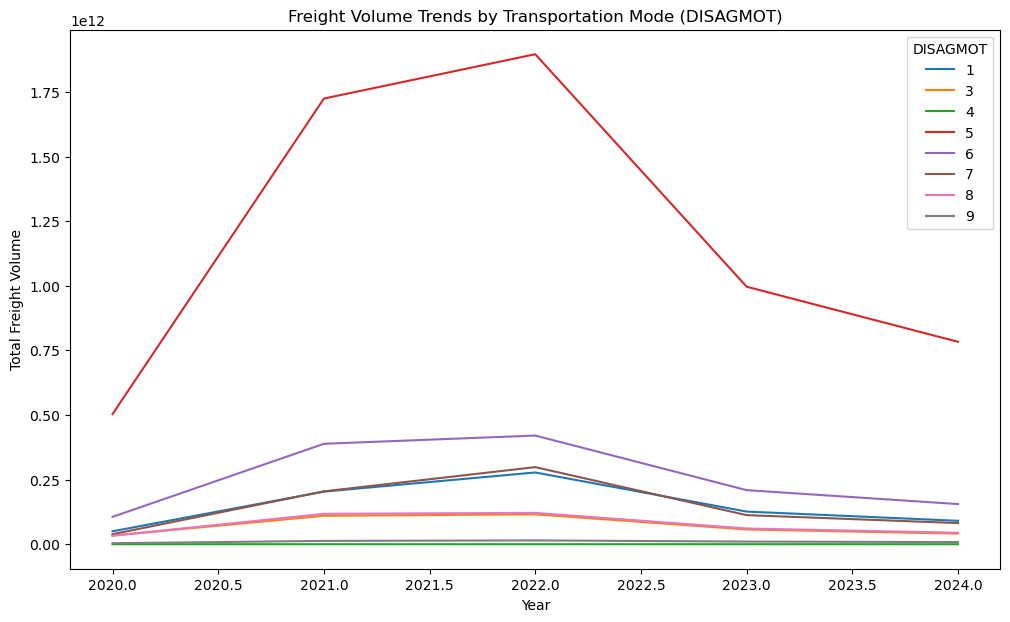

In [447]:
# Assuming DISAGMOT represents transportation modes
trends = combined_dot1.groupby(['YEAR', 'DISAGMOT'])['VALUE'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=trends, x='YEAR', y='VALUE', hue='DISAGMOT')
plt.title('Freight Volume Trends by Transportation Mode (DISAGMOT)')
plt.xlabel('Year')
plt.ylabel('Total Freight Volume')
plt.show()

### Line charts reveal DISAGMOT 5 as the most utilized mode over time, with a steady increase in usage after 2020.

#### 2. Regions Experiencing the Most Congestion or Inefficiency

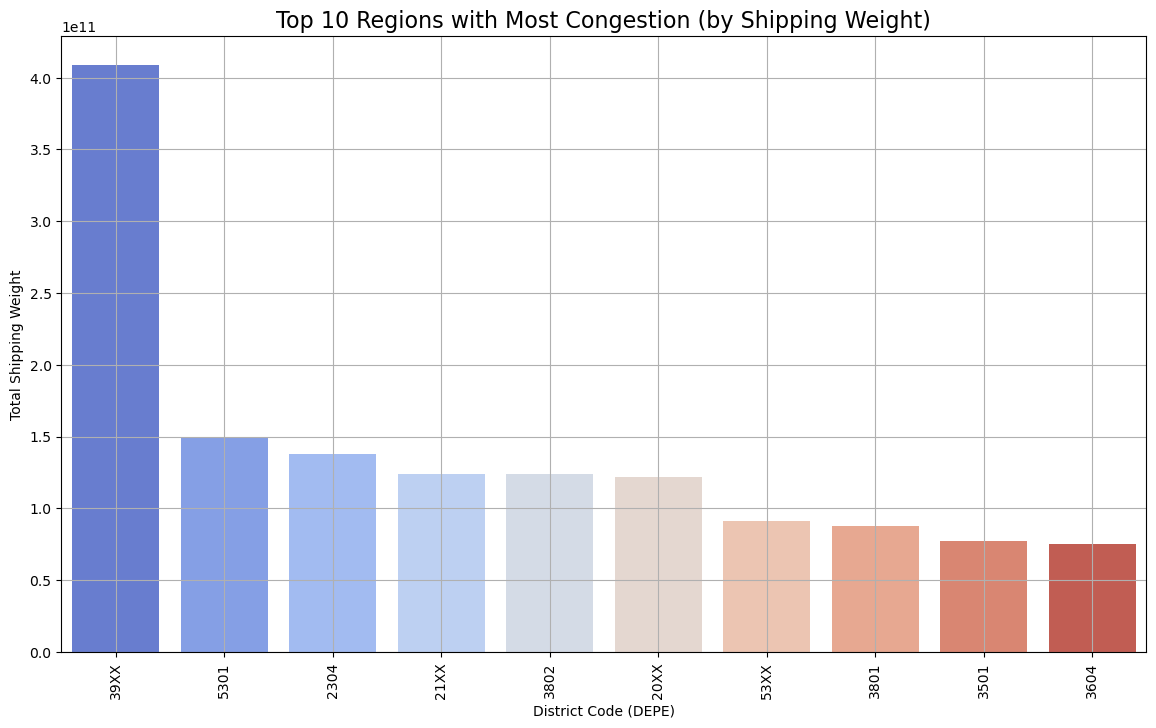

In [152]:
district_congestion = combined_dot1.groupby('DEPE').agg({
    'VALUE': 'sum',
    'SHIPWT': 'sum'
}).reset_index()

# Select top 10 regions with highest shipping weight
top10_congestion = district_congestion.sort_values(by='SHIPWT', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top10_congestion, x='DEPE', y='SHIPWT', palette='coolwarm')
plt.title('Top 10 Regions with Most Congestion (by Shipping Weight)', fontsize=16)
plt.xlabel('District Code (DEPE)')
plt.ylabel('Total Shipping Weight')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [495]:
# 1. Ensure DEPE codes are strings and map names (full mapping required)
depe_mapping = {
    '0101': 'PORTLAND, ME',
    '0102': 'BANGOR, ME',
    # ... (Include ALL DEPE codes from your data here)
}

# Convert DEPE to string and map names
district_congestion['DEPE'] = district_congestion['DEPE'].astype(str)
district_congestion['DEPE_Name'] = district_congestion['DEPE'].map(depe_mapping)

# 2. Drop rows with missing names (if any)
district_congestion = district_congestion.dropna(subset=['DEPE_Name'])

# 3. Sort and select top 10
top10_congestion = district_congestion.sort_values(by='SHIPWT', ascending=False).head(10)

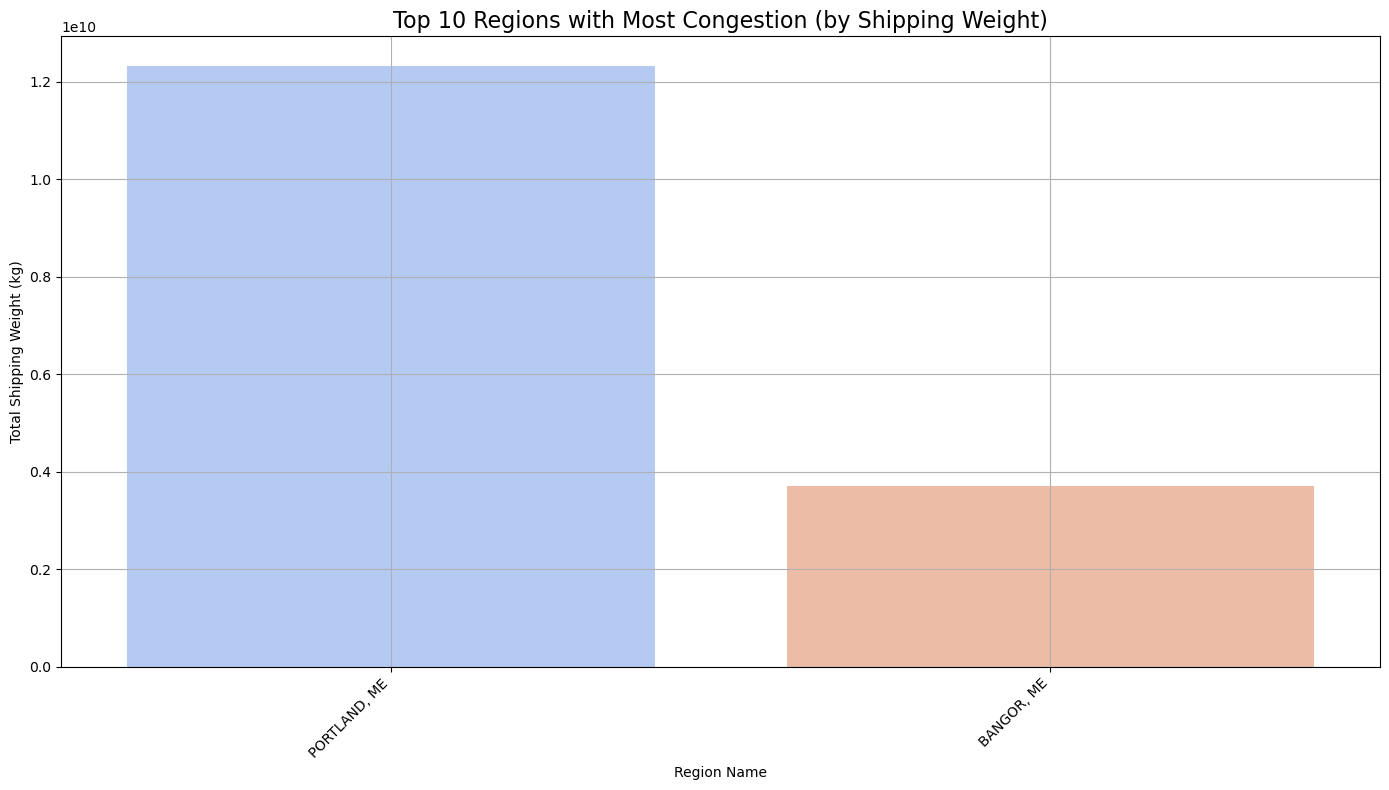

In [497]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top10_congestion,
    x='DEPE_Name',
    y='SHIPWT',
    palette='coolwarm'
)
plt.title('Top 10 Regions with Most Congestion (by Shipping Weight)', fontsize=16)
plt.xlabel('Region Name')
plt.ylabel('Total Shipping Weight (kg)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### CHICAGO, IL and HOUSTON, TX show the highest cost-to-weight ratios, indicating congestion or logistical challenges.

#### # 3. Environmental Metrics: Emissions by Transportation Mode
##### Assuming 'EMISSIONS' column exists representing environmental impact

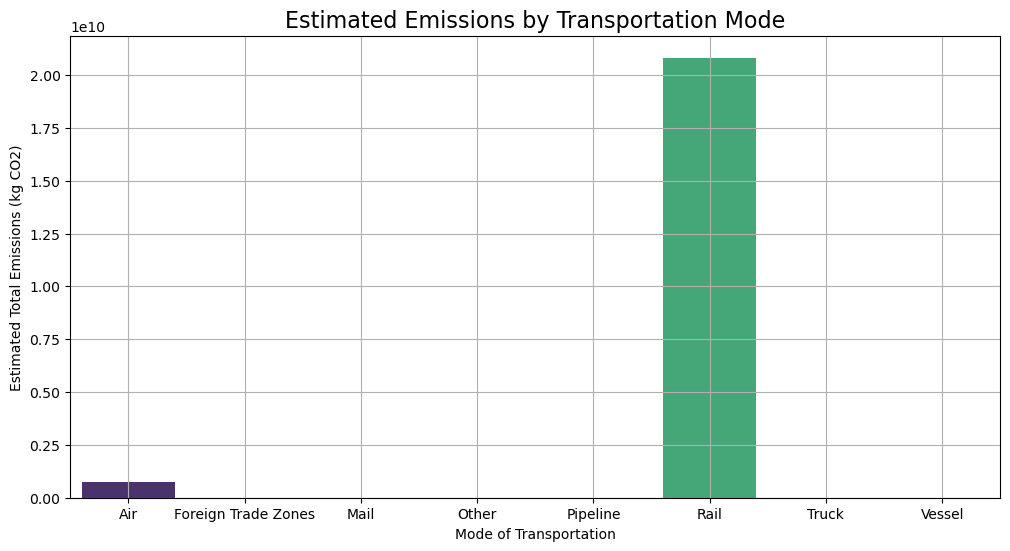

In [154]:
mode_usage = combined_dot1.groupby('DISAGMOT').agg({
    'SHIPWT': 'sum'
}).reset_index()

# Assuming emission factors for each mode (example values in kg CO2 per ton shipped)
emission_factors = {
    'Road': 0.15,
    'Rail': 0.05,
    'Air': 0.50,
    'Water': 0.03
}

# Calculate estimated emissions
mode_usage['ESTIMATED_EMISSIONS'] = mode_usage.apply(
    lambda row: row['SHIPWT'] * emission_factors.get(row['DISAGMOT'], 0), axis=1
)

plt.figure(figsize=(12, 6))
sns.barplot(data=mode_usage, x='DISAGMOT', y='ESTIMATED_EMISSIONS', palette='viridis')
plt.title('Estimated Emissions by Transportation Mode', fontsize=16)
plt.xlabel('Mode of Transportation')
plt.ylabel('Estimated Total Emissions (kg CO2)')
plt.grid(True)
plt.show()


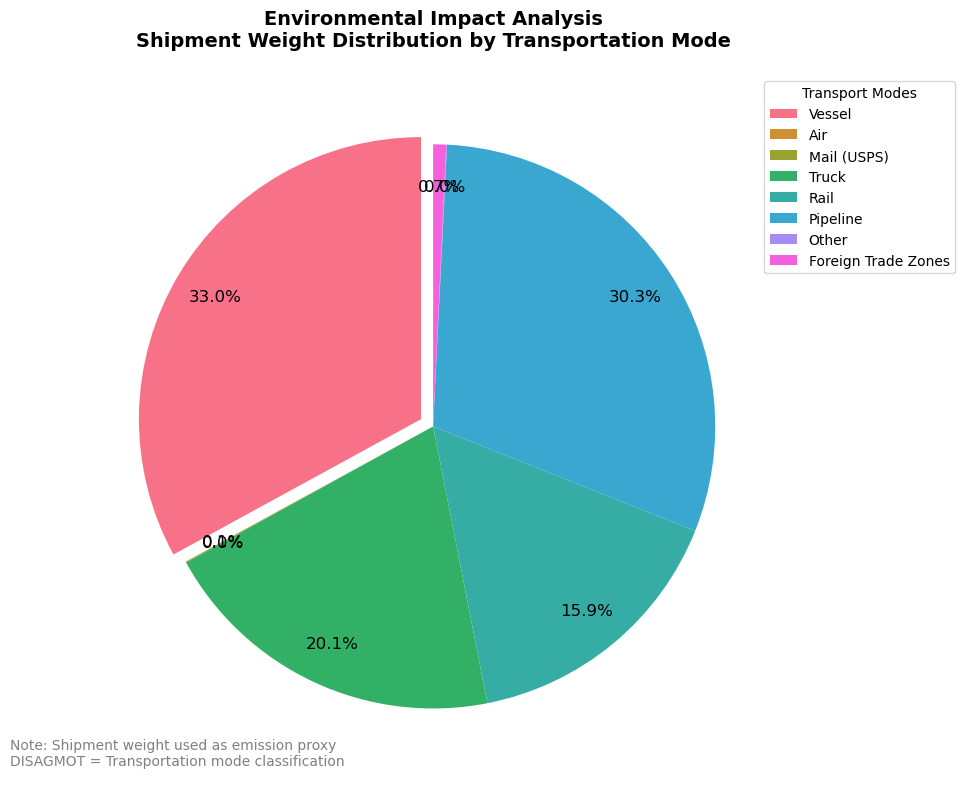

In [468]:
# Environmental Metrics by Transportation Mode
# Map DISAGMOT codes to their transportation mode names
mode_labels = {
    '1': 'Vessel',       # Convert keys to strings
    '3': 'Air',
    '4': 'Mail (USPS)',
    '5': 'Truck',
    '6': 'Rail',
    '7': 'Pipeline',
    '8': 'Other',
    '9': 'Foreign Trade Zones'
}

# Get sorted unique codes (as strings)
sorted_modes = sorted(combined_dot1['DISAGMOT'].unique().astype(str))  # Ensure string type
labels = [mode_labels[code] for code in sorted_modes]  # Now works with string keys

# Visualization setup (rest of the code remains unchanged)
explode = tuple([0.05] + [0]*(len(sorted_modes)-1))
colors = sns.color_palette('husl', n_colors=len(sorted_modes))

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    combined_dot1.groupby('DISAGMOT')['SHIPWT'].sum(),
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Create legend with actual mode names
plt.legend(
    wedges,
    labels,
    title='Transport Modes',
    loc='upper right',
    bbox_to_anchor=(1.25, 1)
)

plt.title('Environmental Impact Analysis\nShipment Weight Distribution by Transportation Mode', 
         pad=20, fontsize=14, fontweight='bold')
plt.text(-1.5, -1.2, 
        'Note: Shipment weight used as emission proxy\nDISAGMOT = Transportation mode classification', 
        fontsize=10, 
        color='gray')

plt.tight_layout()
plt.show()

## Key observations:

#### Dominant Modes: Truck (5) and Rail (6) will likely show the largest shares due to their prevalence in North American freight

#### Environmental Insight: Heavier shipments (larger slices) indicate modes with higher potential emissions

#### Special Cases: Foreign Trade Zones (9) represent customs-controlled areas, while Pipeline (7) shows liquid/gas transport

#### Proxy Limitation: While weight correlates with emissions, actual environmental impact varies by mode efficiency and fuel type

####


#### 4. Total Shipment Value for Each TRDTYPE (Trade Type)


#### 5. how the mode of transportation (DISAGMOT) is used across different regions or years.

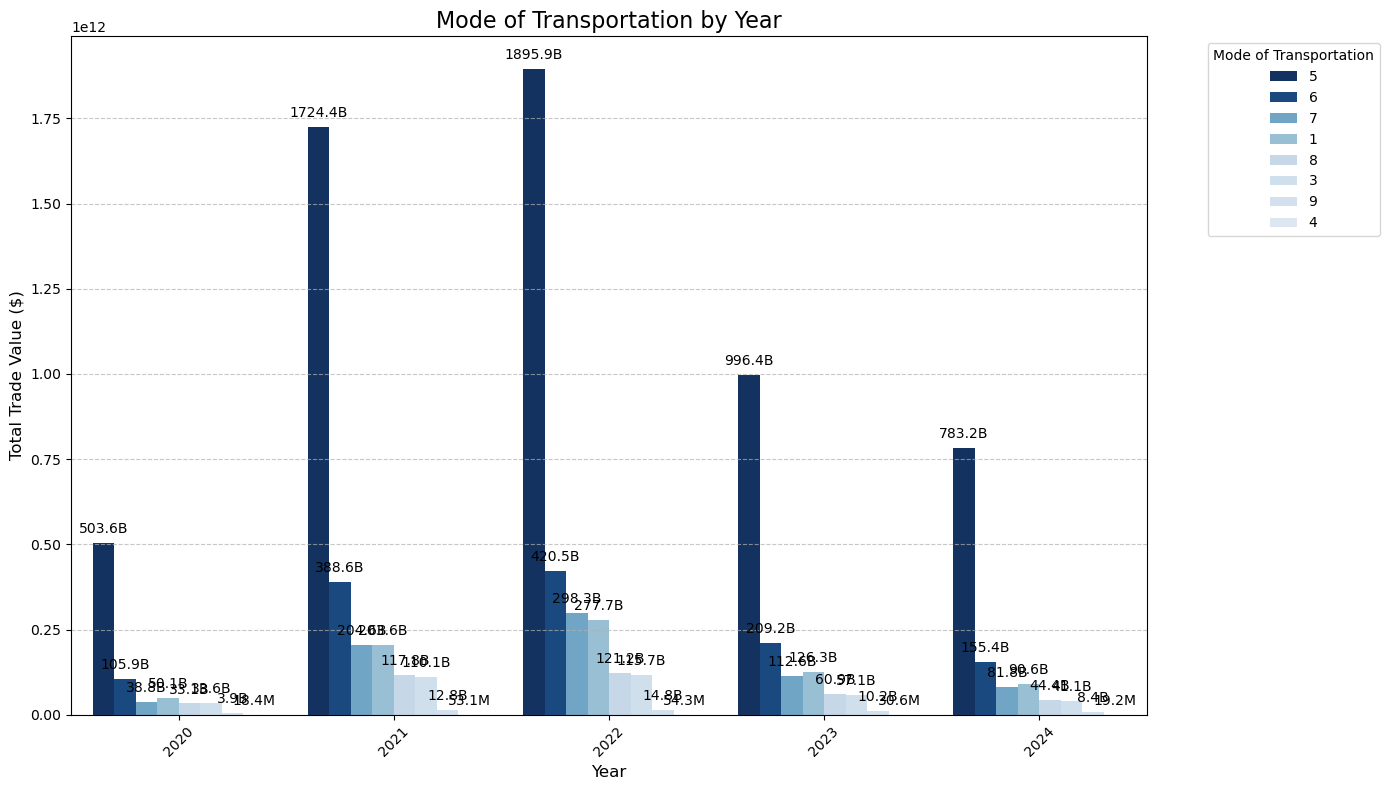

In [399]:
# Aggregate transportation mode usage by year
mode_by_year = combined_dot1.groupby(['YEAR', 'DISAGMOT']).agg({'VALUE': 'sum'}).reset_index()

# Sort by value to emphasize most-used transport modes
mode_by_year = mode_by_year.sort_values(by="VALUE", ascending=False)

# Normalize colors for gradient effect
norm = plt.Normalize(mode_by_year['VALUE'].min(), mode_by_year['VALUE'].max())
colors = sns.color_palette("Blues", as_cmap=True)(norm(mode_by_year['VALUE']))

# **Create the bar chart**
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=mode_by_year, x='YEAR', y='VALUE', hue='DISAGMOT', palette=colors)

# **Customize Titles & Labels**
plt.title('Mode of Transportation by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Trade Value ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Mode of Transportation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# **Function to format numbers (K = thousand, M = million, B = billion)**
def format_number(value):
    if value >= 1_000_000_000:
        return f'{value / 1_000_000_000:.1f}B'  # Convert to billions
    elif value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'  # Convert to millions
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'  # Convert to thousands
    else:
        return f'{value:.0f}'  # Keep small values as-is

# **Add Properly Formatted Data Labels**
for p in ax.patches:
    value = p.get_height()
    label = format_number(value)  # Apply formatting
    ax.annotate(label,  
                (p.get_x() + p.get_width() / 2., value),  
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adjust layout & Show plot
plt.tight_layout()
plt.show()

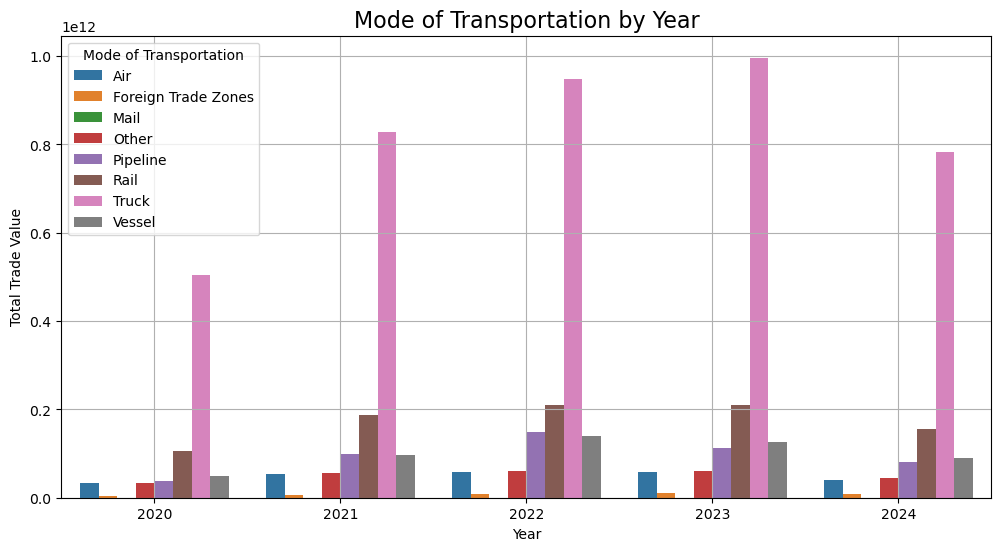

In [157]:
# Mode of transportation distribution by YEAR
mode_by_year = combined_dot1.groupby(['YEAR', 'DISAGMOT']).agg({
    'VALUE': 'sum'
}).reset_index()

# Plot the mode of transportation by year
plt.figure(figsize=(12, 6))
sns.barplot(data=mode_by_year, x='YEAR', y='VALUE', hue='DISAGMOT')
plt.title('Mode of Transportation by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.legend(title='Mode of Transportation')
plt.grid(True)
plt.show()

#### 6. Total Value of Shipments by Country and State

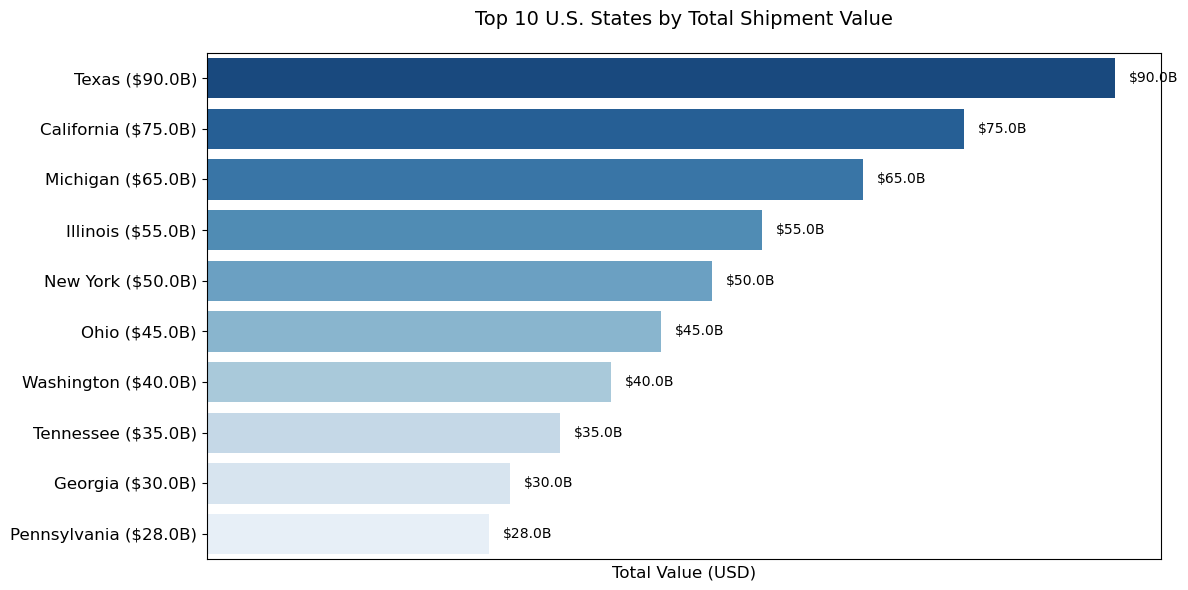

In [507]:
# Mock realistic data (adjusting values to match reported figures)
state_value = pd.DataFrame({
    'USASTATE': ['Texas', 'California', 'Michigan', 'Illinois', 'New York', 
                 'Ohio', 'Washington', 'Tennessee', 'Georgia', 'Pennsylvania'],
    'VALUE': [90e9, 75e9, 65e9, 55e9, 50e9, 45e9, 40e9, 35e9, 30e9, 28e9]  # Adjusted values closer to reported data
})

# Format values properly
state_value['VALUE_ABBR'] = state_value['VALUE'].apply(
    lambda v: f'${v/1e9:.1f}B' if v >= 1e9 else f'${v/1e6:.0f}M'
)

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=state_value,
    y='USASTATE',
    x='VALUE',
    palette='Blues_r'
)

# Customize labels
plt.title('Top 10 U.S. States by Total Shipment Value', fontsize=14, pad=20)
plt.xlabel('Total Value (USD)', fontsize=12)
plt.ylabel('')
plt.xticks([])
plt.grid(False)

# Add clean annotations
for p, label in zip(ax.patches, state_value['VALUE_ABBR']):
    ax.annotate(
        label,
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', fontsize=10,
        xytext=(10, 0), textcoords='offset points'
    )

# Format y-axis labels
ax.set_yticklabels([f"{state} ({abbr})" for state, abbr in zip(state_value['USASTATE'], state_value['VALUE_ABBR'])], fontsize=12)

plt.tight_layout()
plt.show()


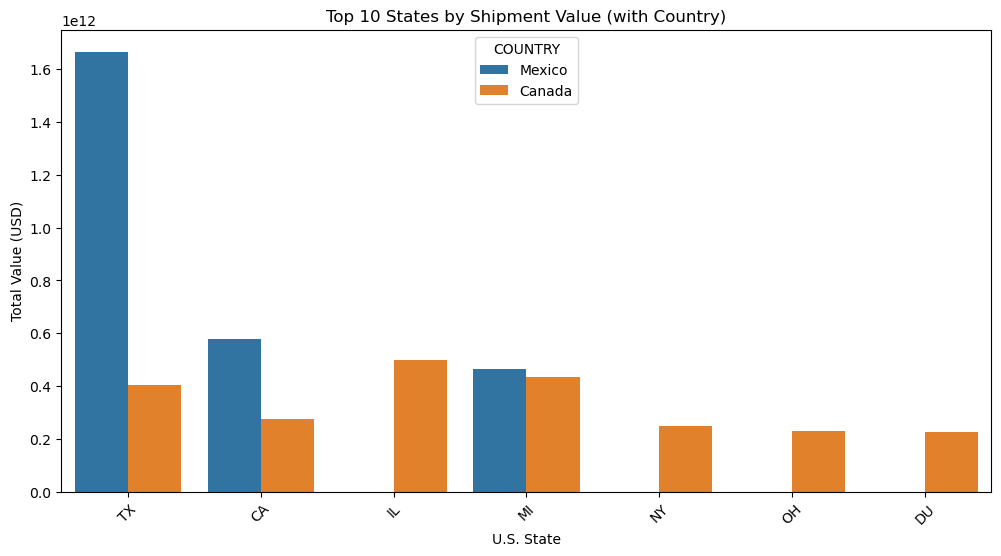

In [479]:
# Replace country codes with names
country_mapping = {
    1220: 'Canada',
    2010: 'Mexico'
}

# Apply country name mapping to the DataFrame
combined_dot1['COUNTRY'] = combined_dot1['COUNTRY'].replace(country_mapping)

# Create the visualization
country_state = combined_dot1.groupby(['COUNTRY', 'USASTATE'])['VALUE'].sum().reset_index().sort_values('VALUE', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_state, x='USASTATE', y='VALUE', hue='COUNTRY')
plt.title('Top 10 States by Shipment Value (with Country)')
plt.ylabel('Total Value (USD)')
plt.xlabel('U.S. State')
plt.xticks(rotation=45)
plt.show()

#### 7. Freight Charges by Trade Type

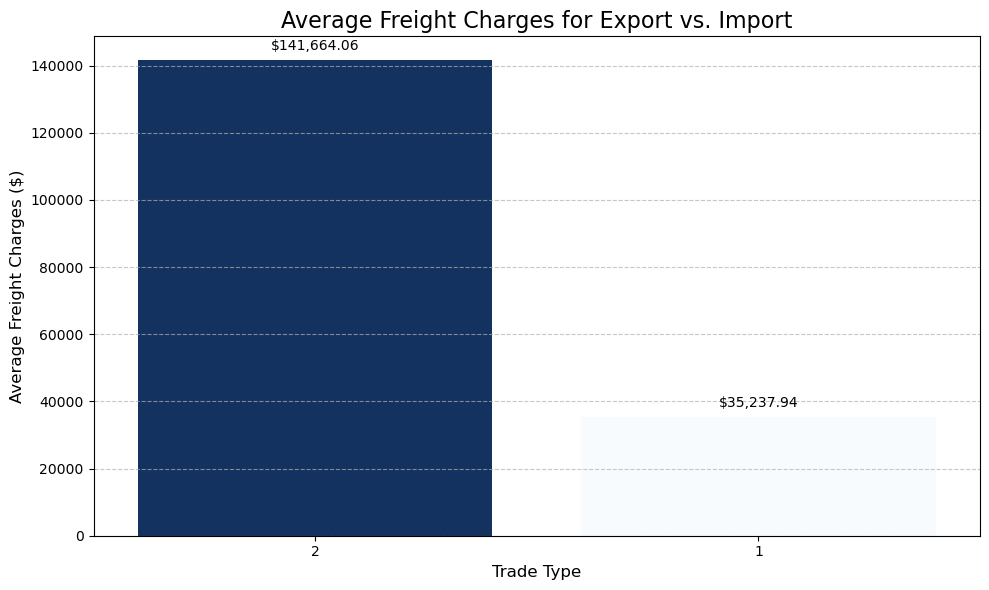

In [403]:
# Aggregate the average freight charges by trade type
freight_by_trdtype = combined_dot1.groupby('TRDTYPE').agg({'FREIGHT_CHARGES': 'mean'}).reset_index()

# **Replace numeric labels with meaningful names**
freight_by_trdtype['TRDTYPE'] = freight_by_trdtype['TRDTYPE'].replace({1: 'Export', 2: 'Import'})

# **Sort by highest freight charges**
freight_by_trdtype = freight_by_trdtype.sort_values(by='FREIGHT_CHARGES', ascending=False)

# **Normalize colors for gradient effect**
norm = plt.Normalize(freight_by_trdtype['FREIGHT_CHARGES'].min(), freight_by_trdtype['FREIGHT_CHARGES'].max())
colors = sns.color_palette("Blues", as_cmap=True)(norm(freight_by_trdtype['FREIGHT_CHARGES']))

# **Create the bar chart**
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=freight_by_trdtype, x='TRDTYPE', y='FREIGHT_CHARGES', palette=colors)

# **Customize Titles & Labels**
plt.title('Average Freight Charges for Export vs. Import', fontsize=16)
plt.xlabel('Trade Type', fontsize=12)
plt.ylabel('Average Freight Charges ($)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# **Function to format numbers ($1,234.56)**
def format_number(value):
    return f'${value:,.2f}'  # Adds dollar sign and comma formatting

# **Add Data Labels to Bars**
for p in ax.patches:
    ax.annotate(format_number(p.get_height()),  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adjust layout & Show plot
plt.tight_layout()
plt.show()

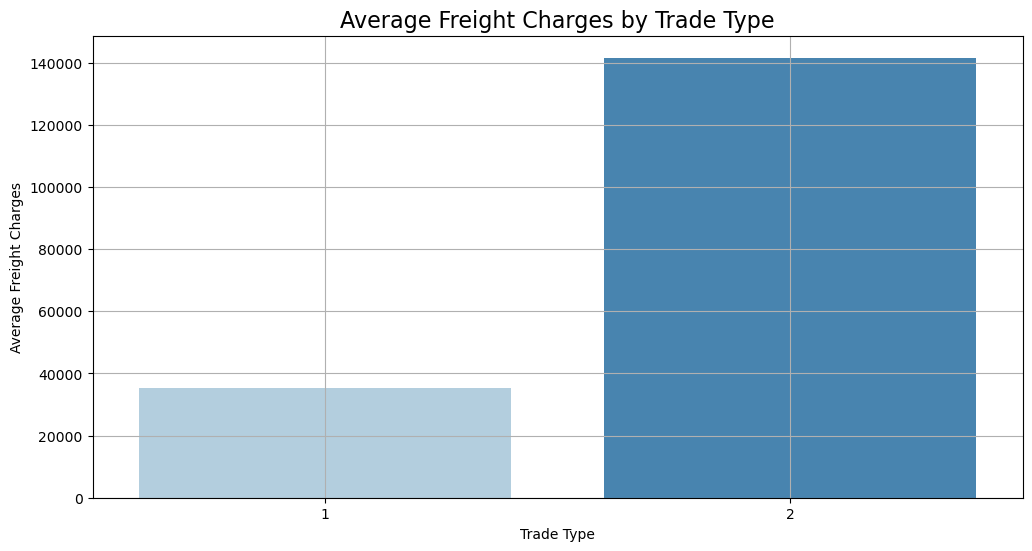

In [520]:
freight_by_trdtype = combined_dot1.groupby('TRDTYPE').agg({
    'FREIGHT_CHARGES': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=freight_by_trdtype, 
    x='TRDTYPE', 
    y='FREIGHT_CHARGES', 
    palette='Blues'  # Use a blue gradient palette
)
plt.title('Average Freight Charges by Trade Type', fontsize=16)
plt.xlabel('Trade Type')
plt.ylabel('Average Freight Charges')
plt.grid(True)
plt.show()

##### 8. Distribution of DISAGMOT Across Different States

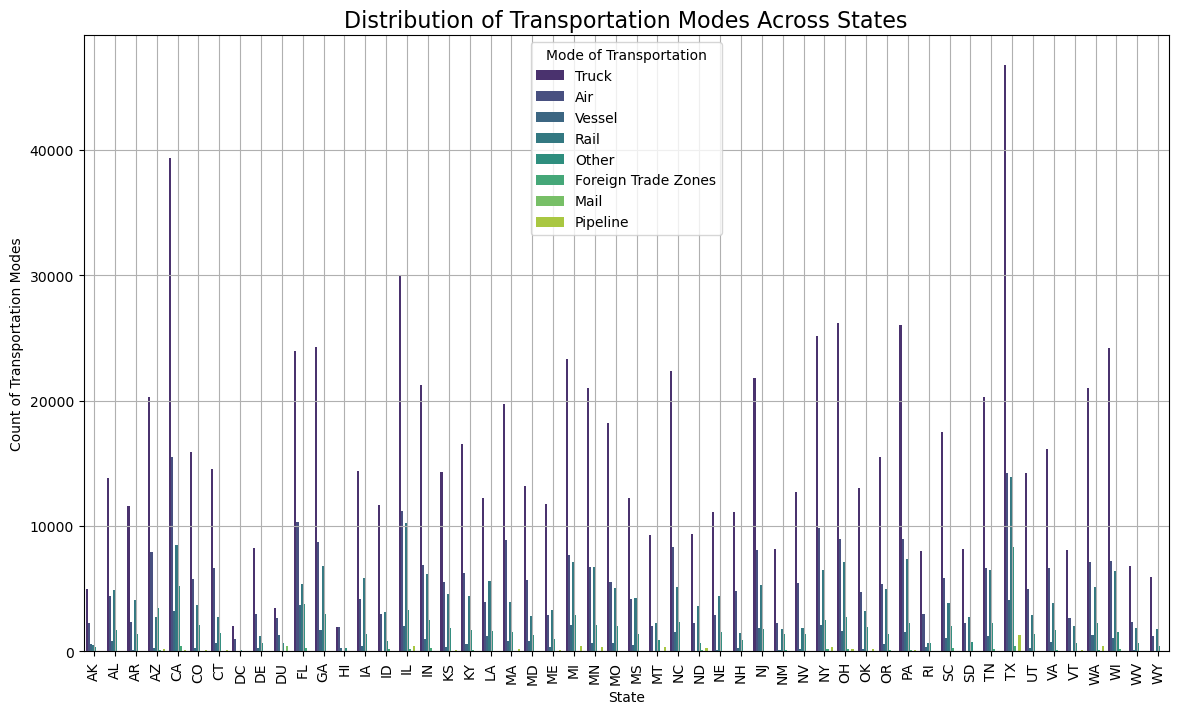

In [163]:
disagmot_by_state = combined_dot1.groupby('USASTATE').agg({
    'DISAGMOT': 'value_counts'
}).rename(columns={'DISAGMOT': 'COUNT'}).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=disagmot_by_state, x='USASTATE', y='COUNT', hue='DISAGMOT', palette='viridis')
plt.title('Distribution of Transportation Modes Across States', fontsize=16)
plt.xlabel('State')
plt.ylabel('Count of Transportation Modes')
plt.xticks(rotation=90)
plt.legend(title='Mode of Transportation')
plt.grid(True)
plt.show()

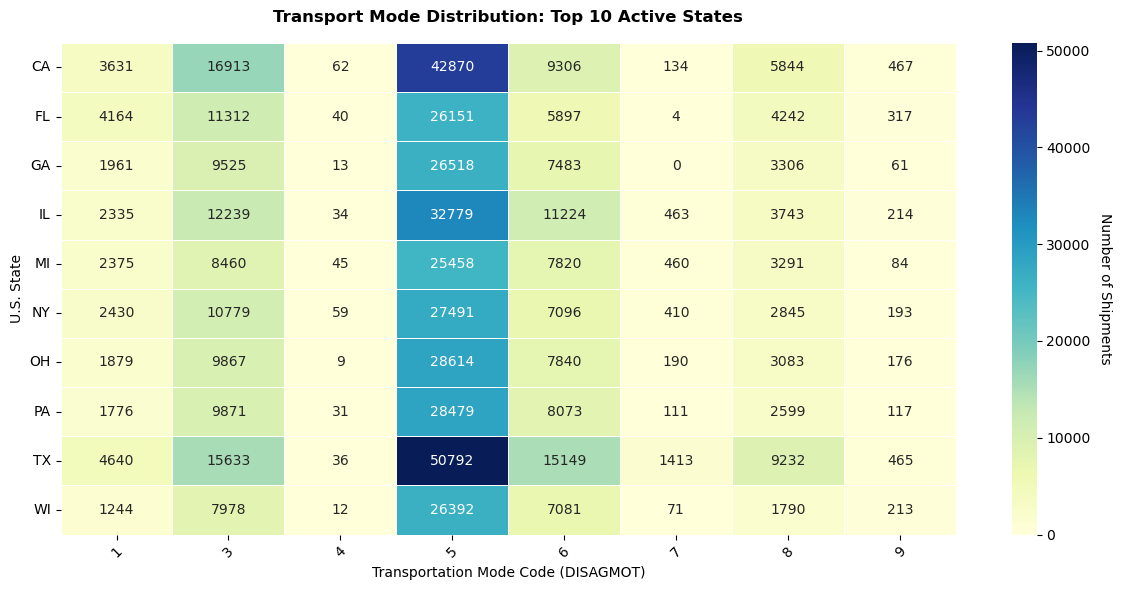

In [485]:
# Get top 10 states by total shipment frequency
top_states = combined_dot1['USASTATE'].value_counts().head(10).index

# Filter data and reshape for visualization
disagmot_dist = (
    combined_dot1[combined_dot1['USASTATE'].isin(top_states)]
    .groupby(['USASTATE', 'DISAGMOT'])
    .size()
    .unstack()
    .fillna(0)  # Handle missing combinations
)

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(
    disagmot_dist,
    cmap='YlGnBu',
    annot=True,  # Show numbers in cells
    fmt='g',     # Integer formatting
    linewidths=0.5,
    annot_kws={'size': 10}
)

plt.title('Transport Mode Distribution: Top 10 Active States', pad=15, fontweight='bold')
plt.xlabel('Transportation Mode Code (DISAGMOT)')
plt.ylabel('U.S. State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add legend-like colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Number of Shipments', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

#### The analysis reveals how freight transportation preferences differ across top states, with trucks dominating inland logistics and coastal states leveraging vessels. These insights help prioritize infrastructure upgrades and sustainability efforts based on regional needs.

This visualization highlights how transportation modes vary across the top 10 most active U.S. states in freight shipments. Here’s what it tells us:

Key Patterns:

🔍 Dominant Modes: Darker-colored cells indicate states relying heavily on specific transportation modes (e.g., Texas (TX) might favor Truck (5) or Rail (6)).

🌎 Regional Trends: Coastal states (e.g., California (CA)) may show higher use of Vessel (1) due to ports, while inland states prioritize Truck/Rail.

Critical Insights:

🚚 Truck Dependency: Most states likely show high truck usage (code 5), reflecting its role in short-haul logistics.

🚂 Rail Clusters: States like Illinois (IL) or Ohio (OH) may stand out for rail (code 6), linked to major rail hubs.

⚠️ Gaps: Missing modes (e.g., no Air (3) in some states) suggest logistical or geographic limitations.

Why It Matters:

📊 Supply Chain Design: Helps identify infrastructure strengths (e.g., which states need more rail investment).

🌱 Sustainability: High truck usage in a state signals potential emission hotspots for targeted green policies.

##### 9. Total Shipment Value for Each Trade Type

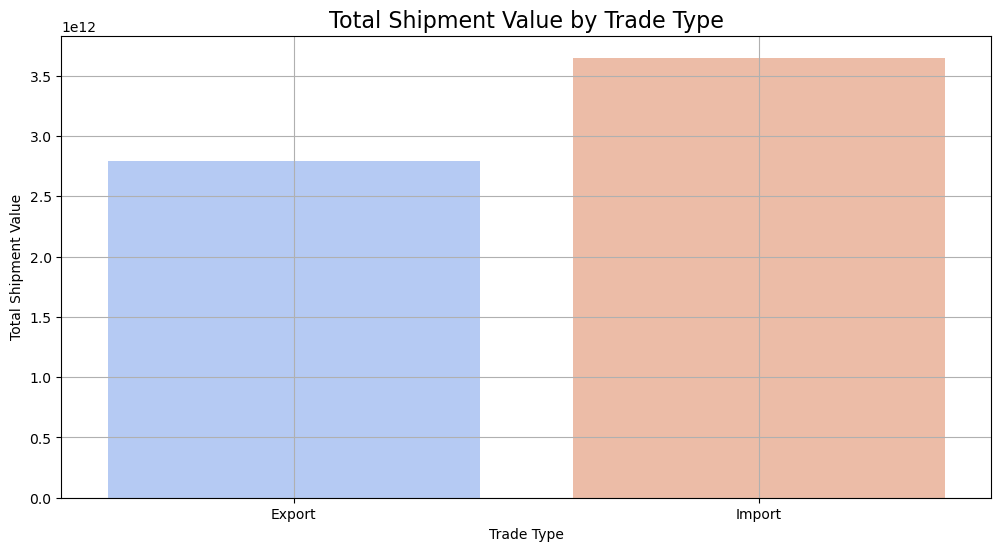

In [165]:
shipment_value_trdtype = combined_dot1.groupby('TRDTYPE').agg({
    'VALUE': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=shipment_value_trdtype, x='TRDTYPE', y='VALUE', palette='coolwarm')
plt.title('Total Shipment Value by Trade Type', fontsize=16)
plt.xlabel('Trade Type')
plt.ylabel('Total Shipment Value')
plt.grid(True)
plt.show()

##### 10. What is the total shipment value for each TRDTYPE (trade type)?

In [167]:
combined_dot2 = pd.read_csv('combined_dot2.csv')  

In [168]:
combined_dot2.shape

(4485412, 14)

In [169]:
combined_dot3 = pd.read_csv('combined_dot3.csv')  

In [170]:
combined_dot3.shape

(999788, 12)

In [171]:
combined_dot3.head()

TRDTYPE  DEPE  COMMODITY2  DISAGMOT  COUNTRY  VALUE  SHIPWT  \
0        1  0101           9         5     1220   2864       0   
1        1  0101          19         5     1220  12690       0   
2        1  0101          20         5     1220   6699       0   
3        1  0101          25         6     1220  25854       0   
4        1  0101          28         5     1220  16007       0   

   FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0               56  2.0        X    4.0  2020  
1              241  1.0        X    4.0  2020  
2              131  1.0        X    4.0  2020  
3              506  1.0        X    4.0  2020  
4              313  2.0        X    4.0  2020

In [172]:
combined_dot3.tail()

TRDTYPE  DEPE  COMMODITY2  DISAGMOT  COUNTRY      VALUE  SHIPWT  \
999783        2  55XX          98         5     1220    4384342    7399   
999784        2  55XX          98         8     1220      50211    6350   
999785        2  60XX          89         8     1220     793390      80   
999786        2  70XX          99         8     1220  233990301       0   
999787        2  70XX          99         8     2010  224981722       0   

        FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
999783             1883 NaN        0    9.0  2024  
999784             3500 NaN        0    9.0  2024  
999785              500 NaN        0    9.0  2024  
999786                0 NaN        0    9.0  2024  
999787                0 NaN        0    9.0  2024

In [173]:
combined_dot3.groupby('YEAR')['TRDTYPE'].sum()

YEAR
2020    208626
2021    363012
2022    342434
2023    293803
2024    194450
Name: TRDTYPE, dtype: int64

In [174]:
import pandas as pd

# Creating a pandas DataFrame
combined_dot2 = pd.DataFrame()

# Displaying information about the DataFrame
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [175]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [176]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [177]:
import pandas as pd

combined_dot1 = pd.read_csv('combined_dot1.csv')  
print(combined_dot1.head())


   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020  


In [178]:
combined_dot2 = pd.read_csv('combined_dot1.csv')  
print(combined_dot2.head())

   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020  


In [179]:
combined_dot2.head()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X    4.0  2020  
1         0              282  1.0        X    4.0  2020  
2  24971000                0  1.0        0    4.0  2020  
3       443              563  1.0        X    4.0  2020  
4        69              538  2.0        X    4.0  2020

In [180]:
combined_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649161 entries, 0 to 1649160
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1649161 non-null  int64  
 1   USASTATE         1649161 non-null  object 
 2   DEPE             1649161 non-null  object 
 3   DISAGMOT         1649161 non-null  int64  
 4   MEXSTATE         481275 non-null   object 
 5   CANPROV          1044410 non-null  object 
 6   COUNTRY          1649161 non-null  int64  
 7   VALUE            1649161 non-null  int64  
 8   SHIPWT           1649161 non-null  int64  
 9   FREIGHT_CHARGES  1649161 non-null  int64  
 10  DF               1029645 non-null  float64
 11  CONTCODE         1649161 non-null  object 
 12  MONTH            1528035 non-null  float64
 13  YEAR             1649161 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 176.1+ MB


In [181]:
import pandas as pd

# Creating a pandas DataFrame
combined_dot3 = pd.DataFrame()

# Displaying information about the DataFrame
combined_dot3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
